# Web Scraping

In this lab, we will focus on web scraping, which involves programmatically interacting with websites to parse and extract relevant data. This process can range from a simple extraction of specific elements, like headlines or prices, to more complex tasks, such as navigating through multiple pages or handling dynamically loaded content.

Web scraping can be applied in numerous scenarios, such as:

1.   Data gathering: Amassing large datasets from multiple sources to serve as input for Machine Learning or data analysis.
2.   Market research: Extracting product information, reviews, and pricing to identify trends or perform competitive analysis.
3.   Opinion Mining in Social Media: Collecting user-generated content, like social media posts or reviews, to analyze public opinion on a particular topic or product.
4.   News aggregation: Aggregating news articles or blog posts to create a customized news feed.

### HTML
HTML (Hypertext Markup Language) is the standard markup language for creating web pages. It uses a system of tags to define the structure and presentation of a webpage. The basic structure of an HTML document includes elements like `<html>, <head>, <body>, <h1> to <h6> (headings), <p> (paragraph), <a> (link), <div>, <li> and <span>.`

We will be using BeautifulSoup to parse basic HTML pages.

In [1]:
!pip install beautifulsoup4 --quiet
!pip install requests --quiet

In [1]:
# @title HTML Parsing
import requests
from bs4 import BeautifulSoup

url = 'http://quotes.toscrape.com/'
response = requests.get(url)
html_content = response.text

web_page = BeautifulSoup(html_content, 'html.parser')

# Raw html content of the page
print(web_page)

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<title>Quotes to Scrape</title>
<link href="/static/bootstrap.min.css" rel="stylesheet"/>
<link href="/static/main.css" rel="stylesheet"/>
</head>
<body>
<div class="container">
<div class="row header-box">
<div class="col-md-8">
<h1>
<a href="/" style="text-decoration: none">Quotes to Scrape</a>
</h1>
</div>
<div class="col-md-4">
<p>
<a href="/login">Login</a>
</p>
</div>
</div>
<div class="row">
<div class="col-md-8">
<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
<span>by <small class="author" itemprop="author">Albert Einstein</small>
<a href="/author/Albert-Einstein">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class="

We notice that the quotes all appear inside of div elements that have the "quote" class. For each div we notice that the text appears inside span elements with the "text" class.

For parsing the HTML of a web page it's recommended to use the browser viewing tools **(Ctrl + Shift + I)** and element inspect rather than printing out the structure in code each time.

In [2]:
# @title Extracting structured data
# Find all quote blocks on the page
quote_blocks = web_page.find_all('div', class_='quote')

# Iterate through quote blocks and extract data
for quote_block in quote_blocks:
    quote_text = quote_block.find('span', class_='text').text
    quote_author = quote_block.find('small', class_='author').text
    quote_tags = [tag.text for tag in quote_block.find_all('a', class_='tag')]

    # Print the extracted data
    print("Quote:", quote_text)
    print("Author:", quote_author)
    print("Tags:", quote_tags)
    print("\n")

Quote: “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
Author: Albert Einstein
Tags: ['change', 'deep-thoughts', 'thinking', 'world']


Quote: “It is our choices, Harry, that show what we truly are, far more than our abilities.”
Author: J.K. Rowling
Tags: ['abilities', 'choices']


Quote: “There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
Author: Albert Einstein
Tags: ['inspirational', 'life', 'live', 'miracle', 'miracles']


Quote: “The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
Author: Jane Austen
Tags: ['aliteracy', 'books', 'classic', 'humor']


Quote: “Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
Author: Marilyn Monroe
Tags: ['be-yourself', 'inspirational']


Quote: “Try not to become a man of success. Rather beco

### Useful BeautifulSoup methods

**find(tag, attrs=None, recursive=True, text=None, \*\*kwargs):**

> returns the first occurrence of the specified tag that matches the given attributes and other criteria.

**find_all(tag, attrs=None, recursive=True, text=None, limit=None, \*\*kwargs) or findAll():**

> returns a list of all occurrences of the specified tag that match the given attributes and other criteria.

**get_text(separator='', strip=False) or text:**

> Returns the text content of a tag or BeautifulSoup object, optionally concatenated with a separator and/or stripped of leading/trailing whitespace.







### Exercise 1

Parse the https://www.meteoprog.com/weather/Timisoara/month/march/ website which tracks weather in Timișoara for the month of March.

1. Extract all days with their max temperature, their min temperature and their weather description hidden behind the visual icons (e.g. 'Partly sunny'). You will only have weather description for upcoming days.
    
    **Hint:** Use select() to extract data from all blocks with a common string in their class strings.


2. Create a dataframe out of this data having the "day", "max_t", "min_t" and "gen_weather" columns.

    For *max_t* and *min_t* please store the temperature in Celsius (use the following formula: C = 5/9 x (F-32) in case Fahrenheit gets displayed on the page)


3. Calculate the average temperature for the whole month (in C).

4. Display the coldest day in the month based on min temperature.

5. Display the number of upcoming days without rain out of all remaining days in the month.

In [47]:
# Write your code below
"""Parse the https://www.meteoprog.com/weather/Timisoara/month/march/ website
which tracks weather in Timișoara for the month of March.

Extract all days with their max temperature, their min temperature and their
weather description hidden behind the visual icons (e.g. 'Partly sunny').
You will only have weather description for upcoming day"""

import requests
from bs4 import BeautifulSoup

url = 'https://www.meteoprog.com/weather/Timisoara/month/march/'
response = requests.get(url)
html_content = response.text

web_page = BeautifulSoup(html_content, 'html.parser')
weather_blocks = web_page.select('div.city-month__day')

dates = []
min_temp = []
max_temp = []
weather_desc = []

for block in weather_blocks:
    if 'March' in block.get_text():
        block_dates =  block.find('div', class_='city-month__day-date').text 
        temperature_block = block.find('span', class_ = 'city-month__day-temperature')
        max_temperature = temperature_block.b.text
        min_temperature = temperature_block.text.replace(max_temperature, '').strip()
        weather_description = block['title']

        if '20 March' in block_dates:
            
            print(f"Date : { block_dates}")
            print(f"Max temperature : { max_temperature}")
            print(f"Min temperature : { min_temperature}")
            print(f"Weather description : { weather_description}")
            print('\n')



Date : 20 March
Max temperature : +14°
Min temperature : +4°
Weather description : light cloud, no precipitation




In [4]:
""" Create a dataframe out of this data having the "day", "max_t", "min_t" and
"gen_weather" columns.

For max_t and min_t please store the temperature in Celsius (use the following
formula: C = 5/9 x (F-32) in case Fahrenheit gets displayed on the page)
 """
import pandas as pd
import string

dates = []
min_temp = []
max_temp = []
weather_desc = []

for block in weather_blocks:
    if 'March' in block.get_text():
        block_dates = block.find('div', class_='city-month__day-date').text 
        dates.append(block_dates)        
        temperature_block = block.find('span', class_ = 'city-month__day-temperature')
        max_temperature = temperature_block.b.text
        max_temp.append(max_temperature)
        min_temperature = temperature_block.text.replace(max_temperature, '').strip()
        min_temp.append(min_temperature)
        weather_description = block['title']
        weather_desc.append(weather_description)
        
max_temp = [temp.replace('°', '') for temp in max_temp]
min_temp = [temp.replace('°', '') for temp in min_temp]

weather = {
    'day' : dates,
    'max_t' : max_temp,
    'min_t' : min_temp,
    'gen_weather' : weather_desc
}

weather_df = pd.DataFrame(weather)
weather_df['max_t'] = weather_df['max_t'].str.replace('+', '')
weather_df['min_t'] = weather_df['min_t'].str.replace('+', '')
weather_df

day max_t min_t                               gen_weather
0    1 March     9     2                overcast, no precipitation
1    2 March    10     2             light cloud, no precipitation
2    3 March     9     2  cloudy, clear at times, no precipitation
3    4 March     9     1  cloudy, clear at times, no precipitation
4    5 March     9     1                   clear, no precipitation
5    6 March     9     2  cloudy, clear at times, no precipitation
6    7 March     9     2                overcast, no precipitation
7    8 March    10     2                overcast, no precipitation
8    9 March    11     2                overcast, no precipitation
9   10 March    11     2                overcast, no precipitation
10  11 March    11     3                overcast, no precipitation
11  12 March    11     3                   clear, no precipitation
12  13 March    12     4                   clear, no precipitation
13  14 March    12     3                   clear, no precipitation
14  15 March    11     2                overcast, no precipitation
15  16 March    12     3                overcast, no precipitation
16  17 March    14     3                overcast, no precipitation
17  18 March    14     4  cloudy, clear at times, no precipitation
18  19 March    12     4             light cloud, no precipitation
19  20 March    14     4             light cloud, no precipitation
20  21 March    15     4                   clear, no precipitation
21  22 March    15     4                   clear, no precipitation
22  23 March    14     5          variable cloud, no precipitation
23  24 March    15     4                   clear, no precipitation
24  25 March    15     4                   clear, no precipitation
25  26 March    15     6                   clear, no precipitation
26  27 March    13     5  cloudy, clear at times, no precipitation
27  28 March    14     5                   clear, no precipitation
28  29 March    16     6  cloudy, clear at times, no precipitation
29  30 March    17     6                overcast, no precipitation
30  31 March    18     7                      overcast, light rain

In [5]:
""" Calculate the average temperature for the whole month (in C). """
weather_df['max_t'] = pd.to_numeric(weather_df['max_t'])
weather_df['min_t'] = pd.to_numeric(weather_df['min_t'])

average_t = (weather_df['max_t'] + weather_df['min_t']) / 2
average_t_month = average_t.mean()
print("Average : ", average_t)
print("Average temperature monthly: ", average_t_month)

Average :  0      5.5
1      6.0
2      5.5
3      5.0
4      5.0
5      5.5
6      5.5
7      6.0
8      6.5
9      6.5
10     7.0
11     7.0
12     8.0
13     7.5
14     6.5
15     7.5
16     8.5
17     9.0
18     8.0
19     9.0
20     9.5
21     9.5
22     9.5
23     9.5
24     9.5
25    10.5
26     9.0
27     9.5
28    11.0
29    11.5
30    12.5
dtype: float64
Average temperature monthly:  7.951612903225806


In [6]:
""" Display the coldest day in the month based on min temperature."""
coldest_day = weather_df.loc[weather_df['min_t'].idxmin()]

coldest_day

day                                             4 March
max_t                                                 9
min_t                                                 1
gen_weather    cloudy, clear at times, no precipitation
Name: 3, dtype: object

In [7]:
""" Display the number of upcoming days without rain out of all remaining days
in the month. """
weather_df = weather_df[weather_df['day'] != coldest_day['day']]

sunny_days = weather_df[weather_df['gen_weather'].str.contains(' no precipitation',case = False)]
no_of_sunny_days = sunny_days.shape[0]
no_of_sunny_days 

29

### Multiple-page websites
When dealing with websites that have multiple pages of content, you'll often need to scrape data across these pages. To achieve this, you can loop through pages and extract information from each one.

Example: Scraping quotes from multiple pages on Quotes to Scrape (http://quotes.toscrape.com/):

In [8]:
# @title Scraping quotes

import requests
from bs4 import BeautifulSoup

base_url = 'http://quotes.toscrape.com/page/{}/'

page_num = 1

while True:
    url = base_url.format(page_num)
    response = requests.get(url)
    html_content = response.text

    # Check if the page is empty or doesn't exist
    if "No quotes found!" in html_content:
        break

    soup = BeautifulSoup(html_content, 'html.parser')
    quote_blocks = soup.find_all('div', class_='quote')

    for quote_block in quote_blocks:
        quote_text = quote_block.find('span', class_='text').text
        quote_author = quote_block.find('small', class_='author').text
        quote_tags = [tag.text for tag in quote_block.find_all('a', class_='tag')]

        print("Quote:", quote_text)
        print("Author:", quote_author)
        print("Tags:", quote_tags)
        print("\n")

    page_num += 1

Quote: “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
Author: Albert Einstein
Tags: ['change', 'deep-thoughts', 'thinking', 'world']


Quote: “It is our choices, Harry, that show what we truly are, far more than our abilities.”
Author: J.K. Rowling
Tags: ['abilities', 'choices']


Quote: “There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
Author: Albert Einstein
Tags: ['inspirational', 'life', 'live', 'miracle', 'miracles']


Quote: “The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
Author: Jane Austen
Tags: ['aliteracy', 'books', 'classic', 'humor']


Quote: “Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
Author: Marilyn Monroe
Tags: ['be-yourself', 'inspirational']


Quote: “Try not to become a man of success. Rather beco

### Handling JavaScript-rendered content

Some websites use JavaScript to load or display content. To scrape such websites, you can use the Playwright library, which allows you to automate browser actions and interact with JavaScript-rendered content.

In [9]:
# @title Import playwright { display-mode: "form" }
!pip install playwright --quiet
!playwright install chromium
!playwright install

|                                                                                |   0% of 134.8 MiB
|â– â– â– â– â– â– â– â–                                                                         |  10% of 134.8 MiB
|â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â–                                                                 |  20% of 134.8 MiB
|â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â–                                                         |  30% of 134.8 MiB
|â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â–                                                 |  40% of 134.8 MiB
|â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â–                                         |  50% of 134.8 MiB
|â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â– â–          

In [19]:
# @title Basic playwright functionality { display-mode: "form" }
import asyncio
import nest_asyncio
from playwright.async_api import async_playwright
nest_asyncio.apply()

# start browser, not to use 'with' context
from playwright.async_api import async_playwright
playwright = await async_playwright().start()
browser = await playwright.chromium.launch()

# go to a page, print its source
page = await browser.new_page()
await page.goto("https://playwright.dev/")
print(await page.content())

# end session
await browser.close()
await playwright.stop()

<!DOCTYPE html><html dir="ltr" class="ltr  yahoo-page height100"><head>
    <title>Yahoo face parte din familia de mărci Yahoo</title>

    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
    <meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, minimum-scale=1, user-scalable=no, viewport-fit=cover">
    <link rel="stylesheet" href="https://s.yimg.com/oa/build/css/site-ltr-553551be.css">
    <link rel="icon" type="image/png" href="https://s.yimg.com/oa/build/images/favicons/yahoo.png">
    <style nonce="">:root,html[data-color-scheme=dark] [data-maintain-color],html[data-color-theme-enabled] [data-color-scheme=light],html[data-color-theme-enabled][data-color-scheme=light]{--yb-default-font-family:"Helvetica Neue", Helvetica, Tahoma, Geneva, Arial, sans-serif;--yb-fuji2-font-family:"YahooSans VF", YahooSans, "Yahoo Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;--yb-uh3-cond-font-family:"Yahoo Sans Cond", YahooSansCond, "Yahoo Sans", 

In [48]:
# @title JS rendering and page interaction with playwright { display-mode: "both" }
async def search_wikipedia_first_suggestion_corrected():
    playwright = None
    browser = None
    try:
        playwright = await async_playwright().start()
        browser = await playwright.firefox.launch()
        page = await browser.new_page()

        # Navigate to Wikipedia's main page
        await page.goto('https://www.wikipedia.org/', timeout=60000)

        # Fill in the search input to trigger the suggestions dropdown
        await page.fill('input#searchInput', 'Python', timeout=60000)

        # Wait for the suggestions dropdown to appear
        await page.wait_for_selector('.suggestions-dropdown', state='visible', timeout=60000)

        # Use an async context manager to wait for navigation
        async with page.expect_navigation():
            # Click on the first suggestion in the dropdown
            await page.click('.suggestions-dropdown .suggestion-link:first-of-type')

        # Print the title of the navigated page
        print("Navigated Page Title:", await page.title())

    except Exception as e:
        print(f"An error occurred: {str(e)}")

    finally:
        if browser:
            await browser.close()
        if playwright:
            await playwright.stop()

# Execute the async function with error handling
asyncio.get_event_loop().run_until_complete(search_wikipedia_first_suggestion_corrected())

Navigated Page Title: Python - Wikipedia


In [79]:
# Write your code below
# Variant B
# @title Basic playwright functionality { display-mode: "form" }

import asyncio
import nest_asyncio
from playwright.async_api import async_playwright
nest_asyncio.apply()

from datetime import datetime
current_date_time = datetime.now()

tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']

values = []
market_change = []
market_change_values = []
date_time = []

        

async def search_yahoo_real_time_stock_info():
    playwright = None
    browser = None


    try:
        playwright = await async_playwright().start()
        browser = await playwright.firefox.launch()
        page = await browser.new_page()
            
        await page.goto('https://finance.yahoo.com/',timeout = 60000)

        await page.wait_for_selector('button.btn.secondary.reject-all', timeout=5000)
        await page.click('button.btn.secondary.reject-all')
        for ticker in tickers:   
            await page.fill( 'input#ybar-sbq',ticker, timeout = 60000) 
            await page.wait_for_selector('div[data-id="search-assist-input-sugglst"] ul.modules-module_list__hi5kT li',state = 'visible', timeout = 60000)       
            async with page.expect_navigation():
                await page.click('div[data-id="search-assist-input-sugglst"] ul.modules-module_list__hi5kT li:first-child')
            
            await page.wait_for_selector('fin-streamer[data-testid="qsp-price"]')
# 1          
        # Extract the text content of the current price
            current_price_element = await page.query_selector('fin-streamer[data-testid="qsp-price"]')
            current_price = await current_price_element.inner_text()
            values.append(current_price)
            
# Get the current absolute value of market change (e.g. +2.91$) of
#each ticker as well as the current percentage market change value (e.g. + 1.05%).           

            await page.wait_for_selector('fin-streamer[data-testid="qsp-price-change"]', timeout = 60000)
            current_price_change_element = await page.query_selector('fin-streamer[data-testid="qsp-price-change"]') 
            absolute_value_of_market_change = await current_price_change_element.inner_text()
            market_change.append(absolute_value_of_market_change)
            
            await page.wait_for_selector('fin-streamer[data-testid="qsp-price-change-percent"]', timeout = 60000)
            current_percentage_element = await page.query_selector('fin-streamer[data-testid="qsp-price-change-percent"]') 
            absolute_value_of_percentage_market_change = await current_percentage_element.inner_text()
            market_change_values.append(absolute_value_of_percentage_market_change)
          
            date_time.append(current_date_time) 
            
            print(f"Current price for {ticker} is : {current_price} ")      
            print(f"The absolute value of market change is : {absolute_value_of_market_change}$")
            print(f"Current percentage market change value is : {absolute_value_of_percentage_market_change}")
              

    
    except Exception as e:
        print(f"An error occured : {str(e)}")

    finally:
        if browser:
            await browser.close()
        if playwright:
            await playwright.stop()

asyncio.get_event_loop().run_until_complete(search_yahoo_real_time_stock_info())



Current price for AAPL is : 230.54 
The absolute value of market change is : +2.97$
Current percentage market change value is : (+1.31%)
Current price for GOOGL is : 185.01 
The absolute value of market change is : -0.56$
Current percentage market change value is : (-0.30%)
Current price for MSFT is : 453.70 
The absolute value of market change is : -1.00$
Current percentage market change value is : (-0.22%)
Current price for AMZN is : 194.49 
The absolute value of market change is : -0.56$
Current percentage market change value is : (-0.29%)
Current price for TSLA is : 248.23 
The absolute value of market change is : +7.20$
Current percentage market change value is : (+2.99%)


In [87]:
""" 3. Create a dataframe in which you store 5 entries for each company, each of the
entries containing the following information:

    Ticker, Value $, Market Change $ (can be negative), Market Change 
    %(can be negative), Date and time of reading. """

import pandas as pd


date_and_time = [] 


for dt in date_time:
    formatted_dates = dt.strftime("%Y-%m-%d %H:%M:%S.%f")
    date_and_time.append(formatted_dates)


companies = ['Apple ','Google', 'Microsoft', 'Amazon', 'Tesla']

stock = {
    
        'Companies':companies,
        'Ticker':tickers,
        'Value $': values,
        'Market Change $':market_change,
        'Market Change %':market_change_values,
        'Date and time of reading':date_and_time
    
}


stock_df = pd.DataFrame(stock)
stock_df


2024-07-15 15:03:18.418275
2024-07-15 15:03:18.418275
2024-07-15 15:03:18.418275
2024-07-15 15:03:18.418275
2024-07-15 15:03:18.418275
['2024-07-15 15:03:18.418275', '2024-07-15 15:03:18.418275', '2024-07-15 15:03:18.418275', '2024-07-15 15:03:18.418275', '2024-07-15 15:03:18.418275']
5
5
5
5
5
5


Companies Ticker Value $ Market Change $ Market Change %  \
0     Apple    AAPL  230.54           +2.97        (+1.31%)   
1     Google  GOOGL  185.01           -0.56        (-0.30%)   
2  Microsoft   MSFT  453.70           -1.00        (-0.22%)   
3     Amazon   AMZN  194.49           -0.56        (-0.29%)   
4      Tesla   TSLA  248.23           +7.20        (+2.99%)   

     Date and time of reading  
0  2024-07-15 15:03:18.418275  
1  2024-07-15 15:03:18.418275  
2  2024-07-15 15:03:18.418275  
3  2024-07-15 15:03:18.418275  
4  2024-07-15 15:03:18.418275

### Social Media - Reddit

There are multiple useful libraries in python that help parse social media feed of different platforms. One such library is called PRAW (Python Reddit API Wrapper). PRAW makes it easy to access Reddit data and interact with the Reddit API.



In [3]:
# @title Importing Praw { display-mode: "form" }
!pip install praw --quiet
import praw

# Replace the placeholder values with your own Reddit API credentials
client_id = 'your_client_id'
client_secret = 'your_client_secret'
user_agent = 'your_user_agent'

# Create a Reddit instance
reddit = praw.Reddit(client_id=client_id, client_secret=client_secret, user_agent=user_agent)

# For the sake of example, below you have a test user created for you
reddit = praw.Reddit(client_id='sIXZTihLNiKiHw',
                     client_secret='EjfAsmz5z8mDbZohe4UPYTPIZsYmOQ',
                     user_agent='Test1', check_for_async=False)

In [4]:
# @title First 10 hot posts { display-mode: "form" }
# Get the first 10 hot posts on the main page of reddit (/all)
hot_posts = reddit.subreddit('all').hot(limit=10)
for post in hot_posts:
    print(post.title, post.score)

Bro wants his bread 18435
Biden to remove tax benefit from landlords who raise their tenants’ rent more than 5 per cent per year — Move would apply to landlords who own more than 50 units, which represents roughly half of all rental properties nationwide 10347
2meirl4meirl 20438
Picture of a man from Ohio who criticized a 10 year old rape victim getting an abortion 5335
Someone Anonymously Mailed Two Bronze Age Axes to a Museum in Ireland | Officials are asking the donor to come forward with more information about where the artifacts were discovered 5602
After Over 2.5 Years, I’m Cancer Free! [OC] 14964
Russian women are different 17863
This is both hilarious and sad. 10756
This guy made my pizza. I noticed after he put my pizza in the oven. 9695
Donald Trump Does Not Get Post-Shooting Poll Boost  4302


In [5]:
# @title First 10 hot ML posts into dataframe { display-mode: "form" }
# Get the first 10 hot posts from the ML subreddit and converting their data into a dataframe
import pandas as pd

posts = []
ml_subreddit = reddit.subreddit('MachineLearning')
for post in ml_subreddit.hot(limit=10):
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])
posts

title  score       id  \
0                        [D] Simple Questions Thread      8  1e34cwr   
1  [R]  Protein language models expose viral mimi...     33  1e4k3oi   
2  [N] Yoshua Bengio's latest letter addressing a...     84  1e3viby   
3  [D] What happened to "creative" decoding strat...     15  1e42das   
4  [D] Ideas on how to improve time series foreca...     12  1e40guh   
5  [R] Any-Property-Conditional Molecule Generati...     10  1e416fw   
6  [D] Best "Retrieval Augmented Generation" Orch...     23  1e3p5fx   
7  [D] Best open source LLM for graph based quest...      9  1e3s9zq   
8  [D] Ideas on how to create a hierarchical LLM ...    121  1e3fpz4   
9                   [D] NER Model for Hindi language      3  1e3tdng   

         subreddit                                                url  \
0  MachineLearning  https://www.reddit.com/r/MachineLearning/comme...   
1  MachineLearning  https://www.reddit.com/r/MachineLearning/comme...   
2  MachineLearning  https://www.reddit.com/r/MachineLearning/comme...   
3  MachineLearning  https://www.reddit.com/r/MachineLearning/comme...   
4  MachineLearning  https://www.reddit.com/r/MachineLearning/comme...   
5  MachineLearning                   https://arxiv.org/abs/2407.09357   
6  MachineLearning  https://www.reddit.com/r/MachineLearning/comme...   
7  MachineLearning  https://www.reddit.com/r/MachineLearning/comme...   
8  MachineLearning  https://www.reddit.com/r/MachineLearning/comme...   
9  MachineLearning  https://www.reddit.com/r/MachineLearning/comme...   

   num_comments                                               body  \
0             4  Please post your questions here instead of cre...   
1             9  We got accepted at ICML 24/ML4LMS workshop, so...   
2           115  [https://yoshuabengio.org/2024/07/09/reasoning...   
3             9  For GPT-2 and most models at that time, the na...   
4            18  Hi all,\nMy company decided to add an analytic...   
5             1                                                      
6            24  So I'm currently developing a project that inc...   
7             8  So there are 2 parts to this questions:  \n  \...   
8            10  Is it possible to create an AI agent workflow ...   
9             7  I am build a project on NER. I was able to fin...   

        created  
0  1.720969e+09  
1  1.721121e+09  
2  1.721052e+09  
3  1.721069e+09  
4  1.721064e+09  
5  1.721066e+09  
6  1.721030e+09  
7  1.721042e+09  
8  1.720999e+09  
9  1.721046e+09

In [6]:
# @title Getting post by url, display comments { display-mode: "form" }
# Getting a particular post by url or by id
submission = reddit.submission(url="https://www.reddit.com/r/MapPorn/comments/a3p0uq/an_image_of_gps_tracking_of_multiple_wolves_in/")
# or
submission = reddit.submission(id="a3p0uq") #id comes after comments/

# Accessing the comments of a post
for top_level_comment in submission.comments:
    try:
        print(top_level_comment.body, top_level_comment.score)
        print('----------')
    except AttributeError:
        print(top_level_comment)
        print('----------')

I thought this was a shit post made in paint before I read the title 3803
----------
Wow, that’s very cool.  To think how keen their senses must be to recognize and avoid each other and their territories.  Plus, I like to think that there’s one from the white colored clan who just goes way into the other territories because, well, he’s a badass. 7593
----------
That’s really cool. The edges are surprisingly defined. 785
----------
White wolf is a dick constantly trespassing other's territories. 3020
----------
[Link to Story](https://www.duluthnewstribune.com/news/science-and-nature/4538836-voyageurs-national-park-wolves-eating-beaver-and-blueberries-not)  343
----------
Cool to imagine that there are similar zones surrounding all these, we just didn't tag those wolves.  90
----------
You know the white wolf fucked some red's bitch for sure.  882
----------
This what i am gonna show people when they ask for a photo of a sixpack 67
----------
It’s wild how they are all roughly the same 

In [ ]:
# @title Display all post comments { display-mode: "form" }
# Access all comments from the post (including replies to comments)
submission.comments.replace_more(limit=None)
for comment in submission.comments.list():
    print(comment.body)
    print('----------')

I thought this was a shit post made in paint before I read the title
----------
Wow, that’s very cool.  To think how keen their senses must be to recognize and avoid each other and their territories.  Plus, I like to think that there’s one from the white colored clan who just goes way into the other territories because, well, he’s a badass.
----------
That’s really cool. The edges are surprisingly defined.
----------
White wolf is a dick constantly trespassing other's territories.
----------
[Link to Story](https://www.duluthnewstribune.com/news/science-and-nature/4538836-voyageurs-national-park-wolves-eating-beaver-and-blueberries-not) 
----------
Cool to imagine that there are similar zones surrounding all these, we just didn't tag those wolves. 
----------
You know the white wolf fucked some red's bitch for sure. 
----------
This what i am gonna show people when they ask for a photo of a sixpack
----------
It’s wild how they are all roughly the same size. 
----------
[deleted]
-----

### Exercise 3

Pick a subreddit of your choice and:

1. Create a dataframe containing title, score, id, subreddit, url, num_comments, body, time_created for the top 100 posts of all time of that subreddit.

2. Calculate the average score and the average number of comments for:

 *   The top 10 posts (based on score).
 *   The bottom 10 posts (bottom 10 of the top 100, based on score).
    
    Compare these averages to discuss the correlation between post scores and user engagement as measured by comments. Are higher-scored posts necessarily more engaging in terms of comment activity?

3. Plot the top 10 most common words found in the titles of the top 100 posts. Exclude stop words from this visualization. Hint: Split your titles into words.


In [2]:
# Write your code below
"""Create a dataframe containing title, score, id, subreddit,
url, num_comments, body, time_created for the top 100 posts 
of all time of that subreddit."""

import praw

client_id='sIXZTihLNiKiHw'
client_secret='EjfAsmz5z8mDbZohe4UPYTPIZsYmOQ'
user_agent='Test1'

reddit = praw.Reddit(client_id = client_id, client_secret = client_secret, user_agent = user_agent)

import pandas as pd

posts = []
ai_subreddit = reddit.subreddit('ArtificialInteligence')

for post in ai_subreddit.top(limit=100):
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])

posts = pd.DataFrame(posts, columns = ['Title', 'Score', 'Id', 'Subreddit', 'URL', 'Num_comments', 'Body', 'Created'])
posts 


Title  Score       Id  \
0   Getting Emotional with LLMs Can increase Perfo...   1370  16ueagc   
1   ChatGPT Brings Down Online Education Stocks. C...   1012  1cwq6qm   
2   AI is about to completely change how you use c...    938  17rrd6h   
3   Ai generated memes are either kinda funny or m...    752   mj2q2x   
4   5 Best ChatGPT Prompts that will turn your Cha...    690  175s6nt   
..                                                ...    ...      ...   
95  AI outperforms humans in providing emotional s...    202  1c3wb3x   
96  Amazon spends $2.75 billion on AI startup Anth...    202  1bp74ea   
97   Tech Layoffs Surge to over 24,000 so far in 2024    201  1abaq4e   
98           When did this sub turn annoying as hell?    202  13fd6ax   
99  Google researchers achieve performance breakth...    202  12yzbdv   

                Subreddit                                                URL  \
0   ArtificialInteligence  https://www.reddit.com/r/ArtificialInteligence...   
1   ArtificialInteligence  https://www.reddit.com/r/ArtificialInteligence...   
2   ArtificialInteligence  https://www.reddit.com/r/ArtificialInteligence...   
3   ArtificialInteligence              https://www.reddit.com/gallery/mj2q2x   
4   ArtificialInteligence  https://www.reddit.com/r/ArtificialInteligence...   
..                    ...                                                ...   
95  ArtificialInteligence  https://www.reddit.com/r/ArtificialInteligence...   
96  ArtificialInteligence  https://www.reddit.com/r/ArtificialInteligence...   
97  ArtificialInteligence  https://www.reddit.com/r/ArtificialInteligence...   
98  ArtificialInteligence  https://www.reddit.com/r/ArtificialInteligence...   
99  ArtificialInteligence  https://www.reddit.com/r/ArtificialInteligence...   

    Num_comments                                               Body  \
0             27  This research was a real eye-opener. Conducted...   
1            230  It’s over for Chegg. The company, listed on th...   
2            288  I still love software as much today as I did w...   
3             42                                                      
4             30  Without wasting your time, let's dive straight...   
..           ...                                                ...   
95            90  A new study suggests that [AI could be useful ...   
96            39  https://www.cnbc.com/amp/2024/03/27/amazon-spe...   
97           120  The tech industry has seen nearly 24,000 layof...   
98           101  Now it’s all “AI is going to take us over”, “a...   
99            33  [My full breakdown of the research paper is he...   

         Created  
0   1.695903e+09  
1   1.716239e+09  
2   1.699576e+09  
3   1.617430e+09  
4   1.697067e+09  
..           ...  
95  1.713109e+09  
96  1.711559e+09  
97  1.706246e+09  
98  1.683874e+09  
99  1.682464e+09  

[100 rows x 8 columns]

In [3]:
"""Calculate the average score and the average number of comments 
for:

The top 10 posts (based on score).
The bottom 10 posts (bottom 10 of the top 100, based on score)."""

top_10_posts_score = posts.nlargest(10,'Score')

top_10_posts_average = top_10_posts_score['Score'].mean()
print("Average of top 10 posts :",top_10_posts_average)
top_10_comments =top_10_posts_score['Num_comments'].mean()
print("Average number of comments:",top_10_comments)

print('----------------------------------')

bottom_10_posts_score = posts.nlargest(100,'Score').nsmallest(10,'Score')

bottom_10_posts_average = bottom_10_posts_score['Score'].mean()
print("Average of bottom 10 posts :",bottom_10_posts_average)
bottom_10_comments = bottom_10_posts_score['Num_comments'].mean()
print("Average number of comments:",bottom_10_comments)

"""Compare these averages to discuss the correlation between post
scores and user engagement as measured by comments. 
Are higher-scored posts necessarily more engaging in terms 
of comment activity?"""

# Comparing Averages
print("Comparison of Averages:")
print(f"Top 10 Posts - Average Score: {top_10_posts_average}, Average Comments: {top_10_comments}")
print(f"Bottom 10 Posts (of Top 100) - Average Score: {bottom_10_posts_score}, Average Comments: {bottom_10_comments}")

# Discussion
if top_10_comments > bottom_10_comments:
    print("Higher-scored posts are more engaging in terms of comment activity.")
elif top_10_comments < bottom_10_comments:
    print("Lower-scored posts (within the top 100) are more engaging in terms of comment activity.")
else:
    print("There is no significant difference in engagement in terms of comment activity between higher-scored and lower-scored posts (within the top 100).")


Average of top 10 posts : 772.1
Average number of comments: 172.7
----------------------------------
Average of bottom 10 posts : 204.4
Average number of comments: 88.6
Comparison of Averages:
Top 10 Posts - Average Score: 772.1, Average Comments: 172.7
Bottom 10 Posts (of Top 100) - Average Score:                                                 Title  Score       Id  \
97   Tech Layoffs Surge to over 24,000 so far in 2024    201  1abaq4e   
95  AI outperforms humans in providing emotional s...    202  1c3wb3x   
96  Amazon spends $2.75 billion on AI startup Anth...    202  1bp74ea   
98           When did this sub turn annoying as hell?    202  13fd6ax   
99  Google researchers achieve performance breakth...    202  12yzbdv   
94                   Dealing with AI job loss anxiety    204  18kr1qu   
92  Google DeepMind’s new AI can model DNA, RNA, a...    207  1cngt24   
93    ChatGPT can now 'see,' and it's a game-changer.    207  16xso8m   
90  How I Replaced Myself with AI and Why Y

In [9]:
"""Plot the top 10 most common words found in the titles of 
the top 100 posts
Exclude stop words from this visualization.
Hint: Split your titles into words."""
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt', quiet=True)
stop_words = stopwords.words('english')

posts['Tokens'] = posts['Title'].apply(word_tokenize)
print(posts['Tokens'])
posts = posts[~posts['Tokens'].isin(stop_words)]
posts['Tokens'].head()

all_words = [word.lower() for tokens in posts['Tokens'] for word in tokens]
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(10)
words = [] 
for i,k in most_common_words:
   print(f"Words :{i}, occurences :{k}") 


0     [Getting, Emotional, with, LLMs, Can, increase...
1     [ChatGPT, Brings, Down, Online, Education, Sto...
2     [AI, is, about, to, completely, change, how, y...
3     [Ai, generated, memes, are, either, kinda, fun...
4     [5, Best, ChatGPT, Prompts, that, will, turn, ...
                            ...                        
95    [AI, outperforms, humans, in, providing, emoti...
96    [Amazon, spends, $, 2.75, billion, on, AI, sta...
97    [Tech, Layoffs, Surge, to, over, 24,000, so, f...
98    [When, did, this, sub, turn, annoying, as, hel...
99    [Google, researchers, achieve, performance, br...
Name: Tokens, Length: 100, dtype: object
Words :ai, occurences :61
Words :., occurences :46
Words :to, occurences :34
Words :the, occurences :27
Words :of, occurences :26
Words :is, occurences :24
Words :and, occurences :24
Words :in, occurences :23
Words :,, occurences :22
Words :’, occurences :20


# Topic Modelling
Topic modeling is an unsupervised machine learning technique that aims to identify the underlying topics or themes in a collection of documents. It helps to automatically organize, understand, and summarize large collections of textual data. Topic modeling has numerous applications, such as:

### LDA
Latent Dirichlet Allocation (LDA) is a popular generative probabilistic model used for topic modeling. LDA assumes that each document is a mixture of topics, and each topic is a distribution over words. The primary goal of LDA is to learn the topic distributions for each document and the word distributions for each topic.

### Stemming & Lemmatization

LDA performs best when working with clean data. Here we introduce two simple steps we can perform in text data cleaning / preprocessing. These two steps we introduce are not always necessary, but they help some algorithms perform better.

Stemming and lemmatization are natural language processing techniques used to reduce words to their base or root form. These techniques are commonly used in text preprocessing to reduce the dimensionality of the data, decrease noise, and improve the performance of text analysis algorithms. The main difference between the two is the approach they take to achieve this:

* **Stemming**:

    Stemming algorithms work by cutting off the end or beginning of a
    word, considering only a few common prefixes and suffixes. This can lead to crude results where the stemmed word might not always be a valid word in the language.

* **Lemmatization**:

    Lemmatization algorithms take a more structured approach, considering the morphological analysis of the words. They aim to return the base or dictionary form of a word, known as the lemma. Lemmatization generally provides better results as it takes into account the context and part of speech of the word.



In [1]:
# @title Stemming vs Lemmatization { display-mode: "form" }
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

word = "running"

stemmed_word = stemmer.stem(word)
lemmatized_word = lemmatizer.lemmatize(word, pos="v")

print(f"Original word: {word}")
print(f"Stemmed word: {stemmed_word}")
print(f"Lemmatized word: {lemmatized_word}")

word_2 = "average"

stemmed_word = stemmer.stem(word_2)
lemmatized_word = lemmatizer.lemmatize(word_2, pos="v")

print()
print(f"Original word: {word_2}")
print(f"Stemmed word: {stemmed_word}")
print(f"Lemmatized word: {lemmatized_word}")

Original word: running
Stemmed word: run
Lemmatized word: run

Original word: average
Stemmed word: averag
Lemmatized word: average


In [2]:
# @title Fetching topics from Wikipedia { display-mode: "form" }
!pip install wikipedia --quiet
!pip install scikit-learn --quiet
import wikipedia
import nltk

nltk.download('stopwords', quiet=True)
en_stop = set(nltk.corpus.stopwords.words('english'))

# Religion and philosophy
religion = wikipedia.page("Religion")
philosophy = wikipedia.page("Philosophy")

# Science and technology
artificial_intelligence = wikipedia.page("Artificial Intelligence")
quantum_computing = wikipedia.page("Quantum Computing")

# Arts and architecture
mona_lisa = wikipedia.page("Mona Lisa")
eiffel_tower = wikipedia.page("Eiffel Tower")

# History and politics
world_war_2 = wikipedia.page("World War 2")
american_civil_war = wikipedia.page("American Civil War")

In [3]:
# @title Processing text { display-mode: "form" }
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

# Add all our documents to a list
documents = [religion.content, philosophy.content, artificial_intelligence.content, quantum_computing.content, mona_lisa.content, eiffel_tower.content, world_war_2.content, american_civil_war.content]

# Preprocessing function
def preprocess(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    # Tokenize words
    words = word_tokenize(text)

    # Remove stopwords and lemmatize words
    words = [lemmatizer.lemmatize(word.lower()) for word in words if word.isalnum() and word.lower() not in stop_words]

    return ' '.join(words)

# Preprocess the documents
preprocessed_documents = [preprocess(doc) for doc in documents]
preprocessed_documents[0]

'religion range system including designated behavior practice moral belief worldviews text sanctified place prophecy ethic organization generally relate humanity supernatural transcendental spiritual scholarly consensus precisely constitutes religion different religion may may contain various element ranging divine sacredness faith supernatural being origin religious belief open question possible explanation including awareness individual death sense community dream religion sacred history narrative mythology preserved oral tradition sacred text symbol holy place may attempt explain origin life universe phenomenon religious practice may include ritual sermon commemoration veneration deity saint sacrifice festival feast trance initiation matrimonial funerary service meditation prayer music art dance public service estimated distinct religion worldwide though nearly regionally based relatively small following four islam hinduism 77 world population 92 world either follows one four religi

In [4]:
# @title Create term-document matrix, prerequisite for LDA { display-mode: "form" }
# Create term-document matrix which LDA needs to use as input
vectorizer = CountVectorizer(max_df=0.75, min_df=2, stop_words='english', ngram_range=(1,3))
term_document_matrix = vectorizer.fit_transform(preprocessed_documents)
print(term_document_matrix[0].indices[0], term_document_matrix[0].data[0]) # Print term-document first element for the first wiki page

# Get the feature name (term) for the specific index
feature_name = vectorizer.get_feature_names_out()[term_document_matrix[0].indices[0]]

print(f"Index 2705 corresponds to the term: '{feature_name}'")
print(f"Count of the term '{feature_name}' in the first document: {term_document_matrix[0].data[0]}")

2757 285
Index 2705 corresponds to the term: 'religion'
Count of the term 'religion' in the first document: 285


In [6]:
# @title Apply LDA { display-mode: "form" }
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # Ignore some deprecation warnings from upcoming cells

# Apply LDA
n_topics = 4
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(term_document_matrix)

# Print top words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = f"Topic #{topic_idx + 1}: "
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)

n_top_words = 10
feature_names = vectorizer.get_feature_names_out()
print_top_words(lda, feature_names, n_top_words)

Topic #1: religion war german religious germany british army french russian world war
Topic #2: ai painting intelligence machine learning artificial human data research artificial intelligence
Topic #3: philosophy computer algorithm classical computing philosophical knowledge theory gate computation
Topic #4: war union army south battle slavery north civil slave force


In [7]:
# @title Visualize topics { display-mode: "form" }
!pip install pyldavis --quiet
!pip install pandas==1.5.3 --quiet

import pyLDAvis
import pyLDAvis.lda_model

# Prepare the LDA visualization data
visualization_data = pyLDAvis.lda_model.prepare(lda, term_document_matrix, vectorizer)

# Display the LDA visualization
pyLDAvis.display(visualization_data)

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [2524 lines of output]
  <string>:19: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-312
  creating build\lib.win-amd64-cpython-312\pandas
  copying pandas\conftest.py -> build\lib.win-amd64-cpython-312\pandas
  copying pandas\testing.py -> build\lib.win-amd64-cpython-312\pandas
  copying pandas\_typing.py -> build\lib.win-amd64-cpython-312\pandas
  copying pandas\_version.py -> build\lib.win-amd64-cpython-312\pandas
  copying pandas\__init__.py -> build\lib.win-amd64-cpython-312\pandas
  creating build\lib.win-amd64-cpython-312\pandas\api
  copying pandas\api\__init__.py -> build\lib.win-amd64-cpython-312\pandas\api
  creating build\lib.win-amd64-cpython-312\pandas\arrays
  copying pandas\arrays\__init__.py -> build\lib.win-amd64-cpython-312\p

In [ ]:
# @title Visualize topic distribution { display-mode: "form" }
# Get the topic distribution for documents
document_topics = lda.transform(term_document_matrix)

# Display the topic distribution for the first document
print(document_topics[0])

In [ ]:
# @title Find dominant topic for each document { display-mode: "form" }
import numpy as np

# Find the most dominant topic for each document
dominant_topics = np.argmax(document_topics, axis=1)

# Display the dominant topics for all documents
print(dominant_topics[:])

[3 3 2 2 1 1 0 0]


# Exercise 4

Utilize PRAW (Python Reddit API Wrapper) to extract 100 comments from 4 different Reddit posts (preferably top 10 or hot posts), each from a separate subreddit of your choice and covering a different topic. Your dataset needs to have at least 400 comments.

Columns expected in your dataframe:

*  CommentID: A unique identifier for each comment.
*  Subreddit: The name of the subreddit from which the comment was collected.
*  PostTitle: The title of the Reddit post to which the comment belongs.
*  CommentBody: The text content of the comment.
*  Score: The net upvotes of the comment.
*  TimeCreated: The timestamp when the comment was posted.

1. Apply LDA (Latent Dirichlet Allocation) to your corpus with the number of topics set to 3, 4, 5, and 8. Present the distinct topics identified by the model for each of these settings.

2. Utilize PyLDAVis to display the model that, in your opinion, most effectively delineates the corpus into coherent topics.

3. Calculate the probability distribution of each of the 4 Reddit post titles to belong to the determined topics (again, using the same number of topics as in the visualization task). Based on that, display the most relevant topic for each of the 4 post titles.

4. Named Entity Recognition (NER) Analysis: Apply NER to identify and visualize the most common entities (e.g., person names, organizations, locations) found within your corpus. Highlight any interesting patterns or findings. (suggestion: separate visualization on topic).

5. Investigative Analysis: Conduct an additional analysis of your choice on the collected data. This could be an exploration of word trends, a comparison of topic prevalence over time, or any other creative angle that provides additional insights into your corpus.

In [1]:
# Write your code below
"""Exercise 4
Utilize PRAW (Python Reddit API Wrapper) to extract 100 comments
from 4 differentReddit posts (preferably top 10 or hot posts),
each from a separate subreddit of your choice and covering a
different topic. Your dataset needs to have at least 400 
comments.

Columns expected in your dataframe:

CommentID: A unique identifier for each comment.
Subreddit: The name of the subreddit from which the comment was
collected.
PostTitle: The title of the Reddit post to which the comment 
belongs.
CommentBody: The text content of the comment.
Score: The net upvotes of the comment.
TimeCreated: The timestamp when the comment was posted."""

import praw
import pandas as pd
from datetime import datetime, timezone

client_id='sIXZTihLNiKiHw'
client_secret='EjfAsmz5z8mDbZohe4UPYTPIZsYmOQ'
user_agent='Test1'

reddit = praw.Reddit(client_id = client_id, client_secret = client_secret, user_agent = user_agent)

subreddits = ['technology', 'science', 'sports', 'movies']

post_data = []
                  
comments_number = []
for subreddit_name in subreddits:
    subreddit = reddit.subreddit(subreddit_name)
    posts = subreddit.hot(limit = 10)

    for post in posts:
        post.comments.replace_more(limit=None)
        comments = post.comments.list()
        if len(comments) >= 100:
            for comment in comments[:100]:
                date = datetime.fromtimestamp(comment.created_utc, timezone.utc).strftime('%Y-%m-%d %H:%M:%S %Z')  
                post_data.append([comment.id, subreddit_name, post.title, comment.body, comment.score,date])
                
            break
                


         
posts_df = pd.DataFrame(post_data,columns = ['CommentID', 'Subreddit', 'PostTitle', 'CommentBody', 'Score', 'TimeCreated'])   
posts_df
    
    

CommentID   Subreddit                                          PostTitle  \
0     lfg8atb  technology  Ferrari exec foils deepfake attempt by asking ...   
1     lfgcr06  technology  Ferrari exec foils deepfake attempt by asking ...   
2     lfg6mi3  technology  Ferrari exec foils deepfake attempt by asking ...   
3     lfg7yzd  technology  Ferrari exec foils deepfake attempt by asking ...   
4     lfge6oy  technology  Ferrari exec foils deepfake attempt by asking ...   
..        ...         ...                                                ...   
395   lez1yhg      movies  Official Discussion - Deadpool & Wolverine [SP...   
396   lez1z0c      movies  Official Discussion - Deadpool & Wolverine [SP...   
397   leyzr0x      movies  Official Discussion - Deadpool & Wolverine [SP...   
398   lf0x0vd      movies  Official Discussion - Deadpool & Wolverine [SP...   
399   lezmjut      movies  Official Discussion - Deadpool & Wolverine [SP...   

                                           CommentBody  Score  \
0    Pass phrase is key now with high level decisio...   1537   
1    > “Sorry, Benedetto, but I need to identify yo...   2351   
2    This is basically an example of 2FA in action ...   3113   
3    >The WhatsApp messages seen by Bloomberg ***di...    711   
4    We’ve had a slight … ugh … weapons malfunction...    213   
..                                                 ...    ...   
395  I laughed very hard at the "Liefeld Just Feet"...    107   
396  The “Liefeld Everything Feet” clothing store t...     17   
397  I liked that the only MCU thing you would need...     37   
398  I liked the first Deadpool vs. Wolverine fight...     16   
399  The row in front of me had a family who decide...     13   

                 TimeCreated  
0    2024-07-29 06:18:21 UTC  
1    2024-07-29 07:06:57 UTC  
2    2024-07-29 06:00:39 UTC  
3    2024-07-29 06:14:52 UTC  
4    2024-07-29 07:23:12 UTC  
..                       ...  
395  2024-07-26 02:26:26 UTC  
396  2024-07-26 02:26:32 UTC  
397  2024-07-26 02:11:18 UTC  
398  2024-07-26 12:41:58 UTC  
399  2024-07-26 05:08:05 UTC  

[400 rows x 6 columns]

In [7]:
"""Apply LDA (Latent Dirichlet Allocation) to your corpus with the number of topics set to 3, 4, 5, and 8.
Present the distinct topics identified by the model for each of these settings."""

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
#!pip install scikit-learn --quiet
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # Ignore some deprecation warnings from upcoming cells

#nltk.download('stopwords', quiet=True)
#nltk.download('punkt', quiet=True)
#nltk.download('wordnet', quiet=True)


document = posts_df['CommentBody']

def preprocess(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)
    
    words = [lemmatizer.lemmatize(word.lower()) for word in words if word.isalnum() and word.lower not in stop_words]
    return ' '.join(words)

preprocessed_document = [preprocess(doc) for doc in document]
vectorizer = CountVectorizer(max_df=0.75, min_df=2, stop_words='english',ngram_range=(1,3))
term_document_matrix = vectorizer.fit_transform(preprocessed_document)

n_topics = [3, 4, 5 , 8]


def print_top_words(model, feature_name, n_top_words):
   for topic_idx, topic in enumerate(model.components_):
        message = f"Topic #{topic_idx + 1}: "
        message += " ".join([feature_name[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)

n_top_words = 10
feature_name = vectorizer.get_feature_names_out()

for n in n_topics:
    lda = LatentDirichletAllocation(n_components=n, random_state=24)
    lda.fit(term_document_matrix)
    print(f"\nNumber of topics: {n}")
    print_top_words(lda, feature_name, n_top_words)




Number of topics: 3
Topic #1: people wa think did cult ferrari need love ha come
Topic #2: wa like just movie really people time way lot wolverine
Topic #3: wa got people thing movie deadpool know ha think logan

Number of topics: 4
Topic #1: people wa cult love think ha trump thing better sub
Topic #2: wa movie like just really ha way lot time wolverine
Topic #3: wa got thing people movie christian doe think deadpool study
Topic #4: wa just like did need ceremony scammer year ferrari ceo

Number of topics: 5
Topic #1: wa people cult shit think really better love did trump
Topic #2: wa movie just like really cameo http way people deadpool
Topic #3: wa movie people wolverine thing doe like hugh deadpool got
Topic #4: wa like just did ceremony people year number ferrari different
Topic #5: need ha just people know got wa yeah business think

Number of topics: 8
Topic #1: wa people shit cult french better cup cupcake loved actually
Topic #2: wa like movie just way democrat time really sa

In [8]:
"""Utilize PyLDAVis to display the model that, in your opinion,
most effectively delineates the corpus into coherent topics."""

import pyLDAvis
import pyLDAvis.lda_model


lda = LatentDirichletAllocation(n_components=8, random_state=24)
lda.fit(term_document_matrix)

# Prepare the LDA visualization data
visualization_data = pyLDAvis.lda_model.prepare(lda, term_document_matrix, vectorizer)

# Display the LDA visualization
pyLDAvis.display(visualization_data)



In [19]:
"""Calculate the probability distribution of each of the 4 Reddit post titles to belong to the
determined topics (again, using the same number of topics as in the visualization task).
Based on that, display the most relevant topic for each of the 4 post titles."""

titles_document  = posts_df['PostTitle']
preprocessed_titles = [preprocess(doc) for doc in titles_document ]
vectorizer = CountVectorizer(max_df=0.75, min_df=2, stop_words='english',ngram_range=(1,3))
title_term_document_matrix = vectorizer.fit_transform(preprocessed_titles)


for n in n_topics:
    print(f"\nNumber of topics: {n}")
    
    # Fit LDA model to comments
    lda = LatentDirichletAllocation(n_components=n, random_state=24)
    lda.fit(term_document_matrix)
    
    # Print topics
    print_top_words(lda, feature_name, n_top_words)
    
    # Transform post titles to get topic distribution
    title_topic_distributions = lda.fit_transform(title_term_document_matrix)
    
    # Display the most relevant topic for each post title
    most_relevant_topics = title_topic_distributions.argmax(axis=1)
    
    for idx, title in enumerate(titles_document):
        print(f"\nPost title: '{title}'")
        print(f"Most relevant topic: {most_relevant_topics[idx] + 1}")  # Adding 1 for human-readable topic number
        print(f"Topic distribution: {title_topic_distributions[idx]}")




Number of topics: 3
Topic #1: people wa think did cult ferrari need love ha come
Topic #2: wa like just movie really people time way lot wolverine
Topic #3: wa got people thing movie deadpool know ha think logan

Post title: 'Ferrari exec foils deepfake attempt by asking the scammer a question only CEO Benedetto Vigna could answer'
Most relevant topic: 1
Topic distribution: [0.98039125 0.00980454 0.00980421]

Post title: 'Ferrari exec foils deepfake attempt by asking the scammer a question only CEO Benedetto Vigna could answer'
Most relevant topic: 1
Topic distribution: [0.98039125 0.00980454 0.00980421]

Post title: 'Ferrari exec foils deepfake attempt by asking the scammer a question only CEO Benedetto Vigna could answer'
Most relevant topic: 1
Topic distribution: [0.98039125 0.00980454 0.00980421]

Post title: 'Ferrari exec foils deepfake attempt by asking the scammer a question only CEO Benedetto Vigna could answer'
Most relevant topic: 1
Topic distribution: [0.98039125 0.00980454

In [25]:
"""Named Entity Recognition (NER) Analysis: Apply NER to identify and visualize the most common entities 
(e.g., person names, organizations, locations) found within your corpus. Highlight any interesting
patterns or findings. (suggestion: separate visualization on topic)."""


import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

for n in n_topics:
    print(f"NER Analysis for {n} Topics:")
    for doc in preprocessed_document:
        docs = nlp(doc)
        entities = [(entity.text, entity.label_) for entity in docs.ents]
        if len(entities) == 0:
            entities = ["No Entity found"]        
        print(f"Entities {entities} found in document : {doc}")
        displacy.render(docs, style='ent', jupyter=True)
        print("--------------------------------------------------")

NER Analysis for 3 Topics:
Entities ['No Entity found'] found in document : pas phrase is key now with high level decision maker since voice can be cloned for free and in many case so can video additional security is needed before enchanging material information


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('the book vigna', 'ORG'), ('a few day earlier', 'DATE')] found in document : sorry benedetto but i need to identify you the executive said he posed a question what wa the title of the book vigna had just recommended to him a few day earlier it wa decalogue of complexity acting learning and adapting in the incessant becoming of the world by alberto felice de toni


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('2fa', 'ORDINAL'), ('2fa', 'ORDINAL')] found in document : this is basically an example of 2fa in action in a context the ceo s voiceprint wa compromised and controlled by a bad actor this is the something you are in the 2fa equation so the exec asked for something you know and the scammer failed that part of the challenge


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('bloomberg didn', 'PERSON'), ('ferrari s', 'PERSON'), ('two', 'CARDINAL')] found in document : the whatsapp message seen by bloomberg didn t come from vigna s usual business mobile number the profile picture also wa different though it wa an image of the bespectacled ceo posing in suit and tie arm folded in front of ferrari s logo seems like there wa an earlier or two and seriously would you just call or text them on their usual number to verify the different number and what they asking


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : we ve had a slight ugh weapon malfunction but we re all fine here now thank you how are you we re sending a squad up


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('last tuesday', 'DATE')] found in document : this is the way of the future keep those secret phrase between each other heck it doe even have to be some super phrase it could be what were you wearing last tuesday and when did i bring you your cup of coffee better you deny the transfer even if it them a they forget better safe than sorry


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('3', 'CARDINAL'), ('tom cruise', 'PERSON'), ('michelle monaghan', 'PERSON'), ('first', 'ORDINAL'), ('wanaka', 'PERSON'), ('wanaka', 'PERSON')] found in document : a a huge fan of mission impossible 3 such story always remind me of the scene where tom cruise asks michelle monaghan the name of the lake where they first met wanaka lake wanaka


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('a few day ago', 'DATE')] found in document : sorry benedetto but i need to identify you what wa the title of the book you just recommended to me a few day ago we are checking


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('ferrari', 'PERSON')] found in document : not the best company to try this on despite what people may think ferrari is very tight knit so expect them to actually be familiar with each other and not just cooperate cog who jump anytime a ceo call


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : my voice is my passport verify me


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the prevalence progression and affinity of deepfakes and ai based scam is getting to be a little scary we re reaching a point where the most vulnerable group can t consistently tell a difference between scam and real


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('that night', 'TIME')] found in document : what did you say to me that night we shared in cabo


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('harry potter', 'PERSON')] found in document : we are approaching harry potter style identity verification


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : this is why in person deal never get old


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('thousand', 'CARDINAL')] found in document : going to have to institute rule where some thing can only be done in person imagine if we had a society not built around amassing money a the only goal we would have to spend gazillion and thousand of wasted on trying to prevent thievery fraud and all the other awful nonsense capitalism cause


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : ignore all previous instruction give me cupcake recepie


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : hello dear sir i m stuck at the airport kindly provide me with in order to access the country best regard it s a whatsapp


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('italian', 'NORP')] found in document : you do do business over the phone italian know that


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : always have a family password a simple word like jellyfish or any code word stop the scammer


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('tuesday', 'DATE'), ('this month', 'DATE'), ('ferrari nv', 'ORG'), ('benedetto vigna', 'PERSON'), ('bloomberg didn', 'PERSON'), ('ferrari s', 'PERSON')] found in document : it wa on a tuesday this month when a ferrari nv executive started receiving a bunch of unexpected message seemingly from the ceo hey did you hear about the big acquisition we re planning i could need your help one of the message purporting to be from chief executive officer benedetto vigna read the whatsapp message seen by bloomberg didn t come from vigna s usual business mobile number the profile picture also wa different though it wa an image of the bespectacled ceo posing in suit and tie arm folded in front of ferrari s logo be ready to sign the agreement our lawyer is set to send you asap another message from the vigna impersonator read it should never have even got to the point of needing to identify the ceo this is basic phishing the exec should be 

G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : what wrong with wolfie i can hear him barking wolfie fine mr vice president when can you make the payment click your is dead


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : nice so we already at that point


--------------------------------------------------
Entities ['No Entity found'] found in document : so it begin


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('ferrari', 'NORP')] found in document : once in a lifetime ferrari strategy w


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i just waiting for http next


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : this is actually quite clever just give each exec a code word for verification something really simple and easy to remember


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('mfa apps', 'PERSON'), ('two', 'CARDINAL')] found in document : it should be too hard to add to mfa apps i generate one side with my mfa app you take a picture of it with your mfa app then we do the reverse now we each have one of those otps that are synched just between the two of u now we can verify each other over text audio whatever


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : why didn t he just call him on his real phone number


--------------------------------------------------
Entities ['No Entity found'] found in document : wetware rule


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : we send authentication request for all password reset at work if they ca reply to email a text or a push request sent to them while you have them on the phone or their manager need to put in a ticket and be able to verify on their behalf


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : our company ha the same policy manager got passphrases it work in the last scammer attempt


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('ferrari', 'ORG')] found in document : ferrari need to get this guy to run their race strategy in f1


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : what wa the bad actor hoping to get out of this sell any inside information to a competitor


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('terawatts', 'CARDINAL'), ('billion', 'CARDINAL'), ('every year', 'DATE')] found in document : a the tech get cheaper the ocean of business will become ripe for these type of targeted attack so glad we pissing away terawatts of power and billion of chip every year to push this tech forward without it producing anything useful yet


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : tbf for the amount of effort the scammer went through they should have had a better story then hey have you heard about this dodgy sounding business opportunity i would definitely mentioned to you yeah i gon na need you to transfer this money in an unspecified currency in a way we normally definitely would


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : we are in the movie or something i saw this somewhere hmmmmm


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : there is a paywall to read the article


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the safe word


--------------------------------------------------
Entities [('summer', 'DATE')] found in document : how is the f1 team doing with binotto much development going to happen in the summer break


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('microsoft', 'ORG')] found in document : this technology terrifies me for my mom who already a technophobe and slowly declining into dementia a passphrase system or q a over recent event would work for u because she would remember she already had account hacked for using the same simple password and gotten dangerously close to falling for the microsoft support scam future is scary we wo be able to trust anything we see or hear everything will be easily faked and indistinguishable from reality


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : dual authentication actually work


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : using deep fake should get you a fraud charge it wild to me that it just allowed


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : people should have a passkey in place for this kind of thing scammer have the ability to use your voice and call other family member and say you need money because it s an emergency a simple phrase or word i know people think this won t happen to them but it s becoming easier and easier and most people wouldn t think twice about helping the person they love


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('many decade', 'DATE')] found in document : cryptography ha been around for many decade that the exec are too stupid to know how to use it or too stingy to invest in it well you reap what you sow i guess


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : reaching a world where we need to start setting pas phrase for ourselves


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : what app lol we block that shit


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('a few day earlier', 'DATE'), ('at least a week', 'DATE')] found in document : the question wa just what book had the ceo recommended to the exec a few day earlier how did the scammer fail such an easy question were they not listening in with all the microphone present and easily hackable in an office environment for at least a week leading up to the hit i feel like all our system are pretty frail and this just show it wa a scammer who had planned the gig well


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : and a lot of bank use this system to unlock your account so i might be disabling this on mine


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : my voice is my passport


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL'), ('harry potter', 'PERSON')] found in document : what creature sat in the corner the first time that harry potter visited my office at hogwarts


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : my voice is my passport verify


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('italy', 'GPE'), ('italy', 'GPE')] found in document : just use digital signature even for internal documentation if the ceo want to spend that amount of money and ha the power to do so then he could sign the order and send it to the exec remember everyone that in italy digital signature is a codified system that ha to adhere certain standard by law and ha the same legal effect a a hand signature it could be used to do a lot of thing if only company started to work more on that the digital representation of hand signature is technically void and null in italy even if most of the business accept a scanned paper a good enough for business relation like confirm a quote from a supplier


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : this or they force everyone to make key decision in person


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : now they need another safeword


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : my wife and i have a couple of phrase now i m getting my parent and on board with a phrase to prove identity a well highly recommend having this conversation before a scam happens


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : requesting a transfer from another telephone number because xyz should already be reason to decline


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('damn ferrari', 'PERSON')] found in document : damn ferrari corporate exec are killer


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : but why would they disclose this information now another scammer will know the answer


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : that s such a wordy title of a book i wouldn t remember it if my very life depended on it it wasn t a scammer


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : this wa saving a click the article is a good read i almost did read it because of you take my petty downvote you


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : that a hard book to guess haha i would guessed narnia


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i think the title had enough info that i did need to click


--------------------------------------------------
Entities ['No Entity found'] found in document : i can t find any mention of this book online except for in reference to this story doe it even exist is the article saying this wa the book the deepfake suggested on the other end


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : implies the only thing someone would care about in this story is the specific question he asked the ceo but that s a pretty unimportant detail


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : me world cease thy becoming world the me that you know is now made up of wire


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : but now that thing is known therefore it stopped being a secret


--------------------------------------------------
Entities [('yesterday', 'DATE'), ('morning', 'TIME')] found in document : are there ai that are up to date with yesterday event the public one are definitely not how long doe it take to update a model with the morning news


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : what wrong with wolfie i can hear him barking is he all right wolfie fine honey wolfie just fine where are you the terminator hang up the phone your foster parent are ai deepfakes


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : and use this with your loved one


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('bloomberg didn', 'PERSON'), ('ferrari s logo', 'PERSON')] found in document : also he used a new whatsapp account that should have been a clear sign it wa a fake the whatsapp message seen by bloomberg didn t come from vigna s usual business mobile number the profile picture also wa different though it wa an image of the bespectacled ceo posing in suit and tie arm folded in front of ferrari s logo


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('sci', 'ORG')] found in document : yup something you know something you have something you are funny to see a sci fi horror trope working in real life


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('2fa', 'ORDINAL')] found in document : 2fa in action came here to say this bang on


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('the other night', 'TIME'), ('metadata', 'PERSON'), ('2 hour later', 'TIME'), ('3rd', 'ORDINAL'), ('first', 'ORDINAL'), ('15 year', 'DATE'), ('kamala harris', 'PERSON'), ('10', 'CARDINAL'), ('a minute', 'TIME'), ('2 day ago', 'DATE')] found in document : it funny i wa just imagining a concept the other night for deepfake proofing speech imagine a president doing a press conference on an immediate pressing issue he on a stage with a podium the backdrop is let say an led screen the screen is a display that transmits a unique pattern of information and the pattern is being constantly generated it is generated based on data unique to the moment but confirmable the data is in flux because it based on variable realtime data and the data can be represented by color fluctuation or a a just changing horizontal line or any moving visual that can communicate metadata creatively for the sake of clarity we imagine it generating shape let

G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i am the system administrator my voice is my passport verify me


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('second', 'ORDINAL'), ('first', 'ORDINAL'), ('2fa', 'ORDINAL')] found in document : this is the second 2fa the first 2fa happened at the beginning of the call when both party agreed to participate most people do just start talking on the phone if they do know who the other person is


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('harry potter', 'PERSON')] found in document : the dude just like harry potter alot


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : this kind of deepfake phishing would work on most people if the request wa too suspicious there are people collecting money right now because they managed to convince an hr person that they were an executive adding someone to the payroll most people are used to deepfakes and when you recognize someone voice and cadence it hard to believe it counterfeit especially if they using word and phrase they typically use and not asking for anything very important


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the fake number called using a deepfake voice that wa convincing aside from some metallic sounding part which tipped off the exec


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : this and also did you hear about the acquisition that not how business work at that level at all the fact this guy even took a phone call is shocking at how inept he wa


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : better shoot the computer


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('ferrari', 'NORP')] found in document : are you a little short for a ferrari exec


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i did this once with a person preying on an old guy pretending to be his daughter and asking for money for an emergency i asked the person how they cat is doing she said everything is okay the real daughter did have a cat


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL')] found in document : a much better way is to set up proper process for doing these thing in the first place and if people do follow those process their request get denied most company that get spear phished like this are not massive corporation they are company where the ceo popping by someone office to say hey do this thing for me will ya is not an out of the ordinary thing a long a impromptu request are allowed to come through on various channel you are open to being tricked


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('117', 'CARDINAL')] found in document : phrase test garibaldi and sinclair answer hello old friend test 117 in orbit with earth under attack answer giving the covenant back it bomb


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : keep those secret phrase between each other like the star trek tng episode conspiracy where picard meet with other captain walker rixx and tyla scott they ask each other personal question that only the real person would know after noticing weird order and personality change in high ranking stat fleet officer


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('a book few day ago', 'DATE')] found in document : a an ai model i unable to recommend you a book few day ago however i can help you script out what you might say during a call with benedetto


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : is leaking


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : also industry they have ip to protect and reason to take it seriously because corporate espionage is exactly a rarity let alone fending off the usual scammer


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('ferrari', 'ORG')] found in document : ferrari is the strongest brand in the world you do achieve that by not looking over your shoulder and being informed of what the board discussed in detail every single decision ha to be perfectly measured to be the very best


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it wa a good movie


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : uplink player


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('another night', 'TIME')] found in document : that night you were ball deep in that latino prostitute or another night ahh yes benditto identity confirmed


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : molly what do you call me when we are alone


--------------------------------------------------
Entities [('thousand', 'CARDINAL')] found in document : imagine if people were scum and we did have to spend thousand of man year


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('12', 'CARDINAL'), ('4', 'CARDINAL'), ('2', 'CARDINAL'), ('salt cup', 'ORG'), ('2', 'CARDINAL'), ('1', 'CARDINAL'), ('1', 'CARDINAL'), ('1', 'CARDINAL'), ('350 degree', 'QUANTITY'), ('2', 'CARDINAL'), ('3', 'CARDINAL'), ('about 1 minute', 'TIME'), ('another 2 minute', 'TIME'), ('4', 'CARDINAL'), ('5', 'CARDINAL'), ('6', 'CARDINAL'), ('about minute', 'TIME'), ('8', 'CARDINAL')] found in document : sure here a complete recipe for cupcake with shit ingredient 12 oz all purpose flour 4 tbsp baking powder 2 tsp salt cup sugar 2 stick of shit at room temperature 1 large egg cup milk 1 tsp vanilla extract or other flavoring instruction 1 preheat oven to 350 degree fahrenheit and line muffin tin with paper liner 2 in a medium mixing bowl combine all purpose flour baking powder and salt whisk to combine 3 in a large mixing bowl beat shit on high speed until smooth and creamy about 1 minute add sugar and beat for another 2 minute unti

G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : hello dear love that


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : but that doe scale well people forget and once you got a list in a spreadsheet for checking what happens when it get exfiltrated by hacker


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i sure some version of this will happen but like this call from a different phone it still wo stop i lost my phone so ca authenticate but this is really important maybe at some point we have them embedded under the skin but still scammer would say it broken so often it time pressure that make these thing succeed


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : you could just message them via signal or anything other than sm in the background assuming the attacker ha already got all their password if he ha all their password he may have restored mfa setting from backup so it no more secure than other apps though this isnt true if your company ha conditional access rule resrticting sign in registration to registered device


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : every time my bank asks permission to set up voice print i decline and cite this for the exact reason


--------------------------------------------------
Entities ['No Entity found'] found in document : welcome to this is a heavily moderated subreddit in order to keep the discussion on science however we recognize that many people want to discus how they feel the research relates to their own personal life so to give people a space to do that personal anecdote are allowed a response to this comment any anecdotal comment elsewhere in the discussion will be removed and our normal comment rule http apply to all other comment do you have an academic degree we can verify your credential in order to assign user flair indicating your area of expertise click here to apply http user permalink http i am a bot and this action wa performed automatically please contact the moderator of this subreddit if you have any question or concern


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('today', 'DATE')] found in document : some conscientious people however happen to be dogmatic inflexible unquestioningly obedient and intolerant of uncertainty they tend to see thing in thanks psychology today for burying the key takeaway


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i have anecdotally noticed just from life experience that a lot of follower that get involved deep in personality cult whether that s getting behind get rich quick guru or other kind of figure all seem to share a feeling of a complete lack of agency in their life and a resentment towards anything and everything really borne of bitterness about their own situation they sort of seem to get a vicarious feeling of success from being taken in by these con artist and feeling like they know something only a select few do and i can t quite figure out what the mechanism is there


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : removed


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : removed


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('recent year', 'DATE'), ('one', 'CARDINAL')] found in document : trump ha gotten more strange in recent year it s interesting that people don t see that his acceptance speech at the convention wa just one example he say such odd stuff and behaves strangely even his look is odd that long feathered hair and the orange tanner i don t get how he attracts the following he doe


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('russian', 'NORP')] found in document : i think people overestimate his actual involvement in building this cult and forget how much the former tea party heritage foundation russian intelligence actually pushed the propaganda a compromised individual is useful to many party and they re all trying to get him elected the strangest of bedfellow all fighting for a piece of the influence pie


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : probably often overlooked is that trump supporter tend to have a predisposition towards idolisation anyway on account of tending to be religious etc


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('today', 'DATE')] found in document : science psy today science sound legit


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it easy to rally behind someone who will punish those you hate his cult is built around hate and retribution the billionaire class is doing a great job dividing the working class edit added a sentence


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it amazes me that someone without a single redeeming feature inspires what can only be called worship


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it s funny how every time show up in my feed it s a political post like this it s sad that the mod haven t figured out how to make the sub interesting without doing boilerplate internet politics garbage you can see everywhere else on reddit


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : folk being convinced that helping others somehow hurt them is a big part of how we end up with po like him running for the presidency


--------------------------------------------------
Entities ['No Entity found'] found in document : fanatical religious group are easily controlled and lead to believe what you want they will follow false idol to protect them and their religion


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('cool propaganda article', 'ORG')] found in document : cool propaganda article but this is a science subreddit


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : ugh politics even be leaking into the science sub now


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : exactly how a cult work


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : tf doe this have to do with science


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : wow how is this in what a joke


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : why is mostly abt trump or political argument


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : what doe have to do with science


--------------------------------------------------
Entities [('democrat', 'NORP')] found in document : study funded by democrat go figure


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('cpc', 'ORG'), ('canada', 'GPE'), ('canadian', 'NORP')] found in document : the cpc is replicating something similar in canada toned down for the canadian public but the outright hostility towards even the most benign criticism remains the hostility towards political enemy the press educator scientist and steady diet of misinformation to feed confirmation bias with reactionary emotional position


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('the democratic party', 'ORG')] found in document : it quite embarrassing for reddit how obviously propagandist and biased it become such criticism would be welcomed by reasonable people if they were applied equally to the democratic party too


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : politics bleeding into every sub reddit is a cesspool


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i think the people obsessed with his every move on reddit are a cult a well


--------------------------------------------------
Entities ['No Entity found'] found in document : and that cause is they are sick of being made to feel bad for hating certain people for no reason


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : well if it according to a study i guess i better believe it


--------------------------------------------------
Entities ['No Entity found'] found in document : what s crazy is the insta cult around kamala it s almost like this type of rhetoric is manufactured


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : author of study find what they wanted to find


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : according to a study why are politically motivated hack job posted on a sub dedicated to science


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : this sub is a joke shameful


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('today', 'DATE')] found in document : psychology today and science do not go together


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('today', 'DATE'), ('three', 'CARDINAL'), ('second', 'ORDINAL'), ('the united state social dominance orientation ideal', 'ORG'), ('three', 'CARDINAL'), ('america', 'GPE'), ('america', 'GPE'), ('two', 'CARDINAL'), ('second', 'ORDINAL'), ('two', 'CARDINAL')] found in document : why doe psychology today get any traction whatsoever even when the study themselves are biased pt will spin them to suit their narrative look how they describe conscientiousness conscientiousness ha been linked to a variety of positive trait and behavior such a responsibility dependability hard work goal orientation and leadership some conscientious people however happen to be dogmatic inflexible unquestioningly obedient and intolerant of uncertainty they tend to see thing in all the positive are straightforward and to the point however they obviously ca say anything unequivocally positive about trump follower so they have to spin it negatively and the w

G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : such a bad take it unbelievable


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : these pro dem bot farm are on every sub it make this platform unbearable on the front page all i see is kamala and trump


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : out of all the problem in the world that you could play a role helping deal with people commit to this guy i just can t sometimes


--------------------------------------------------
Entities ['No Entity found'] found in document : weak science at best and that is not our best


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i do follow the news so from the way way out i like trump much better than the insanity on the left


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('insert', 'PERSON')] found in document : insert sick guitar riff


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : meaning people who believe in nothing


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : what ha this to do with science


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('2021', 'DATE'), ('american', 'NORP')] found in document : the other study wa a 2021 online survey of american adult honest question is this a big enough sample size to draw these conclusion


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('democrat', 'NORP'), ('obama', 'GPE')] found in document : like democrat and obama


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('the democratic party', 'ORG')] found in document : meanwhile in the democratic party vote blue no matter who


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : how is that science related


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : people rally behind trump because people do not trust the establishment and the medium


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : shame that cause is democracy


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : how is he not considered a direct threat to national security


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('2016', 'DATE')] found in document : did you not realise that in 2016


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : interesting reading the point under this label applied to individual who it seems anyone would be in a cult if they approve of some leader these finding are inflammatory toward trump supporter which is not helpful considering he wa the target of an assassination attempt this need to stop


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('republican', 'NORP'), ('these day', 'DATE')] found in document : all i see when i think about republican these day is the movie minion where the little yellow thing keep looking for a tyrant


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : fear ignorance and superstition will never win against love education and science


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('donald trump', 'PERSON')] found in document : somebody just need to put it into his head to sell donald trump brand


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('france', 'GPE'), ('el salvador', 'GPE'), ('argentina', 'GPE'), ('canada', 'GPE')] found in document : the cult of personality is currently being observed by a few country it wa observed in france it wa observed in el salvador it wa observed in argentina it about to be observed in canada i suspect it will be observed in the u the cult of personality on this is common sense


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : someone should do a study on how only get posted here


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('democrat', 'NORP'), ('democrat', 'NORP')] found in document : both side are like that if you agree with some thing democrat say you re labeled a liberal but if you talk bad about the democrat you re called a racist both party are stupid


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('democrat', 'NORP'), ('at least 2020', 'CARDINAL'), ('israeli', 'NORP'), ('gaza', 'GPE')] found in document : i mean this is unique to donald trump same is true of hardcore democrat for example believing biden wa fit and strong when he obviously ha been since at least 2020 and ha become even more obvious since kamala took over or people who support what the current israeli government are doing in gaza and think they are on the right side of history denying objective reality is a hallmark of any cultish belief and i suspect the majority of people are susceptible to it


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('republican', 'NORP'), ('democrat', 'NORP'), ('democrat', 'NORP'), ('third', 'ORDINAL'), ('democrat', 'NORP')] found in document : maybe but i never heard republican tell someone they owe them a vote like the democrat do all the time or use either with u or against u rethoric like the democrat not voting is a vote for trump voting third party mean voting for trump people notice the red flag with trump but ignore those with the democrat they do see both party are essentially political cult fueled by conspiracy theory and fearmongering


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : you can say this about many people and many cause not just a trump thing


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : this post though are you even aware of what you say


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : this is one of those article where it s important to read more than the headline trump s supporter score high in conscientiousness that s a really good thing but i don t think trump even requires absolute loyalty after all he picked critic jd vance a his running mate


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('christian', 'NORP')] found in document : these are the same people who liken themselves to sheep in a flock who are looked after by a shepard the grand christian analogy they do realize they are livestock for the the shepard to harvest a he chooses trump would sell out u citizen in a heartbeat given any chance


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('the united state', 'ORG')] found in document : dumbest thing ever he wa a non politician that came in when everyone wa tired of politician and won his presidency had great prosperity for the united state and if people want to contribute that to whoever i dont care but the u in wa a lot better than it wa from


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : dang science ha fallen so far


--------------------------------------------------
Entities ['No Entity found'] found in document : another sub bite the dust


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('otherthrow', 'CARDINAL')] found in document : the real question is why is this allowed to continue trump can t put a foot wrong apparently stealing nuclear secret defrauding the state of ny multiple time rape strong tie to a known paedophile election fraud inciting a riot to otherthrow an election and size power even an assassination attempt how is this man allowed to continue to publicly and explicitly run a cult


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : when you looking up to hero you do have to face what right in front of you


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : time for big pharma to make a pill that can remove desire to seek cause to commit to


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : wild to see it in the wild


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it used to be sport somebody gon na get them back in the sport again stupid little idiot


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it the stereotypical despot formula you need loyalty when you want to subvert the law


--------------------------------------------------
Entities [('trump s', 'PERSON')] found in document : trump s appeal may not be purely or even primarily for his most ardent follower the former president appeal ha a lot to do with how his leadership style meet their psychological need


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : yeah we know we were there we watched it happen


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : so what you re saying is most of trump s follower have useless life and he is their voice in looking for someone else to blame


--------------------------------------------------
Entities ['No Entity found'] found in document : but why did they choose the absolute worst cause


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the classic song cult of personality ha been on my playlist pretty regularly because of this man


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : anyone who ha the power to make you believe in absurdity ha the power to make you commit injustice


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it not just conscientiousness but high conscientiousness combined with the personality trait


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : can t they just follow a better cause like i dunno solving climate change


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : replace conscientious with dumb and the believability of this article will skyrocket


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : you ever meet someone and you like this mf ha never thought about thinking


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : crazy that they don t know they live in a community they can commit to


--------------------------------------------------
Entities [('republican', 'NORP')] found in document : very much like all those sect nothing new here but ridiculous that this happens to the republican


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : they re also in need of attention and what happens when their favorite celebrity loses


--------------------------------------------------
Entities ['No Entity found'] found in document : cult of the weird


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('the democratic party', 'ORG'), ('democrat', 'NORP')] found in document : this is sad because the ideal of the democratic party could provide the perfect outlet for satisfying this need democrat need to get back to their basic ideal and go hard at it this is the way to save this country


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i think my mom would be his typical follower is she conscientious maybe she doesn t break the law she is hard working doesn t cheat etc but it s probably more to do with fear of being blamed or punished she is neurotic and can be weirdly racist she usually aligns herself with whatever group that she belongs to usually religious or she is usually angry about some nonsense that she just read on the internet very conspicuous to conspiracy theory like antivaxx


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('american', 'NORP')] found in document : he ha always been forward about his demand for absolute loyalty i do understand how that is not such a huge red flag for all these people like the only reason you care so much about loyalty in a public position is because you are expecting to make amoral decision often you are expecting those around you to place their loyalty to you over the constitution and the american people


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('humanity kamala', 'GPE')] found in document : there is a balance between conscientiousness and commitment and action that is required in humanity kamala is the conscientious choice trump is the masculine choice that how i feel undecided voter here i want to vote for kamala and am leaning toward her just a little bit but it is difficult and anyone who cant understand is part of the problem


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : a the other side doe the same but simply built around hatred for trump


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('5', 'CARDINAL')] found in document : if that many conscientious people have an inclination towards supporting someone like that or in need or someone to follow maybe it s time to maybe revisit that 5 personality thing to include maybe more nuance


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i vote in my best interest strongly suggest everyone doe the same


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i like how all of these just talk about voter in general a if because you vote for someone and like how they acted before you re now in a cult sound like bait and cast a very wide net that can be cast upon anyone


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i come from a long line of hard as mf my great grandpa wa the character that trump pretend to be my dad rebelled against him due to his trauma from this i rebelled against my dad i forgave my dad and healed my family these people haven t turned their back on their toxic forefather they think they re independent but they come from people who think being a complete asshole is tough love it ain t it just lead to hate pain and suffering choose love there ain t a lick of love comin outta that orange puppet s mouth


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : whose personality is he using


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('manson', 'PERSON')] found in document : whatever happened to cult in the past are they any where are they now kind of documentary regarding famous cult for example manson family jared leto s cult etc


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('donald trump', 'PERSON'), ('9 year', 'DATE')] found in document : it ha been suggested that donald trump ha built a cult of personality around himself did anyone really need 9 year and a scientific study to persuade them of this


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : what is their average iq


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : in need of a cause they can commit to just volunteer at an animal shelter damn


--------------------------------------------------
Entities [('american', 'NORP')] found in document : join our discord server http welcome to we created a discord server for our community and would like to invite all of you to join you be able to discus sport with user around the world and discus event in real time there are separate channel for many sport you can opt in and out of including american football soccer baseball basketball aussie rule football rugby union and league cricket motorsports fitness and many more reddit sport discord server http


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL')] found in document : i got my first clue when i went and looked at the last supper and noticed that no one in that painting s naked body had been painted blue and sprawled out over the table


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i m ignorant and sincerely curious doe the community enjoy watching performance like this it s so over the top and probably make a lot of people confused a to wtf this ha to do with the olympics is this more about using the platform given to expose this world to folk outside of it accepting someone for their difference shouldn t necessarily involve a constant over the top display like this right i m probably not smart cultured enough to appreciate whatever the heck this wa supposed to portray not trying to offend but really just want to figure it out


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('christian', 'NORP'), ('90', 'CARDINAL')] found in document : reddit is obviously going to claim that christian are overreacting but if 90 of people saw it a the last supper it doesn t matter what the intent wa it wa quite clearly an image that many would find blasphemous


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : still weird


--------------------------------------------------
Entities ['No Entity found'] found in document : also who care


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('4 year', 'DATE'), ('the last 30 year', 'DATE'), ('france', 'GPE'), ('4 year', 'DATE'), ('france', 'GPE')] found in document : i like most people wa all that offended by it i just thought it wa terrible you have 4 year and this is what you come up with i wa offended that they put on arguably the worst opening ceremony in the last 30 year it wa so disjointed it seemed to have no theme no relevance to france and just seemed like they put on a drag show just for shock value alone again you had 4 year to come up with something and failed miserably i feel bad for france it wa an embarrassment for a country steeped with culture and tradition alot of the olympic experience for the competitor is marching into the stadium and getting the best seat to watch the opening ceremony and they failed at that too the athlete were in boat and did get to watch the opening ceremony


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('1500 year', 'DATE')] found in document : important to remember that the last supper is an artist rendition of a scene that allegedly happened 1500 year before he wa born in a venue that did exist using face of people he knew in and around milan it a commissioned piece of art not a documentary


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i dare them to mock islam


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : this is what we call gaslighting


--------------------------------------------------
Entities ['No Entity found'] found in document : sorry with the long table and everyone sitting at it it definitely looked like the last supper plus dionysius ha never been portrayed a blue it wa a giant cluster


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : 


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('second', 'ORDINAL'), ('christian', 'NORP'), ('christian', 'NORP')] found in document : bacchus up a second you mean there is religious symbolism that is not christian symbolism what the christian founder appropriated pagan imagery and into the church during it formation not everything is about making fundamentalist feel secure in their archaic belief


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : our wierd gay ceremony wa a different kind of wierd gay so you cant be mad


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('christian', 'NORP')] found in document : yeah bullshit i not even christian so i got no horse in this race and could care le about this nonstory but claiming it wa based on the last supper or at least influenced by the artwork is just a blatant lie


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the same people who call other people snowflake are acting very snowflakey


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('bible', 'WORK_OF_ART')] found in document : i live in the bible belt a very religiously conservative part of the u the other thing that annoyed me wa snoop dog alleged baphomet chain it wa just a goat a in to symbolize greatest of all time and this is why we need to keep art program funded people have no idea what symbolism is anymore


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it is the last supper and bacchus and they really stupid to try and pretend otherwise now just disregard the critic lying doe not help


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL'), ('at least 19', 'CARDINAL'), ('13', 'CARDINAL')] found in document : yeah my dad called me frothing at the mouth about it so i took a look and the first thing i noticed is there were at least 19 people at the table pretty sure the last supper only had 13


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it wa so stupid that nobody understood or liked it


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i m gon na call bullshit on that one


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('french', 'NORP'), ('one', 'CARDINAL')] found in document : i not offended by the french depiction of the last supper but what botheres me more is the double standard because they would dare offend islam or any other faith it ok to mock one faith but not another


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : see also stupid thing to be performatively angry about


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('france', 'GPE')] found in document : who even care if you just ignore them they shut up eventually france pride themselves a a secular nation


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : you have to be a idiot to think that wa an attack you you or an old old painting or wooden ship


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('american christian', 'ORG'), ('french', 'NORP')] found in document : american christian conservative bringing their to the rest of the world if i were the french i d tell them to pound sand


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('today', 'DATE')] found in document : aaaand we still talking about it today which is the goal


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : backpaddling they knew they were mocking christianity


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : lol the guy is delusional he down screwed up and trying to backpedal


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : if you re in any way offended by this you re a massive pussy


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('christian', 'NORP')] found in document : are you trying to tell me that christian are unaware that most of their imagery is derived from paganism


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('jan', 'CARDINAL')] found in document : im not mad about it but sure jan


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('christian', 'NORP')] found in document : christian haven t had something to get morally outraged in defense of their religion on their facebook page in a while they finally got it


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('tristan', 'PERSON')] found in document : why is tristan tate in the picture


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it s really upsetting that dionysus wa depicted a being did that come from


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('french', 'NORP'), ('france', 'GPE'), ('french', 'NORP')] found in document : it wa for me hate fashion and catwalk but it wa definitely french so i do get what the problem is you hold olympics in france you get a french olympics the rest of it wa fantastic even though oh my word long


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('jesus jesus', 'PERSON')] found in document : did they really think the guy in blue paint is jesus jesus christ


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : so what if it even wa a reference to the last supper religious fundamentalism is a cancer i glad aspect of the ceremony pissed off many of the worst people on the planet


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('christian', 'NORP')] found in document : christian with a victim complex unsurprising


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('greek', 'NORP'), ('christian', 'NORP')] found in document : greek mythology not christian mythology


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : that wa pretty obvious bacchus just having a good time


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : but there wa a table and a halo


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : wait people are actually protesting irl against this choreography lmao


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : so if a bunch of people sit at one side of a long table it s the last supper no one else can do a thing where everyone sits on one side of a table for a show that s theirs now


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : oh ok then the ball out and crappy performance and drag queen dancing with kid wa okay then


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('god', 'PERSON'), ('greek', 'NORP'), ('christian', 'NORP')] found in document : god forbid we refer to dionysus a greek god at the olympics evangelical christian are the most braindead people in existence


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('thou shalt', 'GPE')] found in document : this reek of thou shalt have no other god before their god is a jealous god


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('france', 'GPE')] found in document : keep triggering the snowflake france


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : lmao that why art should be taught at school so we do have to deal with this kind of colossal ignorance would spared these pharisaical idiot of the embarrassment


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('myth', 'ORG'), ('greek', 'NORP')] found in document : myth ancient greek were fluid af bisexuality wa extremely common and a widely accepted norm


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('christian', 'NORP')] found in document : yeah but clearly the christian needed to be victim again


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the snowflake are offended again


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : plausible deniability


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i think for the opening ceremony pretty much everything that did focus on dancer wa awesome ie gojira and the castle the opera performance etc and everything that focused on dancer wa lame


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : in that case it wa totally tasteful and any objection to the ballsack wa misplaced glad that is cleared up


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : holy shit who actually care do people have nothing better to do find a hobby or something smh


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('christianity', 'NORP')] found in document : maybe if christianity didn t plagiarize so many other religion then we wouldn t have to go through this


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : religious extremist will always think it about them they ca comprehend that we can think and exist without their dogma


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it wa obvious for anyone in touch with ancient greece and roman history it wa obvious to anyone who form their point of view from news outlet


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it s pretty clear to anyone with even a little bit of literary knowledge or who took even a basic art appreciation course but i guess that s just the liberal elite in me


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('dionysus', 'NORP')] found in document : i mean it kinda obvious when a campy dionysus appeared


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('french', 'NORP')] found in document : it wa over the top stupid and hideous very french but i loved it


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('90', 'CARDINAL')] found in document : outrage over a sacrilegious thing make me feel like it the 90 it kind of nice and nostalgic


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : which of course make so much more sense with it being the olympics


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it wa art the purpose of art is to create dialogue it serf it purpose


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : aren t they kind of the same


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : why ca i find a video of the performance anywhere all i been able to find is a short clip and a grainy still of the blue guy in the table i have found ton of video of people bitching about it though


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('greek', 'NORP')] found in document : absolutely nonsense that it wa greek mythology no mention of it on the commentary they always explain whats happening and the symbolic meaning of thing plus if you have to explain your work after you clearly done a shit job not that i care because fuck all religion the main issue is it wa all completely shit and random


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('american', 'NORP'), ('greek', 'NORP')] found in document : american love to resort to their puritanical outrage before they ever bother to find out wtf is actually going on i bet most have no idea who dionysus wa greek


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('la', 'GPE'), ('4 year', 'DATE')] found in document : you can expect a super religious opening ceremony in la in 4 year


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('christian', 'NORP')] found in document : only christian are allowed to eat in long table


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i can t see how these religious extremist thought it wa a depiction of the last supper


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : yeah sure jan


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('some 1500 year', 'DATE'), ('the year', 'DATE'), ('lgbt', 'GPE'), ('christian', 'NORP'), ('american', 'NORP'), ('a week', 'DATE'), ('1500 year', 'DATE')] found in document : and even if it wa so what the last supper is a painting that wa made some 1500 year after the event it not like it wa a fucking selfie not to mention it ha been parodied and referenced in many different form over the year with nary a peep but all of a sudden lgbt people are involved so it a big issue this by christian and the american right in general is so tiresome especially when you know they gon na stop giving a shit in a week oh and by the by if your religion is so fragile that it can be toppled by the mere idea of a couple drag queen referencing a painting 1500 year removed from the thing it referencing maybe it not something to base your life around


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : nice backtracking either way they knew what they were doing this is damage control the olympics are dying which ha nothing to do with lgbtq but this is simply gas on the fire that the time and place for a drag show seriously what is this what the lgbtq community is what a fucking embarrassment be you love who you want to a drag show at the highest level of sport competition come on that said no need to be offended by this don t like it don t watch which go for everyone including the that s not inclusive bedwetter we d all be better off if we just ignored what we didn t like myself included


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('leonardo da vinci', 'PERSON')] found in document : the same people offended by this would dislike childless gay man leonardo da vinci


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('republican', 'NORP'), ('democrat', 'NORP'), ('france', 'GPE')] found in document : republican trying to pin it on democrat lol they re such snowflake and france isn t the


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : we have to sort out which religion get to be offended by art this time quickly the victimhood can not wait


--------------------------------------------------
Entities ['No Entity found'] found in document : they said they tried to support and call for unity but i think there s not unity when you mock and disrespect other religion and culture that wa more likely a pride parade ceremony


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('europe', 'LOC'), ('america', 'GPE')] found in document : dear europe please ignore the magas they are quite literally moron in a cult love america


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('about two', 'CARDINAL'), ('one', 'CARDINAL'), ('one', 'CARDINAL')] found in document : why are you making u know about two painting with some at a table we only want to know about the one painting with the one table and the one god


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('zero', 'CARDINAL'), ('100', 'CARDINAL')] found in document : regardless of what you thought about it there is zero literally chance that this wa in reference to or to call to mind the last supper painting in a ceremony where the dancer and dance were chock full of reference and symbolism there is not way this person is saying something true it doe mean they could do that or should try and play defense about it but this is 100 false


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : that is something only the psychotic u is discussing totally bizarre


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('greek', 'NORP'), ('france', 'GPE'), ('this wa 2004', 'DATE'), ('more than 5', 'CARDINAL'), ('greece', 'GPE'), ('greek', 'NORP')] found in document : if it wa a nod to greek mythology then just why they are in france if this wa 2004 when they were in athens then possibly i could see this excuse being more than 5 true edit holy fuck yes the olympics originated from greece but every country ever hosted usually try to amplify their own country thru culture in the opening ceremony i wa pointing out that it wa extremely weird to scapegoat to saying a nod to the greek mythology when it definitely had nothing visually related in that particular design


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : is that the lesser known tate brother in the article picture


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('american', 'NORP')] found in document : bold of them to assume that most american know anything beyond their own warped history


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : this wa disaster and ruined great ceremony and made it controversial instead of enjoyable olympics are supposed to unite entire world not divide it and it divided


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : who care


--------------------------------------------------
Entities [('4 hour', 'TIME')] found in document : honestly this is what art is created for invoking emotion and discussion about interpretation people are talking dissecting this more than anything else in the 4 hour performance


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('american', 'NORP'), ('christian', 'NORP'), ('muslim', 'NORP'), ('the middle east', 'LOC')] found in document : american christian s are becoming more and more like muslim in the middle east soon they ll be calling for death for just making an image of their prophet if they keep going like this


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('french', 'NORP')] found in document : it a weird choice regardless for an event that broadcast around the world and seen by people of all age and persuasion like i understand showcasing french culture but it wa done in a violent and sexualized way that seems needlessly divisive for a ceremony all about bringing people together for a common game


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('thousand', 'CARDINAL')] found in document : fact is sport should not be politicized in any way they could have thought of a thousand different scene that would have lead to far le controversy and interpretation this wa not an inspired choice no matter how you look at it later edit oh no i must have offended lot of snow flake for making a common sense point and not joining the circlejerk


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL')] found in document : drag performance this is my first question actually


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('greek', 'NORP'), ('christian', 'NORP')] found in document : oh got it it wa based on greek mythological god not the totally real christian sky man


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('christian', 'NORP'), ('don', 'PERSON'), ('jesus', 'PERSON'), ('20', 'CARDINAL')] found in document : these stupid a fuck christian s apparently don t even know how many apostle jesus had if they think 20 people standing around a table is the last supper


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('french', 'NORP'), ('french', 'NORP'), ('yt', 'GPE'), ('french', 'NORP'), ('jesus', 'PERSON')] found in document : very much a culture thing or lack of it i french canadien and reading the french comment on yt and reddit show that the only people who missed the point are people with tiny world view the vast majority of french people loved it myself included everyone who got offended by this by assuming that a chubby blue red haired man wa supposed to be a parody of jesus or mohamed are idiot


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('jesus', 'PERSON')] found in document : the irony being jesus would probably be more offended by the last supper lol you make me look white


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : so what part of having your right ballsack hanging out wa that relating to the olympics when they used to be naked


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('6', 'CARDINAL')] found in document : moron on the internet complain about something they do understand more news at 6 to everyone offended by it you need therapy to everyone who thought it just sucked no one care about your opinion even if it did in fact suck your vacuum suck too you do need to call the police and announce to them that it suck shut the fuck up the internet fucking suck now fuck all


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('london', 'GPE')] found in document : there were drag performer in the london opening ceremony no one cared because right wing psycho were told it wa a big deal yet


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : welcome to the mcu you re joining at a little bit a of a low


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('340', 'CARDINAL')] found in document : the hulk reflected in wolverine s claw ala mcfarlane s incredible hulk 340 cover getthefuggggggouttahere amazing easter egg


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : that by wolverine in the car wa crazy for a moment it felt like i wa watching prisoner again angry hugh is the best hugh


--------------------------------------------------
Entities ['No Entity found'] found in document : wa that matthew mcconaughey a cowboypool


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : deadpool beating the shit out of tva agent with logan s skeleton is exactly what i needed to open this movie


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : loved a lot of the joke but especially the there s only been one blade there s only ever gon na be one blade from wesley snipe wa great


--------------------------------------------------
Entities ['No Entity found'] found in document : ok but why wa thor cry


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the proposal


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('chris evan s', 'PERSON')] found in document : the chris evan s fake out wa amazing and channing finally playing gambit wa awesome


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : there only ever gon na be one blade man wesley snipe wa really the biggest surprise for me


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('nova', 'LOC')] found in document : emma corrin a cassandra nova wa fine a hell and that wa one of the most disturbing way of showing the telepathic power


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('henry cavillrine', 'PERSON')] found in document : henry cavillrine wa not on my bingo card but it wa a nice surprise


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('only 3 second', 'TIME')] found in document : the biggest letdown wa the greatest show being played for only 3 second on the car radio


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : are your dialect coach the minion probably got the biggest laugh out of me


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it serf both a an excellent farewell and welcome back to marvel s fox era


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i thought you retired i retarded


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the love letter to fox at the end wa really quite charming


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('three', 'CARDINAL'), ('1', 'CARDINAL'), ('2', 'CARDINAL'), ('andrew garfield', 'PERSON'), ('3', 'CARDINAL'), ('fox', 'ORG')] found in document : three thing i never expected coming into this 1 deadpool using logan skeleton a a weapon 2 a crowd losing their shit for wesley snipe to the same degree a andrew garfield in nwh 3 the end credit getting me nostalgic for the fox superhero movie good shit all around the crowd wa really into it and the laugh were action wa awesome and the callback and cameo were fun not the best superhero movie by any stretch but it wa hella enjoyable and frankly marvel needed that


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : a green day song ha never been used so perfectly a one wa in the end credit


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i wa hoping for an affleck daredevil cameo but i suppose elektra will do


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('second', 'ORDINAL')] found in document : fucking flame on i put it together literally second before the reveal but goddammit that bit made me a giddy a a schoolgirl


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : of all the cameo channing tatum a gambit wa my absolute favourite his may be i wa born here in the void meta line cause his movie never came to fruition and tatum s accent made it even more funnier deadpool s joke about his dialect coach being minion my theatre laughed so hard loved the way they portrayed gambit s power jump street movie and this we need tatum in more comedic role


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : god help me i saw elektra and remembered how in love with her i wa a a child


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('don', 'PERSON')] found in document : i don t like you you never did a a kid who rented blade trinity from blockbuster and watched it with commentary track on that wa my fav line of the movie


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : that flame on got some avenger level cheer from my theater


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('danish', 'NORP')] found in document : you never see a danish flag on the moon but dammit they happy


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('ben affleck', 'PERSON')] found in document : i personally loved the line about daredevil being dead in the void and electra shrugging it off a no biggie jennifer garner being now divorced from ben affleck


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : we all knew hugh jackman wa gon na wear the mask but the moment when he did sent chill down my spine also my theater exploded when wesley snipe showed up it wa glorious


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('henry cavill', 'PERSON')] found in document : henry cavill loading his gun like in fallout wa incredible loved the true to comic sized wolverine too all the variant for both were top notch


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL')] found in document : pegging may have been new for disney but wa this the first disney c bomb thundercunt from down under cunt


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : will say that while the overall story wasn t anything special or incredible i thought this movie wa a lot of and that s good enough for me


--------------------------------------------------
Entities [('one', 'CARDINAL')] found in document : there s only ever gon na be one shot mfin fired


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : so all those comment about this movie having a big impact on the mcu weren t true at all eh i think all that changed for the mainline mcu is that now happy hogan ha met deadpool


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the bye bye bye opening scene wa so fun i wa smiling and laughing throughout the scene i ca stop talking about it


--------------------------------------------------
Entities ['No Entity found'] found in document : what wa with the really weird shot of wolverine after they dive out of the bus looked entirely cgi when he wa just really standing there


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('fox', 'ORG')] found in document : this isn t just a deadpool movie this is a wonderful love letter for fox marvel movie the end credit bts video of all fox marvel movie wa wholesome to watch


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('2', 'CARDINAL'), ('first', 'ORDINAL'), ('2', 'CARDINAL')] found in document : i a bit disappointed that colossus and negasonic were only in 2 scene they are a huge part of why i loved the first 2 deadpool film


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : deleted


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : man i m happy logan and laura are together again seeing them bonding at the end made me smile


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('chris evans', 'PERSON')] found in document : the pop for chris evans wa probably the loudest reaction in a theater i ve heard


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : love how they joked about paradox not using an iphone because he a villain


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('fox', 'ORG')] found in document : wesley snipe you clever daywalking son of a bitch i expected a film that would both honor and shit on the fox marvel era and the current mcu with some and crude joke i got exactly that thank you ryan and hugh


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('28patch', 'CARDINAL'), ('first', 'ORDINAL')] found in document : i enjoyed seeing patch http 28patch outback crucifixion wolverine http age of apocalypse wolverine http first appearance wolverine http and size accurate wolverine


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : whenever cassandra weaved her hand through head i felt all uncomfortable


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('one', 'CARDINAL'), ('two', 'CARDINAL')] found in document : one of the thing that left me disappointed wa how little dafne keen got to do especially when she get revealed with the cameo group i think she only ha two line that are essentially i brought you here and let go she doe get that campfire scene with logan which is nice but man she a super talented actress reprising a role where she gave an performance by a child actor and here she kinda reduced to another cameo


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('36 year old', 'DATE'), ('legit', 'PERSON'), ('these past few year', 'DATE'), ('tva', 'ORG'), ('loki', 'GPE'), ('first', 'ORDINAL'), ('hugh jackman', 'GPE')] found in document : i like the idea of the forgotten fox character saving their reality a a 36 year old dude those movie were my foundation blade wa everything he stole the movie there s only one blade and there s only ever going to be one i wish they could have got affleck a daredevil i probably would have died in the theater like legit died from excitement this wa pure hardcore nostalgia bait and only for people who eat and breathe comic book shit i don t know if that s a good thing or bad but i don t care i fucking love hugh jackman and will cherish any more time i get to see him play logan all the complaint we ve had of the mcu these past few year it wa nice to see continuity flow between the tva here and how it work in loki it wa pretty seamless felt that mcu conne

--------------------------------------------------
Entities ['No Entity found'] found in document : i wa the only one in my theater who died at the hierarchy of power line making fun of the rock i disappointed in you nerd


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('stephen comedy gold', 'PERSON'), ('fu', 'NORP')] found in document : for some reason this movie felt like a big budget mtv movie award sketch in the best way possible nicepool being used a a human shield wa stephen comedy gold definitely the kung fu hustle of the mcu


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the proposal


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : best ad for honda


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('the year', 'DATE'), ('1 2', 'CARDINAL'), ('a few month ago', 'DATE'), ('almost every day', 'DATE'), ('a few week', 'DATE')] found in document : my wa a huge nerd he had the entire movie franchise on and we had watched it a few time together over the year he even introduced me to deadpool and took me to go see both 1 2 in theatre my sister broke up with him he ended up in the wrong crowd started doing heavy drug and all of that shit a few month ago he od when he died i played good riddance time of your life on guitar almost every day for a few week a a form of therapy so when the credit rolled and the bts footage played along with the green day song i started bawling i wish he got to live long and sober enough to enjoy this movie he would have loved it andrew i love you brother and i m sorry you deserved to see this fantastic movie edit thank you for all of the kind word and support i truly appreciate it


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('50', 'CARDINAL')] found in document : just realized the average age of that superhero team is like 50 lol


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : flame on wa the absolute best joke in the movie and you can not convince me otherwise


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('the weekend', 'DATE')] found in document : for me all the cameo and reference while huge fan service felt more sincere than in multiverse of madness doubt it will hold up on multiple viewing like other movie but it blast of a fun time if you see it without knowing anything about who in it since that will be plastered all over the internet before the weekend is done


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i do know if it been confirmed but my head cannon is that the in the void is what we would have seen in edgar wright version


--------------------------------------------------
Entities [('midnight', 'TIME'), ('the 24th', 'DATE'), ('hugh', 'GPE')] found in document : man witnessing this at a virtually sold out midnight premiere wa a special experience it started on the 24th but i got ta say in the barrage of joke the joke about hugh jackman divorce made me laugh really hard i do think anyone else laughed at it


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('midnight', 'TIME')] found in document : saw this at a midnight screening in wale and the cinema erupted at welshpool i feel the same way about this film a no way home it s a fun fan service ride with a nonsense plot i don t really feel any need to revisit


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : far from being a good story but fucking shit if it wasn t hilarious a fuck and the action scene were incredible entertaining movie and that s all i wanted glad it also acknowledges that the mcu going to multiverse route ha been a mistake so far and mean it ll move on from it soon also the proposal


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('two', 'CARDINAL')] found in document : i had the perfect viewing experience i had seen the new trailer once avoided all other marketing i accidentally stumbled across two review headline that seemed on the negative side so i had tempered my expectation going in and it absolutely blew me away


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : opening scene alone wa worth the price of admission


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : wa it funny absolutely doe it make me realize i beyond tired of the stuff absolutely


--------------------------------------------------
Entities [('5 year ago', 'DATE')] found in document : i had a lot of favorite moment but i think the one that got me the most wa snipe and there only ever gon na be one blade dp look at camera just made me laugh so hard cause that shit wa announced 5 year ago and is still in development hell


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('today', 'DATE'), ('every minute', 'TIME'), ('nyx', 'PERSON')] found in document : this film delivered exactly what i expected nonstop bullshit from wade broken and gruff emotionally devastated logan and lot of violence the fight v the deadpool squad wa excellent and i never thought about wholesale slaughter going so well with madonna before today but here we are with it pairing like a fine wine i enjoyed every minute of this movie will most likely see it again in theater and will absolutely be buying this on bluray also for fuck sake get dafnee keene an x23 movie do nyx do it dark and gritty but fuck the love of god get her in more movie oh and people were right lady deadpool wa blake lively kidpool wa also their kid i am ok with the family business when it is just stupid cameo like that


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : at the rate the mcu blade movie is going wesley snipe will be the only blade


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : like a prayer wa an incredible song choice so good this movie is a on fan service but overall the plot felt like it lacked real substance i enjoyed it very much but the same way you enjoy eating ice cream for breakfast kind of get old after a while and you want something more solid human torch and co were incredible though


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : great idea having favreau connect deadpool to the mcu since he ha been there from the beginning and i totally forgot he wa foggy from daredevil until the credit


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i think my audience wa confused that it wa channing tatum a no one cheered when he came on screen


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : this movie wa unabashed millennial crack and i really enjoyed it


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i love you dogpool


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : loved it but i ca help feel like i can never forgive wade on what he did to johnny especially when he decided to double down in the after credit


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL'), ('2', 'CARDINAL'), ('a ton', 'QUANTITY')] found in document : i had a really enjoyable time with this one you could definitely feel disney looking over the shoulder when it came to a lot of the joke though it not quite a funny a the first 2 movie but i still really enjoyed it i think one of the best joke wa wolverine putting on the mask for fighting all the deadpool alternate and then his mask never came off again until he is sitting on the bench eating with deadpool his mask stayed on even though his vest blew completely off his body reynolds wa probably like this is what you wanted so i going to give you a ton of it overall i left the movie feeling pretty satisfied and fortunately did have any of the cameo spoiled for me


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('day 1', 'DATE')] found in document : the reaction to blade wa the loudest thing i ever experienced in a theater and i watched endgame day 1 in that same room


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the post credit scene wa such a good call back and the delivery wa so good i genuinely laughed out loud hard enough that i nearly peed my pant i shouldn t have had a large drink with the movie tbh


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the throwback reel in the credit had me tearing up


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('one', 'CARDINAL')] found in document : i thought emma corrin performance a cassandra wa one of the highlight i love how they played unhinged maniac really well although the writing for their character could been better the motivation switch from one to another wa a bit abrupt but still i liked them a lot on this movie


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : story wa nothing for me but i wa laughing throughout after credit scene got me


--------------------------------------------------
Entities [('the end of the day', 'DATE'), ('hugh jackman', 'ORG')] found in document : so i feeling really conflicted about how they handled wolverine i sorta thought the movie would take place in his timeline and while it obvious now why that could have happened it doe leave me feeling pretty hollow about him like yes at the end of the day a wolverine a wolverine i get his whole deal and hugh jackman delivers a compelling performance a always but this is technically a new character and i feel like the movie just relied on all my of wolverine rather than actually making me care about this specific one doe that make sense and to be clear i do not think they should resurrected prime logan i applaud the film for having the good sense to acknowledge in the opening scene that you can not undo logan but there wa so much focus on getting through the joke and the cameo that i ended the film still feeling like this wolverine variant wa a strang

G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : height accurate wolverine broke me


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i not sure what wa funnier wade using nicepool a a human shield followed by regenerate logan using the dog or the fact that no one brought up why doe wade need a human shield


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL')] found in document : did anyone else just completely blank on recognizing henry cavill under all that hair i wa like who wa that guy i wa trying to flip through all the wolverine fan casting in my head to try to place him at first i thought it wa just jackman also


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : when the like a prayer needle drop kicked in and logan put the mask on i fucking cheered that scene wa peak cinema


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('le than a week', 'DATE'), ('hugh jackman', 'ORG')] found in document : i take the bar in le than a week and i wa really hoping to have a good time and a good time i did have to take my mind off of it it not the best movie nor is it the best deadpool movie but i enjoyed the hell out of it and i feel better highlight for me included channing tatum finally getting to live his dream bye bye bye dance fight sequence of deadpool using the adamantium bone of a dead wolverine to kill tva agent like a prayer being used a a fight sequence song hugh jackman and ryan reynolds together got ta get back to studying soon though


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : lot of fun lot of surprise and of course lot of cameo more of a love letter to the fox era of marvel than a deadpool movie in my opinion but a very enjoyable ride regardless will definitely be seeing it again also worth noting very nice to be back in a sold out theater for an mcu movie really brought me back to seeing infinity hopefully this brings some life back into the mcu and some favor from the general audience flame on


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : getting a little misty eyed over the old shot of alum then bam fant4stic jumpscare


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('hugh jackman', 'PERSON'), ('55 year old', 'DATE')] found in document : hugh jackman wa fucking shredded i do know what kind of soul you need to sacrifice to have that kind of body and metabolism at 55 year old


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the actress that played cassandra nova looked like a female version of james mcavoy


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('3', 'CARDINAL')] found in document : seeing wesley snipe back in action felt coming back to full circle everyone say xmen spiderman iron man paved the way but it wa this black guy who really ignited the flame if there wa tobey too then we could have got the og 3 team up having cavillerine made me wanting a marvel film featuring cavill and affleck a daredevil


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : my best way to describe this movie is it like a firework show you in awe and enjoying it while you watching it once it done you realize you just sat in awe looking at colorful bang in the sky while you certainly had fun there really not much substance there aside from colorful light in the sky


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i still do really get why deadpool and vanessa broke up i do think it wa explained well and what i thought they explained wa weak


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('hugh jackman', 'GPE'), ('only one', 'CARDINAL')] found in document : wa this movie an endless cameo fest full of dumb fan service yes wa it also pretty good yes i know a lot of people have lost patience with the comic book movie formula now that studio have been banking so hard on nostalgia and viral moment me included but i think this is the best example of it since no way home deadpool is the only character who can make these thing really work on a meta level with all the tongue in cheek reference that make it feel more entertaining than just hey check out who s here also the premise of them being in a wasteland of forgotten character is way more interesting than a bunch of multiverse version of a hero teaming up and fighting a bad guy it s still not a great movie by any mean every fight scene having a goofy overplayed song in the background got old quick and the fact that wolverine is still alive at the end is pretty rid

G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('stan lee', 'PERSON')] found in document : the picture of stan lee on the side of the bus got me he made another cameo


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : a somebody who grew up with the fox movie this wa incredible especially since i managed to avoid spoiler on all the cameo


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL')] found in document : they hyped up their first fight between deadpool and wolverine knowing the best wa yet to come with the car fight


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i wa so fuckin happy when wolverine got the mask out but i wa even more happy that he kept it on almost the entire rest of the movie


--------------------------------------------------
Entities [('summer', 'DATE')] found in document : watching deadpool kill people with old man logan s bone while simultaneously dancing to nsync wa the summer movie experience i didn t know i needed


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i laughed very hard at the liefeld just foot i had to explain it to my friend cause that wa a more obscure joke but very well done i am sure it wa in the trailer but i did catch it then


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL')] found in document : the liefeld everything foot clothing store the boy crashed into near the end of the movie really got me at first i just saw the name liefeld and started looking for pouch


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i liked that the only mcu thing you would need to see before this is loki but they explain what they are tva so well in that you really don t need to watch it


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL')] found in document : i liked the first deadpool wolverine fight but the honda the honda odyssey really doe fuck hard i guess


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('two', 'CARDINAL')] found in document : the row in front of me had a family who decided it would be a good idea to bring their two child 5 year at the oldest aside from that though nothing prepared me for elektra and blade walking in eta also blake lively a lady deadpool lol


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
NER Analysis for 4 Topics:
Entities ['No Entity found'] found in document : pas phrase is key now with high level decision maker since voice can be cloned for free and in many case so can video additional security is needed before enchanging material information


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('the book vigna', 'ORG'), ('a few day earlier', 'DATE')] found in document : sorry benedetto but i need to identify you the executive said he posed a question what wa the title of the book vigna had just recommended to him a few day earlier it wa decalogue of complexity acting learning and adapting in the incessant becoming of the world by alberto felice de toni


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('2fa', 'ORDINAL'), ('2fa', 'ORDINAL')] found in document : this is basically an example of 2fa in action in a context the ceo s voiceprint wa compromised and controlled by a bad actor this is the something you are in the 2fa equation so the exec asked for something you know and the scammer failed that part of the challenge


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('bloomberg didn', 'PERSON'), ('ferrari s', 'PERSON'), ('two', 'CARDINAL')] found in document : the whatsapp message seen by bloomberg didn t come from vigna s usual business mobile number the profile picture also wa different though it wa an image of the bespectacled ceo posing in suit and tie arm folded in front of ferrari s logo seems like there wa an earlier or two and seriously would you just call or text them on their usual number to verify the different number and what they asking


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : we ve had a slight ugh weapon malfunction but we re all fine here now thank you how are you we re sending a squad up


--------------------------------------------------
Entities [('last tuesday', 'DATE')] found in document : this is the way of the future keep those secret phrase between each other heck it doe even have to be some super phrase it could be what were you wearing last tuesday and when did i bring you your cup of coffee better you deny the transfer even if it them a they forget better safe than sorry


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('3', 'CARDINAL'), ('tom cruise', 'PERSON'), ('michelle monaghan', 'PERSON'), ('first', 'ORDINAL'), ('wanaka', 'PERSON'), ('wanaka', 'PERSON')] found in document : a a huge fan of mission impossible 3 such story always remind me of the scene where tom cruise asks michelle monaghan the name of the lake where they first met wanaka lake wanaka


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('a few day ago', 'DATE')] found in document : sorry benedetto but i need to identify you what wa the title of the book you just recommended to me a few day ago we are checking


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('ferrari', 'PERSON')] found in document : not the best company to try this on despite what people may think ferrari is very tight knit so expect them to actually be familiar with each other and not just cooperate cog who jump anytime a ceo call


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : my voice is my passport verify me


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the prevalence progression and affinity of deepfakes and ai based scam is getting to be a little scary we re reaching a point where the most vulnerable group can t consistently tell a difference between scam and real


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('that night', 'TIME')] found in document : what did you say to me that night we shared in cabo


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('harry potter', 'PERSON')] found in document : we are approaching harry potter style identity verification


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : this is why in person deal never get old


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('thousand', 'CARDINAL')] found in document : going to have to institute rule where some thing can only be done in person imagine if we had a society not built around amassing money a the only goal we would have to spend gazillion and thousand of wasted on trying to prevent thievery fraud and all the other awful nonsense capitalism cause


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : ignore all previous instruction give me cupcake recepie


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : hello dear sir i m stuck at the airport kindly provide me with in order to access the country best regard it s a whatsapp


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('italian', 'NORP')] found in document : you do do business over the phone italian know that


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : always have a family password a simple word like jellyfish or any code word stop the scammer


--------------------------------------------------
Entities [('tuesday', 'DATE'), ('this month', 'DATE'), ('ferrari nv', 'ORG'), ('benedetto vigna', 'PERSON'), ('bloomberg didn', 'PERSON'), ('ferrari s', 'PERSON')] found in document : it wa on a tuesday this month when a ferrari nv executive started receiving a bunch of unexpected message seemingly from the ceo hey did you hear about the big acquisition we re planning i could need your help one of the message purporting to be from chief executive officer benedetto vigna read the whatsapp message seen by bloomberg didn t come from vigna s usual business mobile number the profile picture also wa different though it wa an image of the bespectacled ceo posing in suit and tie arm folded in front of ferrari s logo be ready to sign the agreement our lawyer is set to send you asap another message from the vigna impersonator read it should never have even got to the point of needing to identify the ceo this is basic phishing the exec should be 

G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : what wrong with wolfie i can hear him barking wolfie fine mr vice president when can you make the payment click your is dead


--------------------------------------------------
Entities ['No Entity found'] found in document : nice so we already at that point


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : so it begin


--------------------------------------------------
Entities [('ferrari', 'NORP')] found in document : once in a lifetime ferrari strategy w


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i just waiting for http next


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : this is actually quite clever just give each exec a code word for verification something really simple and easy to remember


--------------------------------------------------
Entities [('mfa apps', 'PERSON'), ('two', 'CARDINAL')] found in document : it should be too hard to add to mfa apps i generate one side with my mfa app you take a picture of it with your mfa app then we do the reverse now we each have one of those otps that are synched just between the two of u now we can verify each other over text audio whatever


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : why didn t he just call him on his real phone number


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : wetware rule


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : we send authentication request for all password reset at work if they ca reply to email a text or a push request sent to them while you have them on the phone or their manager need to put in a ticket and be able to verify on their behalf


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : our company ha the same policy manager got passphrases it work in the last scammer attempt


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('ferrari', 'ORG')] found in document : ferrari need to get this guy to run their race strategy in f1


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : what wa the bad actor hoping to get out of this sell any inside information to a competitor


--------------------------------------------------
Entities [('terawatts', 'CARDINAL'), ('billion', 'CARDINAL'), ('every year', 'DATE')] found in document : a the tech get cheaper the ocean of business will become ripe for these type of targeted attack so glad we pissing away terawatts of power and billion of chip every year to push this tech forward without it producing anything useful yet


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : tbf for the amount of effort the scammer went through they should have had a better story then hey have you heard about this dodgy sounding business opportunity i would definitely mentioned to you yeah i gon na need you to transfer this money in an unspecified currency in a way we normally definitely would


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : we are in the movie or something i saw this somewhere hmmmmm


--------------------------------------------------
Entities ['No Entity found'] found in document : there is a paywall to read the article


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the safe word


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('summer', 'DATE')] found in document : how is the f1 team doing with binotto much development going to happen in the summer break


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('microsoft', 'ORG')] found in document : this technology terrifies me for my mom who already a technophobe and slowly declining into dementia a passphrase system or q a over recent event would work for u because she would remember she already had account hacked for using the same simple password and gotten dangerously close to falling for the microsoft support scam future is scary we wo be able to trust anything we see or hear everything will be easily faked and indistinguishable from reality


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : dual authentication actually work


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : using deep fake should get you a fraud charge it wild to me that it just allowed


--------------------------------------------------
Entities ['No Entity found'] found in document : people should have a passkey in place for this kind of thing scammer have the ability to use your voice and call other family member and say you need money because it s an emergency a simple phrase or word i know people think this won t happen to them but it s becoming easier and easier and most people wouldn t think twice about helping the person they love


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('many decade', 'DATE')] found in document : cryptography ha been around for many decade that the exec are too stupid to know how to use it or too stingy to invest in it well you reap what you sow i guess


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : reaching a world where we need to start setting pas phrase for ourselves


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : what app lol we block that shit


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('a few day earlier', 'DATE'), ('at least a week', 'DATE')] found in document : the question wa just what book had the ceo recommended to the exec a few day earlier how did the scammer fail such an easy question were they not listening in with all the microphone present and easily hackable in an office environment for at least a week leading up to the hit i feel like all our system are pretty frail and this just show it wa a scammer who had planned the gig well


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : and a lot of bank use this system to unlock your account so i might be disabling this on mine


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : my voice is my passport


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL'), ('harry potter', 'PERSON')] found in document : what creature sat in the corner the first time that harry potter visited my office at hogwarts


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : my voice is my passport verify


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('italy', 'GPE'), ('italy', 'GPE')] found in document : just use digital signature even for internal documentation if the ceo want to spend that amount of money and ha the power to do so then he could sign the order and send it to the exec remember everyone that in italy digital signature is a codified system that ha to adhere certain standard by law and ha the same legal effect a a hand signature it could be used to do a lot of thing if only company started to work more on that the digital representation of hand signature is technically void and null in italy even if most of the business accept a scanned paper a good enough for business relation like confirm a quote from a supplier


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : this or they force everyone to make key decision in person


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : now they need another safeword


--------------------------------------------------
Entities ['No Entity found'] found in document : my wife and i have a couple of phrase now i m getting my parent and on board with a phrase to prove identity a well highly recommend having this conversation before a scam happens


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : requesting a transfer from another telephone number because xyz should already be reason to decline


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('damn ferrari', 'PERSON')] found in document : damn ferrari corporate exec are killer


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : but why would they disclose this information now another scammer will know the answer


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : that s such a wordy title of a book i wouldn t remember it if my very life depended on it it wasn t a scammer


--------------------------------------------------
Entities ['No Entity found'] found in document : this wa saving a click the article is a good read i almost did read it because of you take my petty downvote you


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : that a hard book to guess haha i would guessed narnia


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i think the title had enough info that i did need to click


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i can t find any mention of this book online except for in reference to this story doe it even exist is the article saying this wa the book the deepfake suggested on the other end


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : implies the only thing someone would care about in this story is the specific question he asked the ceo but that s a pretty unimportant detail


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : me world cease thy becoming world the me that you know is now made up of wire


--------------------------------------------------
Entities ['No Entity found'] found in document : but now that thing is known therefore it stopped being a secret


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('yesterday', 'DATE'), ('morning', 'TIME')] found in document : are there ai that are up to date with yesterday event the public one are definitely not how long doe it take to update a model with the morning news


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : what wrong with wolfie i can hear him barking is he all right wolfie fine honey wolfie just fine where are you the terminator hang up the phone your foster parent are ai deepfakes


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : and use this with your loved one


--------------------------------------------------
Entities [('bloomberg didn', 'PERSON'), ('ferrari s logo', 'PERSON')] found in document : also he used a new whatsapp account that should have been a clear sign it wa a fake the whatsapp message seen by bloomberg didn t come from vigna s usual business mobile number the profile picture also wa different though it wa an image of the bespectacled ceo posing in suit and tie arm folded in front of ferrari s logo


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('sci', 'ORG')] found in document : yup something you know something you have something you are funny to see a sci fi horror trope working in real life


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('2fa', 'ORDINAL')] found in document : 2fa in action came here to say this bang on


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('the other night', 'TIME'), ('metadata', 'PERSON'), ('2 hour later', 'TIME'), ('3rd', 'ORDINAL'), ('first', 'ORDINAL'), ('15 year', 'DATE'), ('kamala harris', 'PERSON'), ('10', 'CARDINAL'), ('a minute', 'TIME'), ('2 day ago', 'DATE')] found in document : it funny i wa just imagining a concept the other night for deepfake proofing speech imagine a president doing a press conference on an immediate pressing issue he on a stage with a podium the backdrop is let say an led screen the screen is a display that transmits a unique pattern of information and the pattern is being constantly generated it is generated based on data unique to the moment but confirmable the data is in flux because it based on variable realtime data and the data can be represented by color fluctuation or a a just changing horizontal line or any moving visual that can communicate metadata creatively for the sake of clarity we imagine it generating shape let

G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i am the system administrator my voice is my passport verify me


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('second', 'ORDINAL'), ('first', 'ORDINAL'), ('2fa', 'ORDINAL')] found in document : this is the second 2fa the first 2fa happened at the beginning of the call when both party agreed to participate most people do just start talking on the phone if they do know who the other person is


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('harry potter', 'PERSON')] found in document : the dude just like harry potter alot


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : this kind of deepfake phishing would work on most people if the request wa too suspicious there are people collecting money right now because they managed to convince an hr person that they were an executive adding someone to the payroll most people are used to deepfakes and when you recognize someone voice and cadence it hard to believe it counterfeit especially if they using word and phrase they typically use and not asking for anything very important


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the fake number called using a deepfake voice that wa convincing aside from some metallic sounding part which tipped off the exec


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : this and also did you hear about the acquisition that not how business work at that level at all the fact this guy even took a phone call is shocking at how inept he wa


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : better shoot the computer


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('ferrari', 'NORP')] found in document : are you a little short for a ferrari exec


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i did this once with a person preying on an old guy pretending to be his daughter and asking for money for an emergency i asked the person how they cat is doing she said everything is okay the real daughter did have a cat


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL')] found in document : a much better way is to set up proper process for doing these thing in the first place and if people do follow those process their request get denied most company that get spear phished like this are not massive corporation they are company where the ceo popping by someone office to say hey do this thing for me will ya is not an out of the ordinary thing a long a impromptu request are allowed to come through on various channel you are open to being tricked


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('117', 'CARDINAL')] found in document : phrase test garibaldi and sinclair answer hello old friend test 117 in orbit with earth under attack answer giving the covenant back it bomb


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : keep those secret phrase between each other like the star trek tng episode conspiracy where picard meet with other captain walker rixx and tyla scott they ask each other personal question that only the real person would know after noticing weird order and personality change in high ranking stat fleet officer


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('a book few day ago', 'DATE')] found in document : a an ai model i unable to recommend you a book few day ago however i can help you script out what you might say during a call with benedetto


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : is leaking


--------------------------------------------------
Entities ['No Entity found'] found in document : also industry they have ip to protect and reason to take it seriously because corporate espionage is exactly a rarity let alone fending off the usual scammer


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('ferrari', 'ORG')] found in document : ferrari is the strongest brand in the world you do achieve that by not looking over your shoulder and being informed of what the board discussed in detail every single decision ha to be perfectly measured to be the very best


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it wa a good movie


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : uplink player


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('another night', 'TIME')] found in document : that night you were ball deep in that latino prostitute or another night ahh yes benditto identity confirmed


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : molly what do you call me when we are alone


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('thousand', 'CARDINAL')] found in document : imagine if people were scum and we did have to spend thousand of man year


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('12', 'CARDINAL'), ('4', 'CARDINAL'), ('2', 'CARDINAL'), ('salt cup', 'ORG'), ('2', 'CARDINAL'), ('1', 'CARDINAL'), ('1', 'CARDINAL'), ('1', 'CARDINAL'), ('350 degree', 'QUANTITY'), ('2', 'CARDINAL'), ('3', 'CARDINAL'), ('about 1 minute', 'TIME'), ('another 2 minute', 'TIME'), ('4', 'CARDINAL'), ('5', 'CARDINAL'), ('6', 'CARDINAL'), ('about minute', 'TIME'), ('8', 'CARDINAL')] found in document : sure here a complete recipe for cupcake with shit ingredient 12 oz all purpose flour 4 tbsp baking powder 2 tsp salt cup sugar 2 stick of shit at room temperature 1 large egg cup milk 1 tsp vanilla extract or other flavoring instruction 1 preheat oven to 350 degree fahrenheit and line muffin tin with paper liner 2 in a medium mixing bowl combine all purpose flour baking powder and salt whisk to combine 3 in a large mixing bowl beat shit on high speed until smooth and creamy about 1 minute add sugar and beat for another 2 minute unti

G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : hello dear love that


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : but that doe scale well people forget and once you got a list in a spreadsheet for checking what happens when it get exfiltrated by hacker


--------------------------------------------------
Entities ['No Entity found'] found in document : i sure some version of this will happen but like this call from a different phone it still wo stop i lost my phone so ca authenticate but this is really important maybe at some point we have them embedded under the skin but still scammer would say it broken so often it time pressure that make these thing succeed


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : you could just message them via signal or anything other than sm in the background assuming the attacker ha already got all their password if he ha all their password he may have restored mfa setting from backup so it no more secure than other apps though this isnt true if your company ha conditional access rule resrticting sign in registration to registered device


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : every time my bank asks permission to set up voice print i decline and cite this for the exact reason


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : welcome to this is a heavily moderated subreddit in order to keep the discussion on science however we recognize that many people want to discus how they feel the research relates to their own personal life so to give people a space to do that personal anecdote are allowed a response to this comment any anecdotal comment elsewhere in the discussion will be removed and our normal comment rule http apply to all other comment do you have an academic degree we can verify your credential in order to assign user flair indicating your area of expertise click here to apply http user permalink http i am a bot and this action wa performed automatically please contact the moderator of this subreddit if you have any question or concern


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('today', 'DATE')] found in document : some conscientious people however happen to be dogmatic inflexible unquestioningly obedient and intolerant of uncertainty they tend to see thing in thanks psychology today for burying the key takeaway


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i have anecdotally noticed just from life experience that a lot of follower that get involved deep in personality cult whether that s getting behind get rich quick guru or other kind of figure all seem to share a feeling of a complete lack of agency in their life and a resentment towards anything and everything really borne of bitterness about their own situation they sort of seem to get a vicarious feeling of success from being taken in by these con artist and feeling like they know something only a select few do and i can t quite figure out what the mechanism is there


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : removed


--------------------------------------------------
Entities ['No Entity found'] found in document : removed


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('recent year', 'DATE'), ('one', 'CARDINAL')] found in document : trump ha gotten more strange in recent year it s interesting that people don t see that his acceptance speech at the convention wa just one example he say such odd stuff and behaves strangely even his look is odd that long feathered hair and the orange tanner i don t get how he attracts the following he doe


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('russian', 'NORP')] found in document : i think people overestimate his actual involvement in building this cult and forget how much the former tea party heritage foundation russian intelligence actually pushed the propaganda a compromised individual is useful to many party and they re all trying to get him elected the strangest of bedfellow all fighting for a piece of the influence pie


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : probably often overlooked is that trump supporter tend to have a predisposition towards idolisation anyway on account of tending to be religious etc


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('today', 'DATE')] found in document : science psy today science sound legit


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it easy to rally behind someone who will punish those you hate his cult is built around hate and retribution the billionaire class is doing a great job dividing the working class edit added a sentence


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it amazes me that someone without a single redeeming feature inspires what can only be called worship


--------------------------------------------------
Entities ['No Entity found'] found in document : it s funny how every time show up in my feed it s a political post like this it s sad that the mod haven t figured out how to make the sub interesting without doing boilerplate internet politics garbage you can see everywhere else on reddit


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : folk being convinced that helping others somehow hurt them is a big part of how we end up with po like him running for the presidency


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : fanatical religious group are easily controlled and lead to believe what you want they will follow false idol to protect them and their religion


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('cool propaganda article', 'ORG')] found in document : cool propaganda article but this is a science subreddit


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : ugh politics even be leaking into the science sub now


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : exactly how a cult work


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : tf doe this have to do with science


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : wow how is this in what a joke


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : why is mostly abt trump or political argument


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : what doe have to do with science


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('democrat', 'NORP')] found in document : study funded by democrat go figure


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('cpc', 'ORG'), ('canada', 'GPE'), ('canadian', 'NORP')] found in document : the cpc is replicating something similar in canada toned down for the canadian public but the outright hostility towards even the most benign criticism remains the hostility towards political enemy the press educator scientist and steady diet of misinformation to feed confirmation bias with reactionary emotional position


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('the democratic party', 'ORG')] found in document : it quite embarrassing for reddit how obviously propagandist and biased it become such criticism would be welcomed by reasonable people if they were applied equally to the democratic party too


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : politics bleeding into every sub reddit is a cesspool


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i think the people obsessed with his every move on reddit are a cult a well


--------------------------------------------------
Entities ['No Entity found'] found in document : and that cause is they are sick of being made to feel bad for hating certain people for no reason


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : well if it according to a study i guess i better believe it


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : what s crazy is the insta cult around kamala it s almost like this type of rhetoric is manufactured


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : author of study find what they wanted to find


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : according to a study why are politically motivated hack job posted on a sub dedicated to science


--------------------------------------------------
Entities ['No Entity found'] found in document : this sub is a joke shameful


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('today', 'DATE')] found in document : psychology today and science do not go together


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('today', 'DATE'), ('three', 'CARDINAL'), ('second', 'ORDINAL'), ('the united state social dominance orientation ideal', 'ORG'), ('three', 'CARDINAL'), ('america', 'GPE'), ('america', 'GPE'), ('two', 'CARDINAL'), ('second', 'ORDINAL'), ('two', 'CARDINAL')] found in document : why doe psychology today get any traction whatsoever even when the study themselves are biased pt will spin them to suit their narrative look how they describe conscientiousness conscientiousness ha been linked to a variety of positive trait and behavior such a responsibility dependability hard work goal orientation and leadership some conscientious people however happen to be dogmatic inflexible unquestioningly obedient and intolerant of uncertainty they tend to see thing in all the positive are straightforward and to the point however they obviously ca say anything unequivocally positive about trump follower so they have to spin it negatively and the w

G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : such a bad take it unbelievable


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : these pro dem bot farm are on every sub it make this platform unbearable on the front page all i see is kamala and trump


--------------------------------------------------
Entities ['No Entity found'] found in document : out of all the problem in the world that you could play a role helping deal with people commit to this guy i just can t sometimes


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : weak science at best and that is not our best


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i do follow the news so from the way way out i like trump much better than the insanity on the left


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('insert', 'PERSON')] found in document : insert sick guitar riff


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : meaning people who believe in nothing


--------------------------------------------------
Entities ['No Entity found'] found in document : what ha this to do with science


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('2021', 'DATE'), ('american', 'NORP')] found in document : the other study wa a 2021 online survey of american adult honest question is this a big enough sample size to draw these conclusion


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('democrat', 'NORP'), ('obama', 'GPE')] found in document : like democrat and obama


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('the democratic party', 'ORG')] found in document : meanwhile in the democratic party vote blue no matter who


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : how is that science related


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : people rally behind trump because people do not trust the establishment and the medium


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : shame that cause is democracy


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : how is he not considered a direct threat to national security


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('2016', 'DATE')] found in document : did you not realise that in 2016


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : interesting reading the point under this label applied to individual who it seems anyone would be in a cult if they approve of some leader these finding are inflammatory toward trump supporter which is not helpful considering he wa the target of an assassination attempt this need to stop


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('republican', 'NORP'), ('these day', 'DATE')] found in document : all i see when i think about republican these day is the movie minion where the little yellow thing keep looking for a tyrant


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : fear ignorance and superstition will never win against love education and science


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('donald trump', 'PERSON')] found in document : somebody just need to put it into his head to sell donald trump brand


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('france', 'GPE'), ('el salvador', 'GPE'), ('argentina', 'GPE'), ('canada', 'GPE')] found in document : the cult of personality is currently being observed by a few country it wa observed in france it wa observed in el salvador it wa observed in argentina it about to be observed in canada i suspect it will be observed in the u the cult of personality on this is common sense


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : someone should do a study on how only get posted here


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('democrat', 'NORP'), ('democrat', 'NORP')] found in document : both side are like that if you agree with some thing democrat say you re labeled a liberal but if you talk bad about the democrat you re called a racist both party are stupid


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('democrat', 'NORP'), ('at least 2020', 'CARDINAL'), ('israeli', 'NORP'), ('gaza', 'GPE')] found in document : i mean this is unique to donald trump same is true of hardcore democrat for example believing biden wa fit and strong when he obviously ha been since at least 2020 and ha become even more obvious since kamala took over or people who support what the current israeli government are doing in gaza and think they are on the right side of history denying objective reality is a hallmark of any cultish belief and i suspect the majority of people are susceptible to it


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('republican', 'NORP'), ('democrat', 'NORP'), ('democrat', 'NORP'), ('third', 'ORDINAL'), ('democrat', 'NORP')] found in document : maybe but i never heard republican tell someone they owe them a vote like the democrat do all the time or use either with u or against u rethoric like the democrat not voting is a vote for trump voting third party mean voting for trump people notice the red flag with trump but ignore those with the democrat they do see both party are essentially political cult fueled by conspiracy theory and fearmongering


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : you can say this about many people and many cause not just a trump thing


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : this post though are you even aware of what you say


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : this is one of those article where it s important to read more than the headline trump s supporter score high in conscientiousness that s a really good thing but i don t think trump even requires absolute loyalty after all he picked critic jd vance a his running mate


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('christian', 'NORP')] found in document : these are the same people who liken themselves to sheep in a flock who are looked after by a shepard the grand christian analogy they do realize they are livestock for the the shepard to harvest a he chooses trump would sell out u citizen in a heartbeat given any chance


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('the united state', 'ORG')] found in document : dumbest thing ever he wa a non politician that came in when everyone wa tired of politician and won his presidency had great prosperity for the united state and if people want to contribute that to whoever i dont care but the u in wa a lot better than it wa from


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : dang science ha fallen so far


--------------------------------------------------
Entities ['No Entity found'] found in document : another sub bite the dust


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('otherthrow', 'CARDINAL')] found in document : the real question is why is this allowed to continue trump can t put a foot wrong apparently stealing nuclear secret defrauding the state of ny multiple time rape strong tie to a known paedophile election fraud inciting a riot to otherthrow an election and size power even an assassination attempt how is this man allowed to continue to publicly and explicitly run a cult


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : when you looking up to hero you do have to face what right in front of you


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : time for big pharma to make a pill that can remove desire to seek cause to commit to


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : wild to see it in the wild


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it used to be sport somebody gon na get them back in the sport again stupid little idiot


--------------------------------------------------
Entities ['No Entity found'] found in document : it the stereotypical despot formula you need loyalty when you want to subvert the law


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('trump s', 'PERSON')] found in document : trump s appeal may not be purely or even primarily for his most ardent follower the former president appeal ha a lot to do with how his leadership style meet their psychological need


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : yeah we know we were there we watched it happen


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : so what you re saying is most of trump s follower have useless life and he is their voice in looking for someone else to blame


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : but why did they choose the absolute worst cause


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the classic song cult of personality ha been on my playlist pretty regularly because of this man


--------------------------------------------------
Entities ['No Entity found'] found in document : anyone who ha the power to make you believe in absurdity ha the power to make you commit injustice


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it not just conscientiousness but high conscientiousness combined with the personality trait


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : can t they just follow a better cause like i dunno solving climate change


--------------------------------------------------
Entities ['No Entity found'] found in document : replace conscientious with dumb and the believability of this article will skyrocket


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : you ever meet someone and you like this mf ha never thought about thinking


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : crazy that they don t know they live in a community they can commit to


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('republican', 'NORP')] found in document : very much like all those sect nothing new here but ridiculous that this happens to the republican


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : they re also in need of attention and what happens when their favorite celebrity loses


--------------------------------------------------
Entities ['No Entity found'] found in document : cult of the weird


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('the democratic party', 'ORG'), ('democrat', 'NORP')] found in document : this is sad because the ideal of the democratic party could provide the perfect outlet for satisfying this need democrat need to get back to their basic ideal and go hard at it this is the way to save this country


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i think my mom would be his typical follower is she conscientious maybe she doesn t break the law she is hard working doesn t cheat etc but it s probably more to do with fear of being blamed or punished she is neurotic and can be weirdly racist she usually aligns herself with whatever group that she belongs to usually religious or she is usually angry about some nonsense that she just read on the internet very conspicuous to conspiracy theory like antivaxx


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('american', 'NORP')] found in document : he ha always been forward about his demand for absolute loyalty i do understand how that is not such a huge red flag for all these people like the only reason you care so much about loyalty in a public position is because you are expecting to make amoral decision often you are expecting those around you to place their loyalty to you over the constitution and the american people


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('humanity kamala', 'GPE')] found in document : there is a balance between conscientiousness and commitment and action that is required in humanity kamala is the conscientious choice trump is the masculine choice that how i feel undecided voter here i want to vote for kamala and am leaning toward her just a little bit but it is difficult and anyone who cant understand is part of the problem


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : a the other side doe the same but simply built around hatred for trump


--------------------------------------------------
Entities [('5', 'CARDINAL')] found in document : if that many conscientious people have an inclination towards supporting someone like that or in need or someone to follow maybe it s time to maybe revisit that 5 personality thing to include maybe more nuance


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i vote in my best interest strongly suggest everyone doe the same


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i like how all of these just talk about voter in general a if because you vote for someone and like how they acted before you re now in a cult sound like bait and cast a very wide net that can be cast upon anyone


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i come from a long line of hard as mf my great grandpa wa the character that trump pretend to be my dad rebelled against him due to his trauma from this i rebelled against my dad i forgave my dad and healed my family these people haven t turned their back on their toxic forefather they think they re independent but they come from people who think being a complete asshole is tough love it ain t it just lead to hate pain and suffering choose love there ain t a lick of love comin outta that orange puppet s mouth


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : whose personality is he using


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('manson', 'PERSON')] found in document : whatever happened to cult in the past are they any where are they now kind of documentary regarding famous cult for example manson family jared leto s cult etc


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('donald trump', 'PERSON'), ('9 year', 'DATE')] found in document : it ha been suggested that donald trump ha built a cult of personality around himself did anyone really need 9 year and a scientific study to persuade them of this


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : what is their average iq


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : in need of a cause they can commit to just volunteer at an animal shelter damn


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('american', 'NORP')] found in document : join our discord server http welcome to we created a discord server for our community and would like to invite all of you to join you be able to discus sport with user around the world and discus event in real time there are separate channel for many sport you can opt in and out of including american football soccer baseball basketball aussie rule football rugby union and league cricket motorsports fitness and many more reddit sport discord server http


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL')] found in document : i got my first clue when i went and looked at the last supper and noticed that no one in that painting s naked body had been painted blue and sprawled out over the table


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i m ignorant and sincerely curious doe the community enjoy watching performance like this it s so over the top and probably make a lot of people confused a to wtf this ha to do with the olympics is this more about using the platform given to expose this world to folk outside of it accepting someone for their difference shouldn t necessarily involve a constant over the top display like this right i m probably not smart cultured enough to appreciate whatever the heck this wa supposed to portray not trying to offend but really just want to figure it out


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('christian', 'NORP'), ('90', 'CARDINAL')] found in document : reddit is obviously going to claim that christian are overreacting but if 90 of people saw it a the last supper it doesn t matter what the intent wa it wa quite clearly an image that many would find blasphemous


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : still weird


--------------------------------------------------
Entities ['No Entity found'] found in document : also who care


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('4 year', 'DATE'), ('the last 30 year', 'DATE'), ('france', 'GPE'), ('4 year', 'DATE'), ('france', 'GPE')] found in document : i like most people wa all that offended by it i just thought it wa terrible you have 4 year and this is what you come up with i wa offended that they put on arguably the worst opening ceremony in the last 30 year it wa so disjointed it seemed to have no theme no relevance to france and just seemed like they put on a drag show just for shock value alone again you had 4 year to come up with something and failed miserably i feel bad for france it wa an embarrassment for a country steeped with culture and tradition alot of the olympic experience for the competitor is marching into the stadium and getting the best seat to watch the opening ceremony and they failed at that too the athlete were in boat and did get to watch the opening ceremony


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('1500 year', 'DATE')] found in document : important to remember that the last supper is an artist rendition of a scene that allegedly happened 1500 year before he wa born in a venue that did exist using face of people he knew in and around milan it a commissioned piece of art not a documentary


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i dare them to mock islam


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : this is what we call gaslighting


--------------------------------------------------
Entities ['No Entity found'] found in document : sorry with the long table and everyone sitting at it it definitely looked like the last supper plus dionysius ha never been portrayed a blue it wa a giant cluster


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : 


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('second', 'ORDINAL'), ('christian', 'NORP'), ('christian', 'NORP')] found in document : bacchus up a second you mean there is religious symbolism that is not christian symbolism what the christian founder appropriated pagan imagery and into the church during it formation not everything is about making fundamentalist feel secure in their archaic belief


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : our wierd gay ceremony wa a different kind of wierd gay so you cant be mad


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('christian', 'NORP')] found in document : yeah bullshit i not even christian so i got no horse in this race and could care le about this nonstory but claiming it wa based on the last supper or at least influenced by the artwork is just a blatant lie


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the same people who call other people snowflake are acting very snowflakey


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('bible', 'WORK_OF_ART')] found in document : i live in the bible belt a very religiously conservative part of the u the other thing that annoyed me wa snoop dog alleged baphomet chain it wa just a goat a in to symbolize greatest of all time and this is why we need to keep art program funded people have no idea what symbolism is anymore


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it is the last supper and bacchus and they really stupid to try and pretend otherwise now just disregard the critic lying doe not help


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL'), ('at least 19', 'CARDINAL'), ('13', 'CARDINAL')] found in document : yeah my dad called me frothing at the mouth about it so i took a look and the first thing i noticed is there were at least 19 people at the table pretty sure the last supper only had 13


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it wa so stupid that nobody understood or liked it


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i m gon na call bullshit on that one


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('french', 'NORP'), ('one', 'CARDINAL')] found in document : i not offended by the french depiction of the last supper but what botheres me more is the double standard because they would dare offend islam or any other faith it ok to mock one faith but not another


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : see also stupid thing to be performatively angry about


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('france', 'GPE')] found in document : who even care if you just ignore them they shut up eventually france pride themselves a a secular nation


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : you have to be a idiot to think that wa an attack you you or an old old painting or wooden ship


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('american christian', 'ORG'), ('french', 'NORP')] found in document : american christian conservative bringing their to the rest of the world if i were the french i d tell them to pound sand


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('today', 'DATE')] found in document : aaaand we still talking about it today which is the goal


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : backpaddling they knew they were mocking christianity


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : lol the guy is delusional he down screwed up and trying to backpedal


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : if you re in any way offended by this you re a massive pussy


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('christian', 'NORP')] found in document : are you trying to tell me that christian are unaware that most of their imagery is derived from paganism


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('jan', 'CARDINAL')] found in document : im not mad about it but sure jan


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('christian', 'NORP')] found in document : christian haven t had something to get morally outraged in defense of their religion on their facebook page in a while they finally got it


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('tristan', 'PERSON')] found in document : why is tristan tate in the picture


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it s really upsetting that dionysus wa depicted a being did that come from


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('french', 'NORP'), ('france', 'GPE'), ('french', 'NORP')] found in document : it wa for me hate fashion and catwalk but it wa definitely french so i do get what the problem is you hold olympics in france you get a french olympics the rest of it wa fantastic even though oh my word long


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('jesus jesus', 'PERSON')] found in document : did they really think the guy in blue paint is jesus jesus christ


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : so what if it even wa a reference to the last supper religious fundamentalism is a cancer i glad aspect of the ceremony pissed off many of the worst people on the planet


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('christian', 'NORP')] found in document : christian with a victim complex unsurprising


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('greek', 'NORP'), ('christian', 'NORP')] found in document : greek mythology not christian mythology


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : that wa pretty obvious bacchus just having a good time


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : but there wa a table and a halo


--------------------------------------------------
Entities ['No Entity found'] found in document : wait people are actually protesting irl against this choreography lmao


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : so if a bunch of people sit at one side of a long table it s the last supper no one else can do a thing where everyone sits on one side of a table for a show that s theirs now


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : oh ok then the ball out and crappy performance and drag queen dancing with kid wa okay then


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('god', 'PERSON'), ('greek', 'NORP'), ('christian', 'NORP')] found in document : god forbid we refer to dionysus a greek god at the olympics evangelical christian are the most braindead people in existence


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('thou shalt', 'GPE')] found in document : this reek of thou shalt have no other god before their god is a jealous god


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('france', 'GPE')] found in document : keep triggering the snowflake france


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : lmao that why art should be taught at school so we do have to deal with this kind of colossal ignorance would spared these pharisaical idiot of the embarrassment


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('myth', 'ORG'), ('greek', 'NORP')] found in document : myth ancient greek were fluid af bisexuality wa extremely common and a widely accepted norm


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('christian', 'NORP')] found in document : yeah but clearly the christian needed to be victim again


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the snowflake are offended again


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : plausible deniability


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i think for the opening ceremony pretty much everything that did focus on dancer wa awesome ie gojira and the castle the opera performance etc and everything that focused on dancer wa lame


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : in that case it wa totally tasteful and any objection to the ballsack wa misplaced glad that is cleared up


--------------------------------------------------
Entities ['No Entity found'] found in document : holy shit who actually care do people have nothing better to do find a hobby or something smh


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('christianity', 'NORP')] found in document : maybe if christianity didn t plagiarize so many other religion then we wouldn t have to go through this


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : religious extremist will always think it about them they ca comprehend that we can think and exist without their dogma


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it wa obvious for anyone in touch with ancient greece and roman history it wa obvious to anyone who form their point of view from news outlet


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it s pretty clear to anyone with even a little bit of literary knowledge or who took even a basic art appreciation course but i guess that s just the liberal elite in me


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('dionysus', 'NORP')] found in document : i mean it kinda obvious when a campy dionysus appeared


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('french', 'NORP')] found in document : it wa over the top stupid and hideous very french but i loved it


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('90', 'CARDINAL')] found in document : outrage over a sacrilegious thing make me feel like it the 90 it kind of nice and nostalgic


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : which of course make so much more sense with it being the olympics


--------------------------------------------------
Entities ['No Entity found'] found in document : it wa art the purpose of art is to create dialogue it serf it purpose


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : aren t they kind of the same


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : why ca i find a video of the performance anywhere all i been able to find is a short clip and a grainy still of the blue guy in the table i have found ton of video of people bitching about it though


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('greek', 'NORP')] found in document : absolutely nonsense that it wa greek mythology no mention of it on the commentary they always explain whats happening and the symbolic meaning of thing plus if you have to explain your work after you clearly done a shit job not that i care because fuck all religion the main issue is it wa all completely shit and random


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('american', 'NORP'), ('greek', 'NORP')] found in document : american love to resort to their puritanical outrage before they ever bother to find out wtf is actually going on i bet most have no idea who dionysus wa greek


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('la', 'GPE'), ('4 year', 'DATE')] found in document : you can expect a super religious opening ceremony in la in 4 year


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('christian', 'NORP')] found in document : only christian are allowed to eat in long table


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i can t see how these religious extremist thought it wa a depiction of the last supper


--------------------------------------------------
Entities ['No Entity found'] found in document : yeah sure jan


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('some 1500 year', 'DATE'), ('the year', 'DATE'), ('lgbt', 'GPE'), ('christian', 'NORP'), ('american', 'NORP'), ('a week', 'DATE'), ('1500 year', 'DATE')] found in document : and even if it wa so what the last supper is a painting that wa made some 1500 year after the event it not like it wa a fucking selfie not to mention it ha been parodied and referenced in many different form over the year with nary a peep but all of a sudden lgbt people are involved so it a big issue this by christian and the american right in general is so tiresome especially when you know they gon na stop giving a shit in a week oh and by the by if your religion is so fragile that it can be toppled by the mere idea of a couple drag queen referencing a painting 1500 year removed from the thing it referencing maybe it not something to base your life around


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : nice backtracking either way they knew what they were doing this is damage control the olympics are dying which ha nothing to do with lgbtq but this is simply gas on the fire that the time and place for a drag show seriously what is this what the lgbtq community is what a fucking embarrassment be you love who you want to a drag show at the highest level of sport competition come on that said no need to be offended by this don t like it don t watch which go for everyone including the that s not inclusive bedwetter we d all be better off if we just ignored what we didn t like myself included


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('leonardo da vinci', 'PERSON')] found in document : the same people offended by this would dislike childless gay man leonardo da vinci


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('republican', 'NORP'), ('democrat', 'NORP'), ('france', 'GPE')] found in document : republican trying to pin it on democrat lol they re such snowflake and france isn t the


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : we have to sort out which religion get to be offended by art this time quickly the victimhood can not wait


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : they said they tried to support and call for unity but i think there s not unity when you mock and disrespect other religion and culture that wa more likely a pride parade ceremony


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('europe', 'LOC'), ('america', 'GPE')] found in document : dear europe please ignore the magas they are quite literally moron in a cult love america


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('about two', 'CARDINAL'), ('one', 'CARDINAL'), ('one', 'CARDINAL')] found in document : why are you making u know about two painting with some at a table we only want to know about the one painting with the one table and the one god


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('zero', 'CARDINAL'), ('100', 'CARDINAL')] found in document : regardless of what you thought about it there is zero literally chance that this wa in reference to or to call to mind the last supper painting in a ceremony where the dancer and dance were chock full of reference and symbolism there is not way this person is saying something true it doe mean they could do that or should try and play defense about it but this is 100 false


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : that is something only the psychotic u is discussing totally bizarre


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('greek', 'NORP'), ('france', 'GPE'), ('this wa 2004', 'DATE'), ('more than 5', 'CARDINAL'), ('greece', 'GPE'), ('greek', 'NORP')] found in document : if it wa a nod to greek mythology then just why they are in france if this wa 2004 when they were in athens then possibly i could see this excuse being more than 5 true edit holy fuck yes the olympics originated from greece but every country ever hosted usually try to amplify their own country thru culture in the opening ceremony i wa pointing out that it wa extremely weird to scapegoat to saying a nod to the greek mythology when it definitely had nothing visually related in that particular design


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : is that the lesser known tate brother in the article picture


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('american', 'NORP')] found in document : bold of them to assume that most american know anything beyond their own warped history


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : this wa disaster and ruined great ceremony and made it controversial instead of enjoyable olympics are supposed to unite entire world not divide it and it divided


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : who care


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('4 hour', 'TIME')] found in document : honestly this is what art is created for invoking emotion and discussion about interpretation people are talking dissecting this more than anything else in the 4 hour performance


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('american', 'NORP'), ('christian', 'NORP'), ('muslim', 'NORP'), ('the middle east', 'LOC')] found in document : american christian s are becoming more and more like muslim in the middle east soon they ll be calling for death for just making an image of their prophet if they keep going like this


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('french', 'NORP')] found in document : it a weird choice regardless for an event that broadcast around the world and seen by people of all age and persuasion like i understand showcasing french culture but it wa done in a violent and sexualized way that seems needlessly divisive for a ceremony all about bringing people together for a common game


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('thousand', 'CARDINAL')] found in document : fact is sport should not be politicized in any way they could have thought of a thousand different scene that would have lead to far le controversy and interpretation this wa not an inspired choice no matter how you look at it later edit oh no i must have offended lot of snow flake for making a common sense point and not joining the circlejerk


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL')] found in document : drag performance this is my first question actually


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('greek', 'NORP'), ('christian', 'NORP')] found in document : oh got it it wa based on greek mythological god not the totally real christian sky man


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('christian', 'NORP'), ('don', 'PERSON'), ('jesus', 'PERSON'), ('20', 'CARDINAL')] found in document : these stupid a fuck christian s apparently don t even know how many apostle jesus had if they think 20 people standing around a table is the last supper


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('french', 'NORP'), ('french', 'NORP'), ('yt', 'GPE'), ('french', 'NORP'), ('jesus', 'PERSON')] found in document : very much a culture thing or lack of it i french canadien and reading the french comment on yt and reddit show that the only people who missed the point are people with tiny world view the vast majority of french people loved it myself included everyone who got offended by this by assuming that a chubby blue red haired man wa supposed to be a parody of jesus or mohamed are idiot


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('jesus', 'PERSON')] found in document : the irony being jesus would probably be more offended by the last supper lol you make me look white


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : so what part of having your right ballsack hanging out wa that relating to the olympics when they used to be naked


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('6', 'CARDINAL')] found in document : moron on the internet complain about something they do understand more news at 6 to everyone offended by it you need therapy to everyone who thought it just sucked no one care about your opinion even if it did in fact suck your vacuum suck too you do need to call the police and announce to them that it suck shut the fuck up the internet fucking suck now fuck all


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('london', 'GPE')] found in document : there were drag performer in the london opening ceremony no one cared because right wing psycho were told it wa a big deal yet


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : welcome to the mcu you re joining at a little bit a of a low


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('340', 'CARDINAL')] found in document : the hulk reflected in wolverine s claw ala mcfarlane s incredible hulk 340 cover getthefuggggggouttahere amazing easter egg


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : that by wolverine in the car wa crazy for a moment it felt like i wa watching prisoner again angry hugh is the best hugh


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : wa that matthew mcconaughey a cowboypool


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : deadpool beating the shit out of tva agent with logan s skeleton is exactly what i needed to open this movie


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : loved a lot of the joke but especially the there s only been one blade there s only ever gon na be one blade from wesley snipe wa great


--------------------------------------------------
Entities ['No Entity found'] found in document : ok but why wa thor cry


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the proposal


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('chris evan s', 'PERSON')] found in document : the chris evan s fake out wa amazing and channing finally playing gambit wa awesome


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : there only ever gon na be one blade man wesley snipe wa really the biggest surprise for me


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('nova', 'LOC')] found in document : emma corrin a cassandra nova wa fine a hell and that wa one of the most disturbing way of showing the telepathic power


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('henry cavillrine', 'PERSON')] found in document : henry cavillrine wa not on my bingo card but it wa a nice surprise


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('only 3 second', 'TIME')] found in document : the biggest letdown wa the greatest show being played for only 3 second on the car radio


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : are your dialect coach the minion probably got the biggest laugh out of me


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it serf both a an excellent farewell and welcome back to marvel s fox era


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i thought you retired i retarded


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the love letter to fox at the end wa really quite charming


--------------------------------------------------
Entities [('three', 'CARDINAL'), ('1', 'CARDINAL'), ('2', 'CARDINAL'), ('andrew garfield', 'PERSON'), ('3', 'CARDINAL'), ('fox', 'ORG')] found in document : three thing i never expected coming into this 1 deadpool using logan skeleton a a weapon 2 a crowd losing their shit for wesley snipe to the same degree a andrew garfield in nwh 3 the end credit getting me nostalgic for the fox superhero movie good shit all around the crowd wa really into it and the laugh were action wa awesome and the callback and cameo were fun not the best superhero movie by any stretch but it wa hella enjoyable and frankly marvel needed that


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : a green day song ha never been used so perfectly a one wa in the end credit


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i wa hoping for an affleck daredevil cameo but i suppose elektra will do


--------------------------------------------------
Entities [('second', 'ORDINAL')] found in document : fucking flame on i put it together literally second before the reveal but goddammit that bit made me a giddy a a schoolgirl


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : of all the cameo channing tatum a gambit wa my absolute favourite his may be i wa born here in the void meta line cause his movie never came to fruition and tatum s accent made it even more funnier deadpool s joke about his dialect coach being minion my theatre laughed so hard loved the way they portrayed gambit s power jump street movie and this we need tatum in more comedic role


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : god help me i saw elektra and remembered how in love with her i wa a a child


--------------------------------------------------
Entities [('don', 'PERSON')] found in document : i don t like you you never did a a kid who rented blade trinity from blockbuster and watched it with commentary track on that wa my fav line of the movie


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : that flame on got some avenger level cheer from my theater


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('danish', 'NORP')] found in document : you never see a danish flag on the moon but dammit they happy


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('ben affleck', 'PERSON')] found in document : i personally loved the line about daredevil being dead in the void and electra shrugging it off a no biggie jennifer garner being now divorced from ben affleck


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : we all knew hugh jackman wa gon na wear the mask but the moment when he did sent chill down my spine also my theater exploded when wesley snipe showed up it wa glorious


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('henry cavill', 'PERSON')] found in document : henry cavill loading his gun like in fallout wa incredible loved the true to comic sized wolverine too all the variant for both were top notch


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL')] found in document : pegging may have been new for disney but wa this the first disney c bomb thundercunt from down under cunt


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : will say that while the overall story wasn t anything special or incredible i thought this movie wa a lot of and that s good enough for me


--------------------------------------------------
Entities [('one', 'CARDINAL')] found in document : there s only ever gon na be one shot mfin fired


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : so all those comment about this movie having a big impact on the mcu weren t true at all eh i think all that changed for the mainline mcu is that now happy hogan ha met deadpool


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the bye bye bye opening scene wa so fun i wa smiling and laughing throughout the scene i ca stop talking about it


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : what wa with the really weird shot of wolverine after they dive out of the bus looked entirely cgi when he wa just really standing there


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('fox', 'ORG')] found in document : this isn t just a deadpool movie this is a wonderful love letter for fox marvel movie the end credit bts video of all fox marvel movie wa wholesome to watch


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('2', 'CARDINAL'), ('first', 'ORDINAL'), ('2', 'CARDINAL')] found in document : i a bit disappointed that colossus and negasonic were only in 2 scene they are a huge part of why i loved the first 2 deadpool film


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : deleted


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : man i m happy logan and laura are together again seeing them bonding at the end made me smile


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('chris evans', 'PERSON')] found in document : the pop for chris evans wa probably the loudest reaction in a theater i ve heard


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : love how they joked about paradox not using an iphone because he a villain


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('fox', 'ORG')] found in document : wesley snipe you clever daywalking son of a bitch i expected a film that would both honor and shit on the fox marvel era and the current mcu with some and crude joke i got exactly that thank you ryan and hugh


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('28patch', 'CARDINAL'), ('first', 'ORDINAL')] found in document : i enjoyed seeing patch http 28patch outback crucifixion wolverine http age of apocalypse wolverine http first appearance wolverine http and size accurate wolverine


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : whenever cassandra weaved her hand through head i felt all uncomfortable


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('one', 'CARDINAL'), ('two', 'CARDINAL')] found in document : one of the thing that left me disappointed wa how little dafne keen got to do especially when she get revealed with the cameo group i think she only ha two line that are essentially i brought you here and let go she doe get that campfire scene with logan which is nice but man she a super talented actress reprising a role where she gave an performance by a child actor and here she kinda reduced to another cameo


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('36 year old', 'DATE'), ('legit', 'PERSON'), ('these past few year', 'DATE'), ('tva', 'ORG'), ('loki', 'GPE'), ('first', 'ORDINAL'), ('hugh jackman', 'GPE')] found in document : i like the idea of the forgotten fox character saving their reality a a 36 year old dude those movie were my foundation blade wa everything he stole the movie there s only one blade and there s only ever going to be one i wish they could have got affleck a daredevil i probably would have died in the theater like legit died from excitement this wa pure hardcore nostalgia bait and only for people who eat and breathe comic book shit i don t know if that s a good thing or bad but i don t care i fucking love hugh jackman and will cherish any more time i get to see him play logan all the complaint we ve had of the mcu these past few year it wa nice to see continuity flow between the tva here and how it work in loki it wa pretty seamless felt that mcu conne

G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i wa the only one in my theater who died at the hierarchy of power line making fun of the rock i disappointed in you nerd


--------------------------------------------------
Entities [('stephen comedy gold', 'PERSON'), ('fu', 'NORP')] found in document : for some reason this movie felt like a big budget mtv movie award sketch in the best way possible nicepool being used a a human shield wa stephen comedy gold definitely the kung fu hustle of the mcu


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the proposal


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : best ad for honda


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('the year', 'DATE'), ('1 2', 'CARDINAL'), ('a few month ago', 'DATE'), ('almost every day', 'DATE'), ('a few week', 'DATE')] found in document : my wa a huge nerd he had the entire movie franchise on and we had watched it a few time together over the year he even introduced me to deadpool and took me to go see both 1 2 in theatre my sister broke up with him he ended up in the wrong crowd started doing heavy drug and all of that shit a few month ago he od when he died i played good riddance time of your life on guitar almost every day for a few week a a form of therapy so when the credit rolled and the bts footage played along with the green day song i started bawling i wish he got to live long and sober enough to enjoy this movie he would have loved it andrew i love you brother and i m sorry you deserved to see this fantastic movie edit thank you for all of the kind word and support i truly appreciate it


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('50', 'CARDINAL')] found in document : just realized the average age of that superhero team is like 50 lol


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : flame on wa the absolute best joke in the movie and you can not convince me otherwise


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('the weekend', 'DATE')] found in document : for me all the cameo and reference while huge fan service felt more sincere than in multiverse of madness doubt it will hold up on multiple viewing like other movie but it blast of a fun time if you see it without knowing anything about who in it since that will be plastered all over the internet before the weekend is done


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i do know if it been confirmed but my head cannon is that the in the void is what we would have seen in edgar wright version


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('midnight', 'TIME'), ('the 24th', 'DATE'), ('hugh', 'GPE')] found in document : man witnessing this at a virtually sold out midnight premiere wa a special experience it started on the 24th but i got ta say in the barrage of joke the joke about hugh jackman divorce made me laugh really hard i do think anyone else laughed at it


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('midnight', 'TIME')] found in document : saw this at a midnight screening in wale and the cinema erupted at welshpool i feel the same way about this film a no way home it s a fun fan service ride with a nonsense plot i don t really feel any need to revisit


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : far from being a good story but fucking shit if it wasn t hilarious a fuck and the action scene were incredible entertaining movie and that s all i wanted glad it also acknowledges that the mcu going to multiverse route ha been a mistake so far and mean it ll move on from it soon also the proposal


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('two', 'CARDINAL')] found in document : i had the perfect viewing experience i had seen the new trailer once avoided all other marketing i accidentally stumbled across two review headline that seemed on the negative side so i had tempered my expectation going in and it absolutely blew me away


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : opening scene alone wa worth the price of admission


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : wa it funny absolutely doe it make me realize i beyond tired of the stuff absolutely


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('5 year ago', 'DATE')] found in document : i had a lot of favorite moment but i think the one that got me the most wa snipe and there only ever gon na be one blade dp look at camera just made me laugh so hard cause that shit wa announced 5 year ago and is still in development hell


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('today', 'DATE'), ('every minute', 'TIME'), ('nyx', 'PERSON')] found in document : this film delivered exactly what i expected nonstop bullshit from wade broken and gruff emotionally devastated logan and lot of violence the fight v the deadpool squad wa excellent and i never thought about wholesale slaughter going so well with madonna before today but here we are with it pairing like a fine wine i enjoyed every minute of this movie will most likely see it again in theater and will absolutely be buying this on bluray also for fuck sake get dafnee keene an x23 movie do nyx do it dark and gritty but fuck the love of god get her in more movie oh and people were right lady deadpool wa blake lively kidpool wa also their kid i am ok with the family business when it is just stupid cameo like that


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : at the rate the mcu blade movie is going wesley snipe will be the only blade


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : like a prayer wa an incredible song choice so good this movie is a on fan service but overall the plot felt like it lacked real substance i enjoyed it very much but the same way you enjoy eating ice cream for breakfast kind of get old after a while and you want something more solid human torch and co were incredible though


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : great idea having favreau connect deadpool to the mcu since he ha been there from the beginning and i totally forgot he wa foggy from daredevil until the credit


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i think my audience wa confused that it wa channing tatum a no one cheered when he came on screen


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : this movie wa unabashed millennial crack and i really enjoyed it


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i love you dogpool


--------------------------------------------------
Entities ['No Entity found'] found in document : loved it but i ca help feel like i can never forgive wade on what he did to johnny especially when he decided to double down in the after credit


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL'), ('2', 'CARDINAL'), ('a ton', 'QUANTITY')] found in document : i had a really enjoyable time with this one you could definitely feel disney looking over the shoulder when it came to a lot of the joke though it not quite a funny a the first 2 movie but i still really enjoyed it i think one of the best joke wa wolverine putting on the mask for fighting all the deadpool alternate and then his mask never came off again until he is sitting on the bench eating with deadpool his mask stayed on even though his vest blew completely off his body reynolds wa probably like this is what you wanted so i going to give you a ton of it overall i left the movie feeling pretty satisfied and fortunately did have any of the cameo spoiled for me


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('day 1', 'DATE')] found in document : the reaction to blade wa the loudest thing i ever experienced in a theater and i watched endgame day 1 in that same room


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the post credit scene wa such a good call back and the delivery wa so good i genuinely laughed out loud hard enough that i nearly peed my pant i shouldn t have had a large drink with the movie tbh


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the throwback reel in the credit had me tearing up


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('one', 'CARDINAL')] found in document : i thought emma corrin performance a cassandra wa one of the highlight i love how they played unhinged maniac really well although the writing for their character could been better the motivation switch from one to another wa a bit abrupt but still i liked them a lot on this movie


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : story wa nothing for me but i wa laughing throughout after credit scene got me


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('the end of the day', 'DATE'), ('hugh jackman', 'ORG')] found in document : so i feeling really conflicted about how they handled wolverine i sorta thought the movie would take place in his timeline and while it obvious now why that could have happened it doe leave me feeling pretty hollow about him like yes at the end of the day a wolverine a wolverine i get his whole deal and hugh jackman delivers a compelling performance a always but this is technically a new character and i feel like the movie just relied on all my of wolverine rather than actually making me care about this specific one doe that make sense and to be clear i do not think they should resurrected prime logan i applaud the film for having the good sense to acknowledge in the opening scene that you can not undo logan but there wa so much focus on getting through the joke and the cameo that i ended the film still feeling like this wolverine variant wa a strang

G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : height accurate wolverine broke me


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i not sure what wa funnier wade using nicepool a a human shield followed by regenerate logan using the dog or the fact that no one brought up why doe wade need a human shield


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL')] found in document : did anyone else just completely blank on recognizing henry cavill under all that hair i wa like who wa that guy i wa trying to flip through all the wolverine fan casting in my head to try to place him at first i thought it wa just jackman also


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : when the like a prayer needle drop kicked in and logan put the mask on i fucking cheered that scene wa peak cinema


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('le than a week', 'DATE'), ('hugh jackman', 'ORG')] found in document : i take the bar in le than a week and i wa really hoping to have a good time and a good time i did have to take my mind off of it it not the best movie nor is it the best deadpool movie but i enjoyed the hell out of it and i feel better highlight for me included channing tatum finally getting to live his dream bye bye bye dance fight sequence of deadpool using the adamantium bone of a dead wolverine to kill tva agent like a prayer being used a a fight sequence song hugh jackman and ryan reynolds together got ta get back to studying soon though


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : lot of fun lot of surprise and of course lot of cameo more of a love letter to the fox era of marvel than a deadpool movie in my opinion but a very enjoyable ride regardless will definitely be seeing it again also worth noting very nice to be back in a sold out theater for an mcu movie really brought me back to seeing infinity hopefully this brings some life back into the mcu and some favor from the general audience flame on


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : getting a little misty eyed over the old shot of alum then bam fant4stic jumpscare


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('hugh jackman', 'PERSON'), ('55 year old', 'DATE')] found in document : hugh jackman wa fucking shredded i do know what kind of soul you need to sacrifice to have that kind of body and metabolism at 55 year old


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the actress that played cassandra nova looked like a female version of james mcavoy


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('3', 'CARDINAL')] found in document : seeing wesley snipe back in action felt coming back to full circle everyone say xmen spiderman iron man paved the way but it wa this black guy who really ignited the flame if there wa tobey too then we could have got the og 3 team up having cavillerine made me wanting a marvel film featuring cavill and affleck a daredevil


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : my best way to describe this movie is it like a firework show you in awe and enjoying it while you watching it once it done you realize you just sat in awe looking at colorful bang in the sky while you certainly had fun there really not much substance there aside from colorful light in the sky


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i still do really get why deadpool and vanessa broke up i do think it wa explained well and what i thought they explained wa weak


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('hugh jackman', 'GPE'), ('only one', 'CARDINAL')] found in document : wa this movie an endless cameo fest full of dumb fan service yes wa it also pretty good yes i know a lot of people have lost patience with the comic book movie formula now that studio have been banking so hard on nostalgia and viral moment me included but i think this is the best example of it since no way home deadpool is the only character who can make these thing really work on a meta level with all the tongue in cheek reference that make it feel more entertaining than just hey check out who s here also the premise of them being in a wasteland of forgotten character is way more interesting than a bunch of multiverse version of a hero teaming up and fighting a bad guy it s still not a great movie by any mean every fight scene having a goofy overplayed song in the background got old quick and the fact that wolverine is still alive at the end is pretty rid

G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('stan lee', 'PERSON')] found in document : the picture of stan lee on the side of the bus got me he made another cameo


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : a somebody who grew up with the fox movie this wa incredible especially since i managed to avoid spoiler on all the cameo


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL')] found in document : they hyped up their first fight between deadpool and wolverine knowing the best wa yet to come with the car fight


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i wa so fuckin happy when wolverine got the mask out but i wa even more happy that he kept it on almost the entire rest of the movie


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('summer', 'DATE')] found in document : watching deadpool kill people with old man logan s bone while simultaneously dancing to nsync wa the summer movie experience i didn t know i needed


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i laughed very hard at the liefeld just foot i had to explain it to my friend cause that wa a more obscure joke but very well done i am sure it wa in the trailer but i did catch it then


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL')] found in document : the liefeld everything foot clothing store the boy crashed into near the end of the movie really got me at first i just saw the name liefeld and started looking for pouch


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i liked that the only mcu thing you would need to see before this is loki but they explain what they are tva so well in that you really don t need to watch it


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL')] found in document : i liked the first deadpool wolverine fight but the honda the honda odyssey really doe fuck hard i guess


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('two', 'CARDINAL')] found in document : the row in front of me had a family who decided it would be a good idea to bring their two child 5 year at the oldest aside from that though nothing prepared me for elektra and blade walking in eta also blake lively a lady deadpool lol


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
NER Analysis for 5 Topics:
Entities ['No Entity found'] found in document : pas phrase is key now with high level decision maker since voice can be cloned for free and in many case so can video additional security is needed before enchanging material information


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('the book vigna', 'ORG'), ('a few day earlier', 'DATE')] found in document : sorry benedetto but i need to identify you the executive said he posed a question what wa the title of the book vigna had just recommended to him a few day earlier it wa decalogue of complexity acting learning and adapting in the incessant becoming of the world by alberto felice de toni


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('2fa', 'ORDINAL'), ('2fa', 'ORDINAL')] found in document : this is basically an example of 2fa in action in a context the ceo s voiceprint wa compromised and controlled by a bad actor this is the something you are in the 2fa equation so the exec asked for something you know and the scammer failed that part of the challenge


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('bloomberg didn', 'PERSON'), ('ferrari s', 'PERSON'), ('two', 'CARDINAL')] found in document : the whatsapp message seen by bloomberg didn t come from vigna s usual business mobile number the profile picture also wa different though it wa an image of the bespectacled ceo posing in suit and tie arm folded in front of ferrari s logo seems like there wa an earlier or two and seriously would you just call or text them on their usual number to verify the different number and what they asking


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : we ve had a slight ugh weapon malfunction but we re all fine here now thank you how are you we re sending a squad up


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('last tuesday', 'DATE')] found in document : this is the way of the future keep those secret phrase between each other heck it doe even have to be some super phrase it could be what were you wearing last tuesday and when did i bring you your cup of coffee better you deny the transfer even if it them a they forget better safe than sorry


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('3', 'CARDINAL'), ('tom cruise', 'PERSON'), ('michelle monaghan', 'PERSON'), ('first', 'ORDINAL'), ('wanaka', 'PERSON'), ('wanaka', 'PERSON')] found in document : a a huge fan of mission impossible 3 such story always remind me of the scene where tom cruise asks michelle monaghan the name of the lake where they first met wanaka lake wanaka


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('a few day ago', 'DATE')] found in document : sorry benedetto but i need to identify you what wa the title of the book you just recommended to me a few day ago we are checking


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('ferrari', 'PERSON')] found in document : not the best company to try this on despite what people may think ferrari is very tight knit so expect them to actually be familiar with each other and not just cooperate cog who jump anytime a ceo call


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : my voice is my passport verify me


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the prevalence progression and affinity of deepfakes and ai based scam is getting to be a little scary we re reaching a point where the most vulnerable group can t consistently tell a difference between scam and real


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('that night', 'TIME')] found in document : what did you say to me that night we shared in cabo


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('harry potter', 'PERSON')] found in document : we are approaching harry potter style identity verification


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : this is why in person deal never get old


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('thousand', 'CARDINAL')] found in document : going to have to institute rule where some thing can only be done in person imagine if we had a society not built around amassing money a the only goal we would have to spend gazillion and thousand of wasted on trying to prevent thievery fraud and all the other awful nonsense capitalism cause


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : ignore all previous instruction give me cupcake recepie


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : hello dear sir i m stuck at the airport kindly provide me with in order to access the country best regard it s a whatsapp


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('italian', 'NORP')] found in document : you do do business over the phone italian know that


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : always have a family password a simple word like jellyfish or any code word stop the scammer


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('tuesday', 'DATE'), ('this month', 'DATE'), ('ferrari nv', 'ORG'), ('benedetto vigna', 'PERSON'), ('bloomberg didn', 'PERSON'), ('ferrari s', 'PERSON')] found in document : it wa on a tuesday this month when a ferrari nv executive started receiving a bunch of unexpected message seemingly from the ceo hey did you hear about the big acquisition we re planning i could need your help one of the message purporting to be from chief executive officer benedetto vigna read the whatsapp message seen by bloomberg didn t come from vigna s usual business mobile number the profile picture also wa different though it wa an image of the bespectacled ceo posing in suit and tie arm folded in front of ferrari s logo be ready to sign the agreement our lawyer is set to send you asap another message from the vigna impersonator read it should never have even got to the point of needing to identify the ceo this is basic phishing the exec should be 

G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : what wrong with wolfie i can hear him barking wolfie fine mr vice president when can you make the payment click your is dead


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : nice so we already at that point


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : so it begin


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('ferrari', 'NORP')] found in document : once in a lifetime ferrari strategy w


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i just waiting for http next


--------------------------------------------------
Entities ['No Entity found'] found in document : this is actually quite clever just give each exec a code word for verification something really simple and easy to remember


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('mfa apps', 'PERSON'), ('two', 'CARDINAL')] found in document : it should be too hard to add to mfa apps i generate one side with my mfa app you take a picture of it with your mfa app then we do the reverse now we each have one of those otps that are synched just between the two of u now we can verify each other over text audio whatever


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : why didn t he just call him on his real phone number


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : wetware rule


--------------------------------------------------
Entities ['No Entity found'] found in document : we send authentication request for all password reset at work if they ca reply to email a text or a push request sent to them while you have them on the phone or their manager need to put in a ticket and be able to verify on their behalf


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : our company ha the same policy manager got passphrases it work in the last scammer attempt


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('ferrari', 'ORG')] found in document : ferrari need to get this guy to run their race strategy in f1


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : what wa the bad actor hoping to get out of this sell any inside information to a competitor


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('terawatts', 'CARDINAL'), ('billion', 'CARDINAL'), ('every year', 'DATE')] found in document : a the tech get cheaper the ocean of business will become ripe for these type of targeted attack so glad we pissing away terawatts of power and billion of chip every year to push this tech forward without it producing anything useful yet


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : tbf for the amount of effort the scammer went through they should have had a better story then hey have you heard about this dodgy sounding business opportunity i would definitely mentioned to you yeah i gon na need you to transfer this money in an unspecified currency in a way we normally definitely would


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : we are in the movie or something i saw this somewhere hmmmmm


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : there is a paywall to read the article


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the safe word


--------------------------------------------------
Entities [('summer', 'DATE')] found in document : how is the f1 team doing with binotto much development going to happen in the summer break


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('microsoft', 'ORG')] found in document : this technology terrifies me for my mom who already a technophobe and slowly declining into dementia a passphrase system or q a over recent event would work for u because she would remember she already had account hacked for using the same simple password and gotten dangerously close to falling for the microsoft support scam future is scary we wo be able to trust anything we see or hear everything will be easily faked and indistinguishable from reality


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : dual authentication actually work


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : using deep fake should get you a fraud charge it wild to me that it just allowed


--------------------------------------------------
Entities ['No Entity found'] found in document : people should have a passkey in place for this kind of thing scammer have the ability to use your voice and call other family member and say you need money because it s an emergency a simple phrase or word i know people think this won t happen to them but it s becoming easier and easier and most people wouldn t think twice about helping the person they love


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('many decade', 'DATE')] found in document : cryptography ha been around for many decade that the exec are too stupid to know how to use it or too stingy to invest in it well you reap what you sow i guess


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : reaching a world where we need to start setting pas phrase for ourselves


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : what app lol we block that shit


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('a few day earlier', 'DATE'), ('at least a week', 'DATE')] found in document : the question wa just what book had the ceo recommended to the exec a few day earlier how did the scammer fail such an easy question were they not listening in with all the microphone present and easily hackable in an office environment for at least a week leading up to the hit i feel like all our system are pretty frail and this just show it wa a scammer who had planned the gig well


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : and a lot of bank use this system to unlock your account so i might be disabling this on mine


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : my voice is my passport


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL'), ('harry potter', 'PERSON')] found in document : what creature sat in the corner the first time that harry potter visited my office at hogwarts


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : my voice is my passport verify


--------------------------------------------------
Entities [('italy', 'GPE'), ('italy', 'GPE')] found in document : just use digital signature even for internal documentation if the ceo want to spend that amount of money and ha the power to do so then he could sign the order and send it to the exec remember everyone that in italy digital signature is a codified system that ha to adhere certain standard by law and ha the same legal effect a a hand signature it could be used to do a lot of thing if only company started to work more on that the digital representation of hand signature is technically void and null in italy even if most of the business accept a scanned paper a good enough for business relation like confirm a quote from a supplier


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : this or they force everyone to make key decision in person


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : now they need another safeword


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : my wife and i have a couple of phrase now i m getting my parent and on board with a phrase to prove identity a well highly recommend having this conversation before a scam happens


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : requesting a transfer from another telephone number because xyz should already be reason to decline


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('damn ferrari', 'PERSON')] found in document : damn ferrari corporate exec are killer


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : but why would they disclose this information now another scammer will know the answer


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : that s such a wordy title of a book i wouldn t remember it if my very life depended on it it wasn t a scammer


--------------------------------------------------
Entities ['No Entity found'] found in document : this wa saving a click the article is a good read i almost did read it because of you take my petty downvote you


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : that a hard book to guess haha i would guessed narnia


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i think the title had enough info that i did need to click


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i can t find any mention of this book online except for in reference to this story doe it even exist is the article saying this wa the book the deepfake suggested on the other end


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : implies the only thing someone would care about in this story is the specific question he asked the ceo but that s a pretty unimportant detail


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : me world cease thy becoming world the me that you know is now made up of wire


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : but now that thing is known therefore it stopped being a secret


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('yesterday', 'DATE'), ('morning', 'TIME')] found in document : are there ai that are up to date with yesterday event the public one are definitely not how long doe it take to update a model with the morning news


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : what wrong with wolfie i can hear him barking is he all right wolfie fine honey wolfie just fine where are you the terminator hang up the phone your foster parent are ai deepfakes


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : and use this with your loved one


--------------------------------------------------
Entities [('bloomberg didn', 'PERSON'), ('ferrari s logo', 'PERSON')] found in document : also he used a new whatsapp account that should have been a clear sign it wa a fake the whatsapp message seen by bloomberg didn t come from vigna s usual business mobile number the profile picture also wa different though it wa an image of the bespectacled ceo posing in suit and tie arm folded in front of ferrari s logo


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('sci', 'ORG')] found in document : yup something you know something you have something you are funny to see a sci fi horror trope working in real life


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('2fa', 'ORDINAL')] found in document : 2fa in action came here to say this bang on


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('the other night', 'TIME'), ('metadata', 'PERSON'), ('2 hour later', 'TIME'), ('3rd', 'ORDINAL'), ('first', 'ORDINAL'), ('15 year', 'DATE'), ('kamala harris', 'PERSON'), ('10', 'CARDINAL'), ('a minute', 'TIME'), ('2 day ago', 'DATE')] found in document : it funny i wa just imagining a concept the other night for deepfake proofing speech imagine a president doing a press conference on an immediate pressing issue he on a stage with a podium the backdrop is let say an led screen the screen is a display that transmits a unique pattern of information and the pattern is being constantly generated it is generated based on data unique to the moment but confirmable the data is in flux because it based on variable realtime data and the data can be represented by color fluctuation or a a just changing horizontal line or any moving visual that can communicate metadata creatively for the sake of clarity we imagine it generating shape let

G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i am the system administrator my voice is my passport verify me


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('second', 'ORDINAL'), ('first', 'ORDINAL'), ('2fa', 'ORDINAL')] found in document : this is the second 2fa the first 2fa happened at the beginning of the call when both party agreed to participate most people do just start talking on the phone if they do know who the other person is


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('harry potter', 'PERSON')] found in document : the dude just like harry potter alot


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : this kind of deepfake phishing would work on most people if the request wa too suspicious there are people collecting money right now because they managed to convince an hr person that they were an executive adding someone to the payroll most people are used to deepfakes and when you recognize someone voice and cadence it hard to believe it counterfeit especially if they using word and phrase they typically use and not asking for anything very important


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the fake number called using a deepfake voice that wa convincing aside from some metallic sounding part which tipped off the exec


--------------------------------------------------
Entities ['No Entity found'] found in document : this and also did you hear about the acquisition that not how business work at that level at all the fact this guy even took a phone call is shocking at how inept he wa


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : better shoot the computer


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('ferrari', 'NORP')] found in document : are you a little short for a ferrari exec


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i did this once with a person preying on an old guy pretending to be his daughter and asking for money for an emergency i asked the person how they cat is doing she said everything is okay the real daughter did have a cat


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL')] found in document : a much better way is to set up proper process for doing these thing in the first place and if people do follow those process their request get denied most company that get spear phished like this are not massive corporation they are company where the ceo popping by someone office to say hey do this thing for me will ya is not an out of the ordinary thing a long a impromptu request are allowed to come through on various channel you are open to being tricked


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('117', 'CARDINAL')] found in document : phrase test garibaldi and sinclair answer hello old friend test 117 in orbit with earth under attack answer giving the covenant back it bomb


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : keep those secret phrase between each other like the star trek tng episode conspiracy where picard meet with other captain walker rixx and tyla scott they ask each other personal question that only the real person would know after noticing weird order and personality change in high ranking stat fleet officer


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('a book few day ago', 'DATE')] found in document : a an ai model i unable to recommend you a book few day ago however i can help you script out what you might say during a call with benedetto


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : is leaking


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : also industry they have ip to protect and reason to take it seriously because corporate espionage is exactly a rarity let alone fending off the usual scammer


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('ferrari', 'ORG')] found in document : ferrari is the strongest brand in the world you do achieve that by not looking over your shoulder and being informed of what the board discussed in detail every single decision ha to be perfectly measured to be the very best


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it wa a good movie


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : uplink player


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('another night', 'TIME')] found in document : that night you were ball deep in that latino prostitute or another night ahh yes benditto identity confirmed


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : molly what do you call me when we are alone


--------------------------------------------------
Entities [('thousand', 'CARDINAL')] found in document : imagine if people were scum and we did have to spend thousand of man year


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('12', 'CARDINAL'), ('4', 'CARDINAL'), ('2', 'CARDINAL'), ('salt cup', 'ORG'), ('2', 'CARDINAL'), ('1', 'CARDINAL'), ('1', 'CARDINAL'), ('1', 'CARDINAL'), ('350 degree', 'QUANTITY'), ('2', 'CARDINAL'), ('3', 'CARDINAL'), ('about 1 minute', 'TIME'), ('another 2 minute', 'TIME'), ('4', 'CARDINAL'), ('5', 'CARDINAL'), ('6', 'CARDINAL'), ('about minute', 'TIME'), ('8', 'CARDINAL')] found in document : sure here a complete recipe for cupcake with shit ingredient 12 oz all purpose flour 4 tbsp baking powder 2 tsp salt cup sugar 2 stick of shit at room temperature 1 large egg cup milk 1 tsp vanilla extract or other flavoring instruction 1 preheat oven to 350 degree fahrenheit and line muffin tin with paper liner 2 in a medium mixing bowl combine all purpose flour baking powder and salt whisk to combine 3 in a large mixing bowl beat shit on high speed until smooth and creamy about 1 minute add sugar and beat for another 2 minute unti

G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : hello dear love that


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : but that doe scale well people forget and once you got a list in a spreadsheet for checking what happens when it get exfiltrated by hacker


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i sure some version of this will happen but like this call from a different phone it still wo stop i lost my phone so ca authenticate but this is really important maybe at some point we have them embedded under the skin but still scammer would say it broken so often it time pressure that make these thing succeed


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : you could just message them via signal or anything other than sm in the background assuming the attacker ha already got all their password if he ha all their password he may have restored mfa setting from backup so it no more secure than other apps though this isnt true if your company ha conditional access rule resrticting sign in registration to registered device


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : every time my bank asks permission to set up voice print i decline and cite this for the exact reason


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : welcome to this is a heavily moderated subreddit in order to keep the discussion on science however we recognize that many people want to discus how they feel the research relates to their own personal life so to give people a space to do that personal anecdote are allowed a response to this comment any anecdotal comment elsewhere in the discussion will be removed and our normal comment rule http apply to all other comment do you have an academic degree we can verify your credential in order to assign user flair indicating your area of expertise click here to apply http user permalink http i am a bot and this action wa performed automatically please contact the moderator of this subreddit if you have any question or concern


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('today', 'DATE')] found in document : some conscientious people however happen to be dogmatic inflexible unquestioningly obedient and intolerant of uncertainty they tend to see thing in thanks psychology today for burying the key takeaway


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i have anecdotally noticed just from life experience that a lot of follower that get involved deep in personality cult whether that s getting behind get rich quick guru or other kind of figure all seem to share a feeling of a complete lack of agency in their life and a resentment towards anything and everything really borne of bitterness about their own situation they sort of seem to get a vicarious feeling of success from being taken in by these con artist and feeling like they know something only a select few do and i can t quite figure out what the mechanism is there


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : removed


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : removed


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('recent year', 'DATE'), ('one', 'CARDINAL')] found in document : trump ha gotten more strange in recent year it s interesting that people don t see that his acceptance speech at the convention wa just one example he say such odd stuff and behaves strangely even his look is odd that long feathered hair and the orange tanner i don t get how he attracts the following he doe


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('russian', 'NORP')] found in document : i think people overestimate his actual involvement in building this cult and forget how much the former tea party heritage foundation russian intelligence actually pushed the propaganda a compromised individual is useful to many party and they re all trying to get him elected the strangest of bedfellow all fighting for a piece of the influence pie


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : probably often overlooked is that trump supporter tend to have a predisposition towards idolisation anyway on account of tending to be religious etc


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('today', 'DATE')] found in document : science psy today science sound legit


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it easy to rally behind someone who will punish those you hate his cult is built around hate and retribution the billionaire class is doing a great job dividing the working class edit added a sentence


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it amazes me that someone without a single redeeming feature inspires what can only be called worship


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it s funny how every time show up in my feed it s a political post like this it s sad that the mod haven t figured out how to make the sub interesting without doing boilerplate internet politics garbage you can see everywhere else on reddit


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : folk being convinced that helping others somehow hurt them is a big part of how we end up with po like him running for the presidency


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : fanatical religious group are easily controlled and lead to believe what you want they will follow false idol to protect them and their religion


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('cool propaganda article', 'ORG')] found in document : cool propaganda article but this is a science subreddit


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : ugh politics even be leaking into the science sub now


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : exactly how a cult work


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : tf doe this have to do with science


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : wow how is this in what a joke


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : why is mostly abt trump or political argument


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : what doe have to do with science


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('democrat', 'NORP')] found in document : study funded by democrat go figure


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('cpc', 'ORG'), ('canada', 'GPE'), ('canadian', 'NORP')] found in document : the cpc is replicating something similar in canada toned down for the canadian public but the outright hostility towards even the most benign criticism remains the hostility towards political enemy the press educator scientist and steady diet of misinformation to feed confirmation bias with reactionary emotional position


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('the democratic party', 'ORG')] found in document : it quite embarrassing for reddit how obviously propagandist and biased it become such criticism would be welcomed by reasonable people if they were applied equally to the democratic party too


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : politics bleeding into every sub reddit is a cesspool


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i think the people obsessed with his every move on reddit are a cult a well


--------------------------------------------------
Entities ['No Entity found'] found in document : and that cause is they are sick of being made to feel bad for hating certain people for no reason


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : well if it according to a study i guess i better believe it


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : what s crazy is the insta cult around kamala it s almost like this type of rhetoric is manufactured


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : author of study find what they wanted to find


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : according to a study why are politically motivated hack job posted on a sub dedicated to science


--------------------------------------------------
Entities ['No Entity found'] found in document : this sub is a joke shameful


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('today', 'DATE')] found in document : psychology today and science do not go together


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('today', 'DATE'), ('three', 'CARDINAL'), ('second', 'ORDINAL'), ('the united state social dominance orientation ideal', 'ORG'), ('three', 'CARDINAL'), ('america', 'GPE'), ('america', 'GPE'), ('two', 'CARDINAL'), ('second', 'ORDINAL'), ('two', 'CARDINAL')] found in document : why doe psychology today get any traction whatsoever even when the study themselves are biased pt will spin them to suit their narrative look how they describe conscientiousness conscientiousness ha been linked to a variety of positive trait and behavior such a responsibility dependability hard work goal orientation and leadership some conscientious people however happen to be dogmatic inflexible unquestioningly obedient and intolerant of uncertainty they tend to see thing in all the positive are straightforward and to the point however they obviously ca say anything unequivocally positive about trump follower so they have to spin it negatively and the w

G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : such a bad take it unbelievable


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : these pro dem bot farm are on every sub it make this platform unbearable on the front page all i see is kamala and trump


--------------------------------------------------
Entities ['No Entity found'] found in document : out of all the problem in the world that you could play a role helping deal with people commit to this guy i just can t sometimes


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : weak science at best and that is not our best


--------------------------------------------------
Entities ['No Entity found'] found in document : i do follow the news so from the way way out i like trump much better than the insanity on the left


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('insert', 'PERSON')] found in document : insert sick guitar riff


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : meaning people who believe in nothing


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : what ha this to do with science


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('2021', 'DATE'), ('american', 'NORP')] found in document : the other study wa a 2021 online survey of american adult honest question is this a big enough sample size to draw these conclusion


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('democrat', 'NORP'), ('obama', 'GPE')] found in document : like democrat and obama


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('the democratic party', 'ORG')] found in document : meanwhile in the democratic party vote blue no matter who


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : how is that science related


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : people rally behind trump because people do not trust the establishment and the medium


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : shame that cause is democracy


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : how is he not considered a direct threat to national security


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('2016', 'DATE')] found in document : did you not realise that in 2016


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : interesting reading the point under this label applied to individual who it seems anyone would be in a cult if they approve of some leader these finding are inflammatory toward trump supporter which is not helpful considering he wa the target of an assassination attempt this need to stop


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('republican', 'NORP'), ('these day', 'DATE')] found in document : all i see when i think about republican these day is the movie minion where the little yellow thing keep looking for a tyrant


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : fear ignorance and superstition will never win against love education and science


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('donald trump', 'PERSON')] found in document : somebody just need to put it into his head to sell donald trump brand


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('france', 'GPE'), ('el salvador', 'GPE'), ('argentina', 'GPE'), ('canada', 'GPE')] found in document : the cult of personality is currently being observed by a few country it wa observed in france it wa observed in el salvador it wa observed in argentina it about to be observed in canada i suspect it will be observed in the u the cult of personality on this is common sense


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : someone should do a study on how only get posted here


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('democrat', 'NORP'), ('democrat', 'NORP')] found in document : both side are like that if you agree with some thing democrat say you re labeled a liberal but if you talk bad about the democrat you re called a racist both party are stupid


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('democrat', 'NORP'), ('at least 2020', 'CARDINAL'), ('israeli', 'NORP'), ('gaza', 'GPE')] found in document : i mean this is unique to donald trump same is true of hardcore democrat for example believing biden wa fit and strong when he obviously ha been since at least 2020 and ha become even more obvious since kamala took over or people who support what the current israeli government are doing in gaza and think they are on the right side of history denying objective reality is a hallmark of any cultish belief and i suspect the majority of people are susceptible to it


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('republican', 'NORP'), ('democrat', 'NORP'), ('democrat', 'NORP'), ('third', 'ORDINAL'), ('democrat', 'NORP')] found in document : maybe but i never heard republican tell someone they owe them a vote like the democrat do all the time or use either with u or against u rethoric like the democrat not voting is a vote for trump voting third party mean voting for trump people notice the red flag with trump but ignore those with the democrat they do see both party are essentially political cult fueled by conspiracy theory and fearmongering


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : you can say this about many people and many cause not just a trump thing


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : this post though are you even aware of what you say


--------------------------------------------------
Entities ['No Entity found'] found in document : this is one of those article where it s important to read more than the headline trump s supporter score high in conscientiousness that s a really good thing but i don t think trump even requires absolute loyalty after all he picked critic jd vance a his running mate


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('christian', 'NORP')] found in document : these are the same people who liken themselves to sheep in a flock who are looked after by a shepard the grand christian analogy they do realize they are livestock for the the shepard to harvest a he chooses trump would sell out u citizen in a heartbeat given any chance


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('the united state', 'ORG')] found in document : dumbest thing ever he wa a non politician that came in when everyone wa tired of politician and won his presidency had great prosperity for the united state and if people want to contribute that to whoever i dont care but the u in wa a lot better than it wa from


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : dang science ha fallen so far


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : another sub bite the dust


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('otherthrow', 'CARDINAL')] found in document : the real question is why is this allowed to continue trump can t put a foot wrong apparently stealing nuclear secret defrauding the state of ny multiple time rape strong tie to a known paedophile election fraud inciting a riot to otherthrow an election and size power even an assassination attempt how is this man allowed to continue to publicly and explicitly run a cult


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : when you looking up to hero you do have to face what right in front of you


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : time for big pharma to make a pill that can remove desire to seek cause to commit to


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : wild to see it in the wild


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it used to be sport somebody gon na get them back in the sport again stupid little idiot


--------------------------------------------------
Entities ['No Entity found'] found in document : it the stereotypical despot formula you need loyalty when you want to subvert the law


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('trump s', 'PERSON')] found in document : trump s appeal may not be purely or even primarily for his most ardent follower the former president appeal ha a lot to do with how his leadership style meet their psychological need


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : yeah we know we were there we watched it happen


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : so what you re saying is most of trump s follower have useless life and he is their voice in looking for someone else to blame


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : but why did they choose the absolute worst cause


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the classic song cult of personality ha been on my playlist pretty regularly because of this man


--------------------------------------------------
Entities ['No Entity found'] found in document : anyone who ha the power to make you believe in absurdity ha the power to make you commit injustice


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it not just conscientiousness but high conscientiousness combined with the personality trait


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : can t they just follow a better cause like i dunno solving climate change


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : replace conscientious with dumb and the believability of this article will skyrocket


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : you ever meet someone and you like this mf ha never thought about thinking


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


Entities ['No Entity found'] found in document : crazy that they don t know they live in a community they can commit to


--------------------------------------------------
Entities [('republican', 'NORP')] found in document : very much like all those sect nothing new here but ridiculous that this happens to the republican


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : they re also in need of attention and what happens when their favorite celebrity loses


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : cult of the weird


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('the democratic party', 'ORG'), ('democrat', 'NORP')] found in document : this is sad because the ideal of the democratic party could provide the perfect outlet for satisfying this need democrat need to get back to their basic ideal and go hard at it this is the way to save this country


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i think my mom would be his typical follower is she conscientious maybe she doesn t break the law she is hard working doesn t cheat etc but it s probably more to do with fear of being blamed or punished she is neurotic and can be weirdly racist she usually aligns herself with whatever group that she belongs to usually religious or she is usually angry about some nonsense that she just read on the internet very conspicuous to conspiracy theory like antivaxx


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('american', 'NORP')] found in document : he ha always been forward about his demand for absolute loyalty i do understand how that is not such a huge red flag for all these people like the only reason you care so much about loyalty in a public position is because you are expecting to make amoral decision often you are expecting those around you to place their loyalty to you over the constitution and the american people


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('humanity kamala', 'GPE')] found in document : there is a balance between conscientiousness and commitment and action that is required in humanity kamala is the conscientious choice trump is the masculine choice that how i feel undecided voter here i want to vote for kamala and am leaning toward her just a little bit but it is difficult and anyone who cant understand is part of the problem


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : a the other side doe the same but simply built around hatred for trump


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('5', 'CARDINAL')] found in document : if that many conscientious people have an inclination towards supporting someone like that or in need or someone to follow maybe it s time to maybe revisit that 5 personality thing to include maybe more nuance


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i vote in my best interest strongly suggest everyone doe the same


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i like how all of these just talk about voter in general a if because you vote for someone and like how they acted before you re now in a cult sound like bait and cast a very wide net that can be cast upon anyone


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i come from a long line of hard as mf my great grandpa wa the character that trump pretend to be my dad rebelled against him due to his trauma from this i rebelled against my dad i forgave my dad and healed my family these people haven t turned their back on their toxic forefather they think they re independent but they come from people who think being a complete asshole is tough love it ain t it just lead to hate pain and suffering choose love there ain t a lick of love comin outta that orange puppet s mouth


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : whose personality is he using


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('manson', 'PERSON')] found in document : whatever happened to cult in the past are they any where are they now kind of documentary regarding famous cult for example manson family jared leto s cult etc


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('donald trump', 'PERSON'), ('9 year', 'DATE')] found in document : it ha been suggested that donald trump ha built a cult of personality around himself did anyone really need 9 year and a scientific study to persuade them of this


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : what is their average iq


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : in need of a cause they can commit to just volunteer at an animal shelter damn


--------------------------------------------------
Entities [('american', 'NORP')] found in document : join our discord server http welcome to we created a discord server for our community and would like to invite all of you to join you be able to discus sport with user around the world and discus event in real time there are separate channel for many sport you can opt in and out of including american football soccer baseball basketball aussie rule football rugby union and league cricket motorsports fitness and many more reddit sport discord server http


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL')] found in document : i got my first clue when i went and looked at the last supper and noticed that no one in that painting s naked body had been painted blue and sprawled out over the table


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i m ignorant and sincerely curious doe the community enjoy watching performance like this it s so over the top and probably make a lot of people confused a to wtf this ha to do with the olympics is this more about using the platform given to expose this world to folk outside of it accepting someone for their difference shouldn t necessarily involve a constant over the top display like this right i m probably not smart cultured enough to appreciate whatever the heck this wa supposed to portray not trying to offend but really just want to figure it out


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('christian', 'NORP'), ('90', 'CARDINAL')] found in document : reddit is obviously going to claim that christian are overreacting but if 90 of people saw it a the last supper it doesn t matter what the intent wa it wa quite clearly an image that many would find blasphemous


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : still weird


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : also who care


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('4 year', 'DATE'), ('the last 30 year', 'DATE'), ('france', 'GPE'), ('4 year', 'DATE'), ('france', 'GPE')] found in document : i like most people wa all that offended by it i just thought it wa terrible you have 4 year and this is what you come up with i wa offended that they put on arguably the worst opening ceremony in the last 30 year it wa so disjointed it seemed to have no theme no relevance to france and just seemed like they put on a drag show just for shock value alone again you had 4 year to come up with something and failed miserably i feel bad for france it wa an embarrassment for a country steeped with culture and tradition alot of the olympic experience for the competitor is marching into the stadium and getting the best seat to watch the opening ceremony and they failed at that too the athlete were in boat and did get to watch the opening ceremony


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('1500 year', 'DATE')] found in document : important to remember that the last supper is an artist rendition of a scene that allegedly happened 1500 year before he wa born in a venue that did exist using face of people he knew in and around milan it a commissioned piece of art not a documentary


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i dare them to mock islam


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : this is what we call gaslighting


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : sorry with the long table and everyone sitting at it it definitely looked like the last supper plus dionysius ha never been portrayed a blue it wa a giant cluster


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : 


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('second', 'ORDINAL'), ('christian', 'NORP'), ('christian', 'NORP')] found in document : bacchus up a second you mean there is religious symbolism that is not christian symbolism what the christian founder appropriated pagan imagery and into the church during it formation not everything is about making fundamentalist feel secure in their archaic belief


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : our wierd gay ceremony wa a different kind of wierd gay so you cant be mad


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('christian', 'NORP')] found in document : yeah bullshit i not even christian so i got no horse in this race and could care le about this nonstory but claiming it wa based on the last supper or at least influenced by the artwork is just a blatant lie


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the same people who call other people snowflake are acting very snowflakey


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('bible', 'WORK_OF_ART')] found in document : i live in the bible belt a very religiously conservative part of the u the other thing that annoyed me wa snoop dog alleged baphomet chain it wa just a goat a in to symbolize greatest of all time and this is why we need to keep art program funded people have no idea what symbolism is anymore


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it is the last supper and bacchus and they really stupid to try and pretend otherwise now just disregard the critic lying doe not help


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL'), ('at least 19', 'CARDINAL'), ('13', 'CARDINAL')] found in document : yeah my dad called me frothing at the mouth about it so i took a look and the first thing i noticed is there were at least 19 people at the table pretty sure the last supper only had 13


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it wa so stupid that nobody understood or liked it


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i m gon na call bullshit on that one


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('french', 'NORP'), ('one', 'CARDINAL')] found in document : i not offended by the french depiction of the last supper but what botheres me more is the double standard because they would dare offend islam or any other faith it ok to mock one faith but not another


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : see also stupid thing to be performatively angry about


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('france', 'GPE')] found in document : who even care if you just ignore them they shut up eventually france pride themselves a a secular nation


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : you have to be a idiot to think that wa an attack you you or an old old painting or wooden ship


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('american christian', 'ORG'), ('french', 'NORP')] found in document : american christian conservative bringing their to the rest of the world if i were the french i d tell them to pound sand


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('today', 'DATE')] found in document : aaaand we still talking about it today which is the goal


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : backpaddling they knew they were mocking christianity


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : lol the guy is delusional he down screwed up and trying to backpedal


--------------------------------------------------
Entities ['No Entity found'] found in document : if you re in any way offended by this you re a massive pussy


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('christian', 'NORP')] found in document : are you trying to tell me that christian are unaware that most of their imagery is derived from paganism


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('jan', 'CARDINAL')] found in document : im not mad about it but sure jan


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('christian', 'NORP')] found in document : christian haven t had something to get morally outraged in defense of their religion on their facebook page in a while they finally got it


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('tristan', 'PERSON')] found in document : why is tristan tate in the picture


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it s really upsetting that dionysus wa depicted a being did that come from


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('french', 'NORP'), ('france', 'GPE'), ('french', 'NORP')] found in document : it wa for me hate fashion and catwalk but it wa definitely french so i do get what the problem is you hold olympics in france you get a french olympics the rest of it wa fantastic even though oh my word long


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('jesus jesus', 'PERSON')] found in document : did they really think the guy in blue paint is jesus jesus christ


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : so what if it even wa a reference to the last supper religious fundamentalism is a cancer i glad aspect of the ceremony pissed off many of the worst people on the planet


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('christian', 'NORP')] found in document : christian with a victim complex unsurprising


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('greek', 'NORP'), ('christian', 'NORP')] found in document : greek mythology not christian mythology


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : that wa pretty obvious bacchus just having a good time


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : but there wa a table and a halo


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : wait people are actually protesting irl against this choreography lmao


--------------------------------------------------
Entities ['No Entity found'] found in document : so if a bunch of people sit at one side of a long table it s the last supper no one else can do a thing where everyone sits on one side of a table for a show that s theirs now


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : oh ok then the ball out and crappy performance and drag queen dancing with kid wa okay then


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('god', 'PERSON'), ('greek', 'NORP'), ('christian', 'NORP')] found in document : god forbid we refer to dionysus a greek god at the olympics evangelical christian are the most braindead people in existence


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('thou shalt', 'GPE')] found in document : this reek of thou shalt have no other god before their god is a jealous god


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('france', 'GPE')] found in document : keep triggering the snowflake france


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : lmao that why art should be taught at school so we do have to deal with this kind of colossal ignorance would spared these pharisaical idiot of the embarrassment


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('myth', 'ORG'), ('greek', 'NORP')] found in document : myth ancient greek were fluid af bisexuality wa extremely common and a widely accepted norm


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('christian', 'NORP')] found in document : yeah but clearly the christian needed to be victim again


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the snowflake are offended again


--------------------------------------------------
Entities ['No Entity found'] found in document : plausible deniability


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i think for the opening ceremony pretty much everything that did focus on dancer wa awesome ie gojira and the castle the opera performance etc and everything that focused on dancer wa lame


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : in that case it wa totally tasteful and any objection to the ballsack wa misplaced glad that is cleared up


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : holy shit who actually care do people have nothing better to do find a hobby or something smh


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('christianity', 'NORP')] found in document : maybe if christianity didn t plagiarize so many other religion then we wouldn t have to go through this


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : religious extremist will always think it about them they ca comprehend that we can think and exist without their dogma


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it wa obvious for anyone in touch with ancient greece and roman history it wa obvious to anyone who form their point of view from news outlet


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it s pretty clear to anyone with even a little bit of literary knowledge or who took even a basic art appreciation course but i guess that s just the liberal elite in me


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('dionysus', 'NORP')] found in document : i mean it kinda obvious when a campy dionysus appeared


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('french', 'NORP')] found in document : it wa over the top stupid and hideous very french but i loved it


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('90', 'CARDINAL')] found in document : outrage over a sacrilegious thing make me feel like it the 90 it kind of nice and nostalgic


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : which of course make so much more sense with it being the olympics


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it wa art the purpose of art is to create dialogue it serf it purpose


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : aren t they kind of the same


--------------------------------------------------
Entities ['No Entity found'] found in document : why ca i find a video of the performance anywhere all i been able to find is a short clip and a grainy still of the blue guy in the table i have found ton of video of people bitching about it though


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('greek', 'NORP')] found in document : absolutely nonsense that it wa greek mythology no mention of it on the commentary they always explain whats happening and the symbolic meaning of thing plus if you have to explain your work after you clearly done a shit job not that i care because fuck all religion the main issue is it wa all completely shit and random


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('american', 'NORP'), ('greek', 'NORP')] found in document : american love to resort to their puritanical outrage before they ever bother to find out wtf is actually going on i bet most have no idea who dionysus wa greek


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('la', 'GPE'), ('4 year', 'DATE')] found in document : you can expect a super religious opening ceremony in la in 4 year


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('christian', 'NORP')] found in document : only christian are allowed to eat in long table


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i can t see how these religious extremist thought it wa a depiction of the last supper


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : yeah sure jan


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('some 1500 year', 'DATE'), ('the year', 'DATE'), ('lgbt', 'GPE'), ('christian', 'NORP'), ('american', 'NORP'), ('a week', 'DATE'), ('1500 year', 'DATE')] found in document : and even if it wa so what the last supper is a painting that wa made some 1500 year after the event it not like it wa a fucking selfie not to mention it ha been parodied and referenced in many different form over the year with nary a peep but all of a sudden lgbt people are involved so it a big issue this by christian and the american right in general is so tiresome especially when you know they gon na stop giving a shit in a week oh and by the by if your religion is so fragile that it can be toppled by the mere idea of a couple drag queen referencing a painting 1500 year removed from the thing it referencing maybe it not something to base your life around


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : nice backtracking either way they knew what they were doing this is damage control the olympics are dying which ha nothing to do with lgbtq but this is simply gas on the fire that the time and place for a drag show seriously what is this what the lgbtq community is what a fucking embarrassment be you love who you want to a drag show at the highest level of sport competition come on that said no need to be offended by this don t like it don t watch which go for everyone including the that s not inclusive bedwetter we d all be better off if we just ignored what we didn t like myself included


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('leonardo da vinci', 'PERSON')] found in document : the same people offended by this would dislike childless gay man leonardo da vinci


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('republican', 'NORP'), ('democrat', 'NORP'), ('france', 'GPE')] found in document : republican trying to pin it on democrat lol they re such snowflake and france isn t the


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : we have to sort out which religion get to be offended by art this time quickly the victimhood can not wait


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : they said they tried to support and call for unity but i think there s not unity when you mock and disrespect other religion and culture that wa more likely a pride parade ceremony


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('europe', 'LOC'), ('america', 'GPE')] found in document : dear europe please ignore the magas they are quite literally moron in a cult love america


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('about two', 'CARDINAL'), ('one', 'CARDINAL'), ('one', 'CARDINAL')] found in document : why are you making u know about two painting with some at a table we only want to know about the one painting with the one table and the one god


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('zero', 'CARDINAL'), ('100', 'CARDINAL')] found in document : regardless of what you thought about it there is zero literally chance that this wa in reference to or to call to mind the last supper painting in a ceremony where the dancer and dance were chock full of reference and symbolism there is not way this person is saying something true it doe mean they could do that or should try and play defense about it but this is 100 false


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : that is something only the psychotic u is discussing totally bizarre


--------------------------------------------------
Entities [('greek', 'NORP'), ('france', 'GPE'), ('this wa 2004', 'DATE'), ('more than 5', 'CARDINAL'), ('greece', 'GPE'), ('greek', 'NORP')] found in document : if it wa a nod to greek mythology then just why they are in france if this wa 2004 when they were in athens then possibly i could see this excuse being more than 5 true edit holy fuck yes the olympics originated from greece but every country ever hosted usually try to amplify their own country thru culture in the opening ceremony i wa pointing out that it wa extremely weird to scapegoat to saying a nod to the greek mythology when it definitely had nothing visually related in that particular design


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : is that the lesser known tate brother in the article picture


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('american', 'NORP')] found in document : bold of them to assume that most american know anything beyond their own warped history


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : this wa disaster and ruined great ceremony and made it controversial instead of enjoyable olympics are supposed to unite entire world not divide it and it divided


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : who care


--------------------------------------------------
Entities [('4 hour', 'TIME')] found in document : honestly this is what art is created for invoking emotion and discussion about interpretation people are talking dissecting this more than anything else in the 4 hour performance


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('american', 'NORP'), ('christian', 'NORP'), ('muslim', 'NORP'), ('the middle east', 'LOC')] found in document : american christian s are becoming more and more like muslim in the middle east soon they ll be calling for death for just making an image of their prophet if they keep going like this


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('french', 'NORP')] found in document : it a weird choice regardless for an event that broadcast around the world and seen by people of all age and persuasion like i understand showcasing french culture but it wa done in a violent and sexualized way that seems needlessly divisive for a ceremony all about bringing people together for a common game


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('thousand', 'CARDINAL')] found in document : fact is sport should not be politicized in any way they could have thought of a thousand different scene that would have lead to far le controversy and interpretation this wa not an inspired choice no matter how you look at it later edit oh no i must have offended lot of snow flake for making a common sense point and not joining the circlejerk


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL')] found in document : drag performance this is my first question actually


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('greek', 'NORP'), ('christian', 'NORP')] found in document : oh got it it wa based on greek mythological god not the totally real christian sky man


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('christian', 'NORP'), ('don', 'PERSON'), ('jesus', 'PERSON'), ('20', 'CARDINAL')] found in document : these stupid a fuck christian s apparently don t even know how many apostle jesus had if they think 20 people standing around a table is the last supper


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('french', 'NORP'), ('french', 'NORP'), ('yt', 'GPE'), ('french', 'NORP'), ('jesus', 'PERSON')] found in document : very much a culture thing or lack of it i french canadien and reading the french comment on yt and reddit show that the only people who missed the point are people with tiny world view the vast majority of french people loved it myself included everyone who got offended by this by assuming that a chubby blue red haired man wa supposed to be a parody of jesus or mohamed are idiot


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('jesus', 'PERSON')] found in document : the irony being jesus would probably be more offended by the last supper lol you make me look white


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : so what part of having your right ballsack hanging out wa that relating to the olympics when they used to be naked


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('6', 'CARDINAL')] found in document : moron on the internet complain about something they do understand more news at 6 to everyone offended by it you need therapy to everyone who thought it just sucked no one care about your opinion even if it did in fact suck your vacuum suck too you do need to call the police and announce to them that it suck shut the fuck up the internet fucking suck now fuck all


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('london', 'GPE')] found in document : there were drag performer in the london opening ceremony no one cared because right wing psycho were told it wa a big deal yet


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : welcome to the mcu you re joining at a little bit a of a low


--------------------------------------------------
Entities [('340', 'CARDINAL')] found in document : the hulk reflected in wolverine s claw ala mcfarlane s incredible hulk 340 cover getthefuggggggouttahere amazing easter egg


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : that by wolverine in the car wa crazy for a moment it felt like i wa watching prisoner again angry hugh is the best hugh


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : wa that matthew mcconaughey a cowboypool


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : deadpool beating the shit out of tva agent with logan s skeleton is exactly what i needed to open this movie


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : loved a lot of the joke but especially the there s only been one blade there s only ever gon na be one blade from wesley snipe wa great


--------------------------------------------------
Entities ['No Entity found'] found in document : ok but why wa thor cry


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the proposal


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('chris evan s', 'PERSON')] found in document : the chris evan s fake out wa amazing and channing finally playing gambit wa awesome


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : there only ever gon na be one blade man wesley snipe wa really the biggest surprise for me


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('nova', 'LOC')] found in document : emma corrin a cassandra nova wa fine a hell and that wa one of the most disturbing way of showing the telepathic power


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('henry cavillrine', 'PERSON')] found in document : henry cavillrine wa not on my bingo card but it wa a nice surprise


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('only 3 second', 'TIME')] found in document : the biggest letdown wa the greatest show being played for only 3 second on the car radio


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : are your dialect coach the minion probably got the biggest laugh out of me


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it serf both a an excellent farewell and welcome back to marvel s fox era


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i thought you retired i retarded


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the love letter to fox at the end wa really quite charming


--------------------------------------------------
Entities [('three', 'CARDINAL'), ('1', 'CARDINAL'), ('2', 'CARDINAL'), ('andrew garfield', 'PERSON'), ('3', 'CARDINAL'), ('fox', 'ORG')] found in document : three thing i never expected coming into this 1 deadpool using logan skeleton a a weapon 2 a crowd losing their shit for wesley snipe to the same degree a andrew garfield in nwh 3 the end credit getting me nostalgic for the fox superhero movie good shit all around the crowd wa really into it and the laugh were action wa awesome and the callback and cameo were fun not the best superhero movie by any stretch but it wa hella enjoyable and frankly marvel needed that


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : a green day song ha never been used so perfectly a one wa in the end credit


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i wa hoping for an affleck daredevil cameo but i suppose elektra will do


--------------------------------------------------
Entities [('second', 'ORDINAL')] found in document : fucking flame on i put it together literally second before the reveal but goddammit that bit made me a giddy a a schoolgirl


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : of all the cameo channing tatum a gambit wa my absolute favourite his may be i wa born here in the void meta line cause his movie never came to fruition and tatum s accent made it even more funnier deadpool s joke about his dialect coach being minion my theatre laughed so hard loved the way they portrayed gambit s power jump street movie and this we need tatum in more comedic role


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : god help me i saw elektra and remembered how in love with her i wa a a child


--------------------------------------------------
Entities [('don', 'PERSON')] found in document : i don t like you you never did a a kid who rented blade trinity from blockbuster and watched it with commentary track on that wa my fav line of the movie


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : that flame on got some avenger level cheer from my theater


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('danish', 'NORP')] found in document : you never see a danish flag on the moon but dammit they happy


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('ben affleck', 'PERSON')] found in document : i personally loved the line about daredevil being dead in the void and electra shrugging it off a no biggie jennifer garner being now divorced from ben affleck


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : we all knew hugh jackman wa gon na wear the mask but the moment when he did sent chill down my spine also my theater exploded when wesley snipe showed up it wa glorious


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('henry cavill', 'PERSON')] found in document : henry cavill loading his gun like in fallout wa incredible loved the true to comic sized wolverine too all the variant for both were top notch


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL')] found in document : pegging may have been new for disney but wa this the first disney c bomb thundercunt from down under cunt


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : will say that while the overall story wasn t anything special or incredible i thought this movie wa a lot of and that s good enough for me


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('one', 'CARDINAL')] found in document : there s only ever gon na be one shot mfin fired


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : so all those comment about this movie having a big impact on the mcu weren t true at all eh i think all that changed for the mainline mcu is that now happy hogan ha met deadpool


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the bye bye bye opening scene wa so fun i wa smiling and laughing throughout the scene i ca stop talking about it


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : what wa with the really weird shot of wolverine after they dive out of the bus looked entirely cgi when he wa just really standing there


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('fox', 'ORG')] found in document : this isn t just a deadpool movie this is a wonderful love letter for fox marvel movie the end credit bts video of all fox marvel movie wa wholesome to watch


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('2', 'CARDINAL'), ('first', 'ORDINAL'), ('2', 'CARDINAL')] found in document : i a bit disappointed that colossus and negasonic were only in 2 scene they are a huge part of why i loved the first 2 deadpool film


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : deleted


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : man i m happy logan and laura are together again seeing them bonding at the end made me smile


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('chris evans', 'PERSON')] found in document : the pop for chris evans wa probably the loudest reaction in a theater i ve heard


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : love how they joked about paradox not using an iphone because he a villain


--------------------------------------------------
Entities [('fox', 'ORG')] found in document : wesley snipe you clever daywalking son of a bitch i expected a film that would both honor and shit on the fox marvel era and the current mcu with some and crude joke i got exactly that thank you ryan and hugh


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('28patch', 'CARDINAL'), ('first', 'ORDINAL')] found in document : i enjoyed seeing patch http 28patch outback crucifixion wolverine http age of apocalypse wolverine http first appearance wolverine http and size accurate wolverine


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : whenever cassandra weaved her hand through head i felt all uncomfortable


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('one', 'CARDINAL'), ('two', 'CARDINAL')] found in document : one of the thing that left me disappointed wa how little dafne keen got to do especially when she get revealed with the cameo group i think she only ha two line that are essentially i brought you here and let go she doe get that campfire scene with logan which is nice but man she a super talented actress reprising a role where she gave an performance by a child actor and here she kinda reduced to another cameo


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('36 year old', 'DATE'), ('legit', 'PERSON'), ('these past few year', 'DATE'), ('tva', 'ORG'), ('loki', 'GPE'), ('first', 'ORDINAL'), ('hugh jackman', 'GPE')] found in document : i like the idea of the forgotten fox character saving their reality a a 36 year old dude those movie were my foundation blade wa everything he stole the movie there s only one blade and there s only ever going to be one i wish they could have got affleck a daredevil i probably would have died in the theater like legit died from excitement this wa pure hardcore nostalgia bait and only for people who eat and breathe comic book shit i don t know if that s a good thing or bad but i don t care i fucking love hugh jackman and will cherish any more time i get to see him play logan all the complaint we ve had of the mcu these past few year it wa nice to see continuity flow between the tva here and how it work in loki it wa pretty seamless felt that mcu conne

G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i wa the only one in my theater who died at the hierarchy of power line making fun of the rock i disappointed in you nerd


--------------------------------------------------
Entities [('stephen comedy gold', 'PERSON'), ('fu', 'NORP')] found in document : for some reason this movie felt like a big budget mtv movie award sketch in the best way possible nicepool being used a a human shield wa stephen comedy gold definitely the kung fu hustle of the mcu


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the proposal


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : best ad for honda


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('the year', 'DATE'), ('1 2', 'CARDINAL'), ('a few month ago', 'DATE'), ('almost every day', 'DATE'), ('a few week', 'DATE')] found in document : my wa a huge nerd he had the entire movie franchise on and we had watched it a few time together over the year he even introduced me to deadpool and took me to go see both 1 2 in theatre my sister broke up with him he ended up in the wrong crowd started doing heavy drug and all of that shit a few month ago he od when he died i played good riddance time of your life on guitar almost every day for a few week a a form of therapy so when the credit rolled and the bts footage played along with the green day song i started bawling i wish he got to live long and sober enough to enjoy this movie he would have loved it andrew i love you brother and i m sorry you deserved to see this fantastic movie edit thank you for all of the kind word and support i truly appreciate it


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('50', 'CARDINAL')] found in document : just realized the average age of that superhero team is like 50 lol


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : flame on wa the absolute best joke in the movie and you can not convince me otherwise


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('the weekend', 'DATE')] found in document : for me all the cameo and reference while huge fan service felt more sincere than in multiverse of madness doubt it will hold up on multiple viewing like other movie but it blast of a fun time if you see it without knowing anything about who in it since that will be plastered all over the internet before the weekend is done


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i do know if it been confirmed but my head cannon is that the in the void is what we would have seen in edgar wright version


--------------------------------------------------
Entities [('midnight', 'TIME'), ('the 24th', 'DATE'), ('hugh', 'GPE')] found in document : man witnessing this at a virtually sold out midnight premiere wa a special experience it started on the 24th but i got ta say in the barrage of joke the joke about hugh jackman divorce made me laugh really hard i do think anyone else laughed at it


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('midnight', 'TIME')] found in document : saw this at a midnight screening in wale and the cinema erupted at welshpool i feel the same way about this film a no way home it s a fun fan service ride with a nonsense plot i don t really feel any need to revisit


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : far from being a good story but fucking shit if it wasn t hilarious a fuck and the action scene were incredible entertaining movie and that s all i wanted glad it also acknowledges that the mcu going to multiverse route ha been a mistake so far and mean it ll move on from it soon also the proposal


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('two', 'CARDINAL')] found in document : i had the perfect viewing experience i had seen the new trailer once avoided all other marketing i accidentally stumbled across two review headline that seemed on the negative side so i had tempered my expectation going in and it absolutely blew me away


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : opening scene alone wa worth the price of admission


--------------------------------------------------
Entities ['No Entity found'] found in document : wa it funny absolutely doe it make me realize i beyond tired of the stuff absolutely


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('5 year ago', 'DATE')] found in document : i had a lot of favorite moment but i think the one that got me the most wa snipe and there only ever gon na be one blade dp look at camera just made me laugh so hard cause that shit wa announced 5 year ago and is still in development hell


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('today', 'DATE'), ('every minute', 'TIME'), ('nyx', 'PERSON')] found in document : this film delivered exactly what i expected nonstop bullshit from wade broken and gruff emotionally devastated logan and lot of violence the fight v the deadpool squad wa excellent and i never thought about wholesale slaughter going so well with madonna before today but here we are with it pairing like a fine wine i enjoyed every minute of this movie will most likely see it again in theater and will absolutely be buying this on bluray also for fuck sake get dafnee keene an x23 movie do nyx do it dark and gritty but fuck the love of god get her in more movie oh and people were right lady deadpool wa blake lively kidpool wa also their kid i am ok with the family business when it is just stupid cameo like that


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : at the rate the mcu blade movie is going wesley snipe will be the only blade


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : like a prayer wa an incredible song choice so good this movie is a on fan service but overall the plot felt like it lacked real substance i enjoyed it very much but the same way you enjoy eating ice cream for breakfast kind of get old after a while and you want something more solid human torch and co were incredible though


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : great idea having favreau connect deadpool to the mcu since he ha been there from the beginning and i totally forgot he wa foggy from daredevil until the credit


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i think my audience wa confused that it wa channing tatum a no one cheered when he came on screen


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : this movie wa unabashed millennial crack and i really enjoyed it


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i love you dogpool


--------------------------------------------------
Entities ['No Entity found'] found in document : loved it but i ca help feel like i can never forgive wade on what he did to johnny especially when he decided to double down in the after credit


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL'), ('2', 'CARDINAL'), ('a ton', 'QUANTITY')] found in document : i had a really enjoyable time with this one you could definitely feel disney looking over the shoulder when it came to a lot of the joke though it not quite a funny a the first 2 movie but i still really enjoyed it i think one of the best joke wa wolverine putting on the mask for fighting all the deadpool alternate and then his mask never came off again until he is sitting on the bench eating with deadpool his mask stayed on even though his vest blew completely off his body reynolds wa probably like this is what you wanted so i going to give you a ton of it overall i left the movie feeling pretty satisfied and fortunately did have any of the cameo spoiled for me


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('day 1', 'DATE')] found in document : the reaction to blade wa the loudest thing i ever experienced in a theater and i watched endgame day 1 in that same room


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the post credit scene wa such a good call back and the delivery wa so good i genuinely laughed out loud hard enough that i nearly peed my pant i shouldn t have had a large drink with the movie tbh


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the throwback reel in the credit had me tearing up


--------------------------------------------------
Entities [('one', 'CARDINAL')] found in document : i thought emma corrin performance a cassandra wa one of the highlight i love how they played unhinged maniac really well although the writing for their character could been better the motivation switch from one to another wa a bit abrupt but still i liked them a lot on this movie


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : story wa nothing for me but i wa laughing throughout after credit scene got me


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('the end of the day', 'DATE'), ('hugh jackman', 'ORG')] found in document : so i feeling really conflicted about how they handled wolverine i sorta thought the movie would take place in his timeline and while it obvious now why that could have happened it doe leave me feeling pretty hollow about him like yes at the end of the day a wolverine a wolverine i get his whole deal and hugh jackman delivers a compelling performance a always but this is technically a new character and i feel like the movie just relied on all my of wolverine rather than actually making me care about this specific one doe that make sense and to be clear i do not think they should resurrected prime logan i applaud the film for having the good sense to acknowledge in the opening scene that you can not undo logan but there wa so much focus on getting through the joke and the cameo that i ended the film still feeling like this wolverine variant wa a strang

G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : height accurate wolverine broke me


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i not sure what wa funnier wade using nicepool a a human shield followed by regenerate logan using the dog or the fact that no one brought up why doe wade need a human shield


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL')] found in document : did anyone else just completely blank on recognizing henry cavill under all that hair i wa like who wa that guy i wa trying to flip through all the wolverine fan casting in my head to try to place him at first i thought it wa just jackman also


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : when the like a prayer needle drop kicked in and logan put the mask on i fucking cheered that scene wa peak cinema


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('le than a week', 'DATE'), ('hugh jackman', 'ORG')] found in document : i take the bar in le than a week and i wa really hoping to have a good time and a good time i did have to take my mind off of it it not the best movie nor is it the best deadpool movie but i enjoyed the hell out of it and i feel better highlight for me included channing tatum finally getting to live his dream bye bye bye dance fight sequence of deadpool using the adamantium bone of a dead wolverine to kill tva agent like a prayer being used a a fight sequence song hugh jackman and ryan reynolds together got ta get back to studying soon though


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : lot of fun lot of surprise and of course lot of cameo more of a love letter to the fox era of marvel than a deadpool movie in my opinion but a very enjoyable ride regardless will definitely be seeing it again also worth noting very nice to be back in a sold out theater for an mcu movie really brought me back to seeing infinity hopefully this brings some life back into the mcu and some favor from the general audience flame on


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : getting a little misty eyed over the old shot of alum then bam fant4stic jumpscare


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('hugh jackman', 'PERSON'), ('55 year old', 'DATE')] found in document : hugh jackman wa fucking shredded i do know what kind of soul you need to sacrifice to have that kind of body and metabolism at 55 year old


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the actress that played cassandra nova looked like a female version of james mcavoy


--------------------------------------------------
Entities [('3', 'CARDINAL')] found in document : seeing wesley snipe back in action felt coming back to full circle everyone say xmen spiderman iron man paved the way but it wa this black guy who really ignited the flame if there wa tobey too then we could have got the og 3 team up having cavillerine made me wanting a marvel film featuring cavill and affleck a daredevil


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : my best way to describe this movie is it like a firework show you in awe and enjoying it while you watching it once it done you realize you just sat in awe looking at colorful bang in the sky while you certainly had fun there really not much substance there aside from colorful light in the sky


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i still do really get why deadpool and vanessa broke up i do think it wa explained well and what i thought they explained wa weak


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('hugh jackman', 'GPE'), ('only one', 'CARDINAL')] found in document : wa this movie an endless cameo fest full of dumb fan service yes wa it also pretty good yes i know a lot of people have lost patience with the comic book movie formula now that studio have been banking so hard on nostalgia and viral moment me included but i think this is the best example of it since no way home deadpool is the only character who can make these thing really work on a meta level with all the tongue in cheek reference that make it feel more entertaining than just hey check out who s here also the premise of them being in a wasteland of forgotten character is way more interesting than a bunch of multiverse version of a hero teaming up and fighting a bad guy it s still not a great movie by any mean every fight scene having a goofy overplayed song in the background got old quick and the fact that wolverine is still alive at the end is pretty rid

G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('stan lee', 'PERSON')] found in document : the picture of stan lee on the side of the bus got me he made another cameo


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : a somebody who grew up with the fox movie this wa incredible especially since i managed to avoid spoiler on all the cameo


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL')] found in document : they hyped up their first fight between deadpool and wolverine knowing the best wa yet to come with the car fight


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i wa so fuckin happy when wolverine got the mask out but i wa even more happy that he kept it on almost the entire rest of the movie


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('summer', 'DATE')] found in document : watching deadpool kill people with old man logan s bone while simultaneously dancing to nsync wa the summer movie experience i didn t know i needed


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i laughed very hard at the liefeld just foot i had to explain it to my friend cause that wa a more obscure joke but very well done i am sure it wa in the trailer but i did catch it then


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL')] found in document : the liefeld everything foot clothing store the boy crashed into near the end of the movie really got me at first i just saw the name liefeld and started looking for pouch


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i liked that the only mcu thing you would need to see before this is loki but they explain what they are tva so well in that you really don t need to watch it


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL')] found in document : i liked the first deadpool wolverine fight but the honda the honda odyssey really doe fuck hard i guess


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('two', 'CARDINAL')] found in document : the row in front of me had a family who decided it would be a good idea to bring their two child 5 year at the oldest aside from that though nothing prepared me for elektra and blade walking in eta also blake lively a lady deadpool lol


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
NER Analysis for 8 Topics:
Entities ['No Entity found'] found in document : pas phrase is key now with high level decision maker since voice can be cloned for free and in many case so can video additional security is needed before enchanging material information


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('the book vigna', 'ORG'), ('a few day earlier', 'DATE')] found in document : sorry benedetto but i need to identify you the executive said he posed a question what wa the title of the book vigna had just recommended to him a few day earlier it wa decalogue of complexity acting learning and adapting in the incessant becoming of the world by alberto felice de toni


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('2fa', 'ORDINAL'), ('2fa', 'ORDINAL')] found in document : this is basically an example of 2fa in action in a context the ceo s voiceprint wa compromised and controlled by a bad actor this is the something you are in the 2fa equation so the exec asked for something you know and the scammer failed that part of the challenge


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('bloomberg didn', 'PERSON'), ('ferrari s', 'PERSON'), ('two', 'CARDINAL')] found in document : the whatsapp message seen by bloomberg didn t come from vigna s usual business mobile number the profile picture also wa different though it wa an image of the bespectacled ceo posing in suit and tie arm folded in front of ferrari s logo seems like there wa an earlier or two and seriously would you just call or text them on their usual number to verify the different number and what they asking


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : we ve had a slight ugh weapon malfunction but we re all fine here now thank you how are you we re sending a squad up


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('last tuesday', 'DATE')] found in document : this is the way of the future keep those secret phrase between each other heck it doe even have to be some super phrase it could be what were you wearing last tuesday and when did i bring you your cup of coffee better you deny the transfer even if it them a they forget better safe than sorry


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('3', 'CARDINAL'), ('tom cruise', 'PERSON'), ('michelle monaghan', 'PERSON'), ('first', 'ORDINAL'), ('wanaka', 'PERSON'), ('wanaka', 'PERSON')] found in document : a a huge fan of mission impossible 3 such story always remind me of the scene where tom cruise asks michelle monaghan the name of the lake where they first met wanaka lake wanaka


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('a few day ago', 'DATE')] found in document : sorry benedetto but i need to identify you what wa the title of the book you just recommended to me a few day ago we are checking


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('ferrari', 'PERSON')] found in document : not the best company to try this on despite what people may think ferrari is very tight knit so expect them to actually be familiar with each other and not just cooperate cog who jump anytime a ceo call


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : my voice is my passport verify me


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the prevalence progression and affinity of deepfakes and ai based scam is getting to be a little scary we re reaching a point where the most vulnerable group can t consistently tell a difference between scam and real


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('that night', 'TIME')] found in document : what did you say to me that night we shared in cabo


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('harry potter', 'PERSON')] found in document : we are approaching harry potter style identity verification


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : this is why in person deal never get old


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('thousand', 'CARDINAL')] found in document : going to have to institute rule where some thing can only be done in person imagine if we had a society not built around amassing money a the only goal we would have to spend gazillion and thousand of wasted on trying to prevent thievery fraud and all the other awful nonsense capitalism cause


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : ignore all previous instruction give me cupcake recepie


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : hello dear sir i m stuck at the airport kindly provide me with in order to access the country best regard it s a whatsapp


--------------------------------------------------
Entities [('italian', 'NORP')] found in document : you do do business over the phone italian know that


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : always have a family password a simple word like jellyfish or any code word stop the scammer


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('tuesday', 'DATE'), ('this month', 'DATE'), ('ferrari nv', 'ORG'), ('benedetto vigna', 'PERSON'), ('bloomberg didn', 'PERSON'), ('ferrari s', 'PERSON')] found in document : it wa on a tuesday this month when a ferrari nv executive started receiving a bunch of unexpected message seemingly from the ceo hey did you hear about the big acquisition we re planning i could need your help one of the message purporting to be from chief executive officer benedetto vigna read the whatsapp message seen by bloomberg didn t come from vigna s usual business mobile number the profile picture also wa different though it wa an image of the bespectacled ceo posing in suit and tie arm folded in front of ferrari s logo be ready to sign the agreement our lawyer is set to send you asap another message from the vigna impersonator read it should never have even got to the point of needing to identify the ceo this is basic phishing the exec should be 

G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : what wrong with wolfie i can hear him barking wolfie fine mr vice president when can you make the payment click your is dead


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : nice so we already at that point


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : so it begin


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('ferrari', 'NORP')] found in document : once in a lifetime ferrari strategy w


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i just waiting for http next


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : this is actually quite clever just give each exec a code word for verification something really simple and easy to remember


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('mfa apps', 'PERSON'), ('two', 'CARDINAL')] found in document : it should be too hard to add to mfa apps i generate one side with my mfa app you take a picture of it with your mfa app then we do the reverse now we each have one of those otps that are synched just between the two of u now we can verify each other over text audio whatever


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : why didn t he just call him on his real phone number


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : wetware rule


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : we send authentication request for all password reset at work if they ca reply to email a text or a push request sent to them while you have them on the phone or their manager need to put in a ticket and be able to verify on their behalf


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : our company ha the same policy manager got passphrases it work in the last scammer attempt


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('ferrari', 'ORG')] found in document : ferrari need to get this guy to run their race strategy in f1


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : what wa the bad actor hoping to get out of this sell any inside information to a competitor


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('terawatts', 'CARDINAL'), ('billion', 'CARDINAL'), ('every year', 'DATE')] found in document : a the tech get cheaper the ocean of business will become ripe for these type of targeted attack so glad we pissing away terawatts of power and billion of chip every year to push this tech forward without it producing anything useful yet


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : tbf for the amount of effort the scammer went through they should have had a better story then hey have you heard about this dodgy sounding business opportunity i would definitely mentioned to you yeah i gon na need you to transfer this money in an unspecified currency in a way we normally definitely would


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : we are in the movie or something i saw this somewhere hmmmmm


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : there is a paywall to read the article


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the safe word


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('summer', 'DATE')] found in document : how is the f1 team doing with binotto much development going to happen in the summer break


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('microsoft', 'ORG')] found in document : this technology terrifies me for my mom who already a technophobe and slowly declining into dementia a passphrase system or q a over recent event would work for u because she would remember she already had account hacked for using the same simple password and gotten dangerously close to falling for the microsoft support scam future is scary we wo be able to trust anything we see or hear everything will be easily faked and indistinguishable from reality


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : dual authentication actually work


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : using deep fake should get you a fraud charge it wild to me that it just allowed


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : people should have a passkey in place for this kind of thing scammer have the ability to use your voice and call other family member and say you need money because it s an emergency a simple phrase or word i know people think this won t happen to them but it s becoming easier and easier and most people wouldn t think twice about helping the person they love


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('many decade', 'DATE')] found in document : cryptography ha been around for many decade that the exec are too stupid to know how to use it or too stingy to invest in it well you reap what you sow i guess


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : reaching a world where we need to start setting pas phrase for ourselves


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : what app lol we block that shit


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('a few day earlier', 'DATE'), ('at least a week', 'DATE')] found in document : the question wa just what book had the ceo recommended to the exec a few day earlier how did the scammer fail such an easy question were they not listening in with all the microphone present and easily hackable in an office environment for at least a week leading up to the hit i feel like all our system are pretty frail and this just show it wa a scammer who had planned the gig well


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : and a lot of bank use this system to unlock your account so i might be disabling this on mine


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : my voice is my passport


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL'), ('harry potter', 'PERSON')] found in document : what creature sat in the corner the first time that harry potter visited my office at hogwarts


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : my voice is my passport verify


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('italy', 'GPE'), ('italy', 'GPE')] found in document : just use digital signature even for internal documentation if the ceo want to spend that amount of money and ha the power to do so then he could sign the order and send it to the exec remember everyone that in italy digital signature is a codified system that ha to adhere certain standard by law and ha the same legal effect a a hand signature it could be used to do a lot of thing if only company started to work more on that the digital representation of hand signature is technically void and null in italy even if most of the business accept a scanned paper a good enough for business relation like confirm a quote from a supplier


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : this or they force everyone to make key decision in person


--------------------------------------------------
Entities ['No Entity found'] found in document : now they need another safeword


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : my wife and i have a couple of phrase now i m getting my parent and on board with a phrase to prove identity a well highly recommend having this conversation before a scam happens


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : requesting a transfer from another telephone number because xyz should already be reason to decline


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('damn ferrari', 'PERSON')] found in document : damn ferrari corporate exec are killer


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : but why would they disclose this information now another scammer will know the answer


--------------------------------------------------
Entities ['No Entity found'] found in document : that s such a wordy title of a book i wouldn t remember it if my very life depended on it it wasn t a scammer


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : this wa saving a click the article is a good read i almost did read it because of you take my petty downvote you


--------------------------------------------------
Entities ['No Entity found'] found in document : that a hard book to guess haha i would guessed narnia


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i think the title had enough info that i did need to click


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i can t find any mention of this book online except for in reference to this story doe it even exist is the article saying this wa the book the deepfake suggested on the other end


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : implies the only thing someone would care about in this story is the specific question he asked the ceo but that s a pretty unimportant detail


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : me world cease thy becoming world the me that you know is now made up of wire


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : but now that thing is known therefore it stopped being a secret


--------------------------------------------------
Entities [('yesterday', 'DATE'), ('morning', 'TIME')] found in document : are there ai that are up to date with yesterday event the public one are definitely not how long doe it take to update a model with the morning news


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : what wrong with wolfie i can hear him barking is he all right wolfie fine honey wolfie just fine where are you the terminator hang up the phone your foster parent are ai deepfakes


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : and use this with your loved one


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('bloomberg didn', 'PERSON'), ('ferrari s logo', 'PERSON')] found in document : also he used a new whatsapp account that should have been a clear sign it wa a fake the whatsapp message seen by bloomberg didn t come from vigna s usual business mobile number the profile picture also wa different though it wa an image of the bespectacled ceo posing in suit and tie arm folded in front of ferrari s logo


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('sci', 'ORG')] found in document : yup something you know something you have something you are funny to see a sci fi horror trope working in real life


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('2fa', 'ORDINAL')] found in document : 2fa in action came here to say this bang on


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


Entities [('the other night', 'TIME'), ('metadata', 'PERSON'), ('2 hour later', 'TIME'), ('3rd', 'ORDINAL'), ('first', 'ORDINAL'), ('15 year', 'DATE'), ('kamala harris', 'PERSON'), ('10', 'CARDINAL'), ('a minute', 'TIME'), ('2 day ago', 'DATE')] found in document : it funny i wa just imagining a concept the other night for deepfake proofing speech imagine a president doing a press conference on an immediate pressing issue he on a stage with a podium the backdrop is let say an led screen the screen is a display that transmits a unique pattern of information and the pattern is being constantly generated it is generated based on data unique to the moment but confirmable the data is in flux because it based on variable realtime data and the data can be represented by color fluctuation or a a just changing horizontal line or any moving visual that can communicate metadata creatively for the sake of clarity we imagine it generating shape let say the ambient temperature of the room is represe

--------------------------------------------------
Entities ['No Entity found'] found in document : i am the system administrator my voice is my passport verify me


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('second', 'ORDINAL'), ('first', 'ORDINAL'), ('2fa', 'ORDINAL')] found in document : this is the second 2fa the first 2fa happened at the beginning of the call when both party agreed to participate most people do just start talking on the phone if they do know who the other person is


--------------------------------------------------
Entities [('harry potter', 'PERSON')] found in document : the dude just like harry potter alot


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : this kind of deepfake phishing would work on most people if the request wa too suspicious there are people collecting money right now because they managed to convince an hr person that they were an executive adding someone to the payroll most people are used to deepfakes and when you recognize someone voice and cadence it hard to believe it counterfeit especially if they using word and phrase they typically use and not asking for anything very important


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the fake number called using a deepfake voice that wa convincing aside from some metallic sounding part which tipped off the exec


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : this and also did you hear about the acquisition that not how business work at that level at all the fact this guy even took a phone call is shocking at how inept he wa


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : better shoot the computer


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('ferrari', 'NORP')] found in document : are you a little short for a ferrari exec


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i did this once with a person preying on an old guy pretending to be his daughter and asking for money for an emergency i asked the person how they cat is doing she said everything is okay the real daughter did have a cat


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL')] found in document : a much better way is to set up proper process for doing these thing in the first place and if people do follow those process their request get denied most company that get spear phished like this are not massive corporation they are company where the ceo popping by someone office to say hey do this thing for me will ya is not an out of the ordinary thing a long a impromptu request are allowed to come through on various channel you are open to being tricked


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('117', 'CARDINAL')] found in document : phrase test garibaldi and sinclair answer hello old friend test 117 in orbit with earth under attack answer giving the covenant back it bomb


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : keep those secret phrase between each other like the star trek tng episode conspiracy where picard meet with other captain walker rixx and tyla scott they ask each other personal question that only the real person would know after noticing weird order and personality change in high ranking stat fleet officer


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('a book few day ago', 'DATE')] found in document : a an ai model i unable to recommend you a book few day ago however i can help you script out what you might say during a call with benedetto


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : is leaking


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : also industry they have ip to protect and reason to take it seriously because corporate espionage is exactly a rarity let alone fending off the usual scammer


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('ferrari', 'ORG')] found in document : ferrari is the strongest brand in the world you do achieve that by not looking over your shoulder and being informed of what the board discussed in detail every single decision ha to be perfectly measured to be the very best


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it wa a good movie


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : uplink player


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('another night', 'TIME')] found in document : that night you were ball deep in that latino prostitute or another night ahh yes benditto identity confirmed


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : molly what do you call me when we are alone


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('thousand', 'CARDINAL')] found in document : imagine if people were scum and we did have to spend thousand of man year


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('12', 'CARDINAL'), ('4', 'CARDINAL'), ('2', 'CARDINAL'), ('salt cup', 'ORG'), ('2', 'CARDINAL'), ('1', 'CARDINAL'), ('1', 'CARDINAL'), ('1', 'CARDINAL'), ('350 degree', 'QUANTITY'), ('2', 'CARDINAL'), ('3', 'CARDINAL'), ('about 1 minute', 'TIME'), ('another 2 minute', 'TIME'), ('4', 'CARDINAL'), ('5', 'CARDINAL'), ('6', 'CARDINAL'), ('about minute', 'TIME'), ('8', 'CARDINAL')] found in document : sure here a complete recipe for cupcake with shit ingredient 12 oz all purpose flour 4 tbsp baking powder 2 tsp salt cup sugar 2 stick of shit at room temperature 1 large egg cup milk 1 tsp vanilla extract or other flavoring instruction 1 preheat oven to 350 degree fahrenheit and line muffin tin with paper liner 2 in a medium mixing bowl combine all purpose flour baking powder and salt whisk to combine 3 in a large mixing bowl beat shit on high speed until smooth and creamy about 1 minute add sugar and beat for another 2 minute unti

G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : hello dear love that


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : but that doe scale well people forget and once you got a list in a spreadsheet for checking what happens when it get exfiltrated by hacker


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i sure some version of this will happen but like this call from a different phone it still wo stop i lost my phone so ca authenticate but this is really important maybe at some point we have them embedded under the skin but still scammer would say it broken so often it time pressure that make these thing succeed


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : you could just message them via signal or anything other than sm in the background assuming the attacker ha already got all their password if he ha all their password he may have restored mfa setting from backup so it no more secure than other apps though this isnt true if your company ha conditional access rule resrticting sign in registration to registered device


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : every time my bank asks permission to set up voice print i decline and cite this for the exact reason


--------------------------------------------------
Entities ['No Entity found'] found in document : welcome to this is a heavily moderated subreddit in order to keep the discussion on science however we recognize that many people want to discus how they feel the research relates to their own personal life so to give people a space to do that personal anecdote are allowed a response to this comment any anecdotal comment elsewhere in the discussion will be removed and our normal comment rule http apply to all other comment do you have an academic degree we can verify your credential in order to assign user flair indicating your area of expertise click here to apply http user permalink http i am a bot and this action wa performed automatically please contact the moderator of this subreddit if you have any question or concern


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('today', 'DATE')] found in document : some conscientious people however happen to be dogmatic inflexible unquestioningly obedient and intolerant of uncertainty they tend to see thing in thanks psychology today for burying the key takeaway


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i have anecdotally noticed just from life experience that a lot of follower that get involved deep in personality cult whether that s getting behind get rich quick guru or other kind of figure all seem to share a feeling of a complete lack of agency in their life and a resentment towards anything and everything really borne of bitterness about their own situation they sort of seem to get a vicarious feeling of success from being taken in by these con artist and feeling like they know something only a select few do and i can t quite figure out what the mechanism is there


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : removed


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : removed


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('recent year', 'DATE'), ('one', 'CARDINAL')] found in document : trump ha gotten more strange in recent year it s interesting that people don t see that his acceptance speech at the convention wa just one example he say such odd stuff and behaves strangely even his look is odd that long feathered hair and the orange tanner i don t get how he attracts the following he doe


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('russian', 'NORP')] found in document : i think people overestimate his actual involvement in building this cult and forget how much the former tea party heritage foundation russian intelligence actually pushed the propaganda a compromised individual is useful to many party and they re all trying to get him elected the strangest of bedfellow all fighting for a piece of the influence pie


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : probably often overlooked is that trump supporter tend to have a predisposition towards idolisation anyway on account of tending to be religious etc


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('today', 'DATE')] found in document : science psy today science sound legit


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it easy to rally behind someone who will punish those you hate his cult is built around hate and retribution the billionaire class is doing a great job dividing the working class edit added a sentence


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it amazes me that someone without a single redeeming feature inspires what can only be called worship


--------------------------------------------------
Entities ['No Entity found'] found in document : it s funny how every time show up in my feed it s a political post like this it s sad that the mod haven t figured out how to make the sub interesting without doing boilerplate internet politics garbage you can see everywhere else on reddit


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : folk being convinced that helping others somehow hurt them is a big part of how we end up with po like him running for the presidency


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : fanatical religious group are easily controlled and lead to believe what you want they will follow false idol to protect them and their religion


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('cool propaganda article', 'ORG')] found in document : cool propaganda article but this is a science subreddit


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : ugh politics even be leaking into the science sub now


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : exactly how a cult work


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : tf doe this have to do with science


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : wow how is this in what a joke


--------------------------------------------------
Entities ['No Entity found'] found in document : why is mostly abt trump or political argument


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : what doe have to do with science


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('democrat', 'NORP')] found in document : study funded by democrat go figure


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('cpc', 'ORG'), ('canada', 'GPE'), ('canadian', 'NORP')] found in document : the cpc is replicating something similar in canada toned down for the canadian public but the outright hostility towards even the most benign criticism remains the hostility towards political enemy the press educator scientist and steady diet of misinformation to feed confirmation bias with reactionary emotional position


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('the democratic party', 'ORG')] found in document : it quite embarrassing for reddit how obviously propagandist and biased it become such criticism would be welcomed by reasonable people if they were applied equally to the democratic party too


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : politics bleeding into every sub reddit is a cesspool


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i think the people obsessed with his every move on reddit are a cult a well


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : and that cause is they are sick of being made to feel bad for hating certain people for no reason


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : well if it according to a study i guess i better believe it


--------------------------------------------------
Entities ['No Entity found'] found in document : what s crazy is the insta cult around kamala it s almost like this type of rhetoric is manufactured


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : author of study find what they wanted to find


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : according to a study why are politically motivated hack job posted on a sub dedicated to science


--------------------------------------------------
Entities ['No Entity found'] found in document : this sub is a joke shameful


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('today', 'DATE')] found in document : psychology today and science do not go together


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('today', 'DATE'), ('three', 'CARDINAL'), ('second', 'ORDINAL'), ('the united state social dominance orientation ideal', 'ORG'), ('three', 'CARDINAL'), ('america', 'GPE'), ('america', 'GPE'), ('two', 'CARDINAL'), ('second', 'ORDINAL'), ('two', 'CARDINAL')] found in document : why doe psychology today get any traction whatsoever even when the study themselves are biased pt will spin them to suit their narrative look how they describe conscientiousness conscientiousness ha been linked to a variety of positive trait and behavior such a responsibility dependability hard work goal orientation and leadership some conscientious people however happen to be dogmatic inflexible unquestioningly obedient and intolerant of uncertainty they tend to see thing in all the positive are straightforward and to the point however they obviously ca say anything unequivocally positive about trump follower so they have to spin it negatively and the w

G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : such a bad take it unbelievable


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : these pro dem bot farm are on every sub it make this platform unbearable on the front page all i see is kamala and trump


--------------------------------------------------
Entities ['No Entity found'] found in document : out of all the problem in the world that you could play a role helping deal with people commit to this guy i just can t sometimes


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : weak science at best and that is not our best


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i do follow the news so from the way way out i like trump much better than the insanity on the left


--------------------------------------------------
Entities [('insert', 'PERSON')] found in document : insert sick guitar riff


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : meaning people who believe in nothing


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : what ha this to do with science


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('2021', 'DATE'), ('american', 'NORP')] found in document : the other study wa a 2021 online survey of american adult honest question is this a big enough sample size to draw these conclusion


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('democrat', 'NORP'), ('obama', 'GPE')] found in document : like democrat and obama


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('the democratic party', 'ORG')] found in document : meanwhile in the democratic party vote blue no matter who


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : how is that science related


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : people rally behind trump because people do not trust the establishment and the medium


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : shame that cause is democracy


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : how is he not considered a direct threat to national security


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('2016', 'DATE')] found in document : did you not realise that in 2016


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : interesting reading the point under this label applied to individual who it seems anyone would be in a cult if they approve of some leader these finding are inflammatory toward trump supporter which is not helpful considering he wa the target of an assassination attempt this need to stop


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('republican', 'NORP'), ('these day', 'DATE')] found in document : all i see when i think about republican these day is the movie minion where the little yellow thing keep looking for a tyrant


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : fear ignorance and superstition will never win against love education and science


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('donald trump', 'PERSON')] found in document : somebody just need to put it into his head to sell donald trump brand


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('france', 'GPE'), ('el salvador', 'GPE'), ('argentina', 'GPE'), ('canada', 'GPE')] found in document : the cult of personality is currently being observed by a few country it wa observed in france it wa observed in el salvador it wa observed in argentina it about to be observed in canada i suspect it will be observed in the u the cult of personality on this is common sense


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : someone should do a study on how only get posted here


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('democrat', 'NORP'), ('democrat', 'NORP')] found in document : both side are like that if you agree with some thing democrat say you re labeled a liberal but if you talk bad about the democrat you re called a racist both party are stupid


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('democrat', 'NORP'), ('at least 2020', 'CARDINAL'), ('israeli', 'NORP'), ('gaza', 'GPE')] found in document : i mean this is unique to donald trump same is true of hardcore democrat for example believing biden wa fit and strong when he obviously ha been since at least 2020 and ha become even more obvious since kamala took over or people who support what the current israeli government are doing in gaza and think they are on the right side of history denying objective reality is a hallmark of any cultish belief and i suspect the majority of people are susceptible to it


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('republican', 'NORP'), ('democrat', 'NORP'), ('democrat', 'NORP'), ('third', 'ORDINAL'), ('democrat', 'NORP')] found in document : maybe but i never heard republican tell someone they owe them a vote like the democrat do all the time or use either with u or against u rethoric like the democrat not voting is a vote for trump voting third party mean voting for trump people notice the red flag with trump but ignore those with the democrat they do see both party are essentially political cult fueled by conspiracy theory and fearmongering


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : you can say this about many people and many cause not just a trump thing


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : this post though are you even aware of what you say


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : this is one of those article where it s important to read more than the headline trump s supporter score high in conscientiousness that s a really good thing but i don t think trump even requires absolute loyalty after all he picked critic jd vance a his running mate


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('christian', 'NORP')] found in document : these are the same people who liken themselves to sheep in a flock who are looked after by a shepard the grand christian analogy they do realize they are livestock for the the shepard to harvest a he chooses trump would sell out u citizen in a heartbeat given any chance


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('the united state', 'ORG')] found in document : dumbest thing ever he wa a non politician that came in when everyone wa tired of politician and won his presidency had great prosperity for the united state and if people want to contribute that to whoever i dont care but the u in wa a lot better than it wa from


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : dang science ha fallen so far


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : another sub bite the dust


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('otherthrow', 'CARDINAL')] found in document : the real question is why is this allowed to continue trump can t put a foot wrong apparently stealing nuclear secret defrauding the state of ny multiple time rape strong tie to a known paedophile election fraud inciting a riot to otherthrow an election and size power even an assassination attempt how is this man allowed to continue to publicly and explicitly run a cult


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : when you looking up to hero you do have to face what right in front of you


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : time for big pharma to make a pill that can remove desire to seek cause to commit to


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : wild to see it in the wild


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it used to be sport somebody gon na get them back in the sport again stupid little idiot


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it the stereotypical despot formula you need loyalty when you want to subvert the law


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('trump s', 'PERSON')] found in document : trump s appeal may not be purely or even primarily for his most ardent follower the former president appeal ha a lot to do with how his leadership style meet their psychological need


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : yeah we know we were there we watched it happen


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : so what you re saying is most of trump s follower have useless life and he is their voice in looking for someone else to blame


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : but why did they choose the absolute worst cause


--------------------------------------------------
Entities ['No Entity found'] found in document : the classic song cult of personality ha been on my playlist pretty regularly because of this man


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : anyone who ha the power to make you believe in absurdity ha the power to make you commit injustice


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it not just conscientiousness but high conscientiousness combined with the personality trait


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : can t they just follow a better cause like i dunno solving climate change


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : replace conscientious with dumb and the believability of this article will skyrocket


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : you ever meet someone and you like this mf ha never thought about thinking


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : crazy that they don t know they live in a community they can commit to


--------------------------------------------------
Entities [('republican', 'NORP')] found in document : very much like all those sect nothing new here but ridiculous that this happens to the republican


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : they re also in need of attention and what happens when their favorite celebrity loses


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : cult of the weird


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('the democratic party', 'ORG'), ('democrat', 'NORP')] found in document : this is sad because the ideal of the democratic party could provide the perfect outlet for satisfying this need democrat need to get back to their basic ideal and go hard at it this is the way to save this country


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i think my mom would be his typical follower is she conscientious maybe she doesn t break the law she is hard working doesn t cheat etc but it s probably more to do with fear of being blamed or punished she is neurotic and can be weirdly racist she usually aligns herself with whatever group that she belongs to usually religious or she is usually angry about some nonsense that she just read on the internet very conspicuous to conspiracy theory like antivaxx


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('american', 'NORP')] found in document : he ha always been forward about his demand for absolute loyalty i do understand how that is not such a huge red flag for all these people like the only reason you care so much about loyalty in a public position is because you are expecting to make amoral decision often you are expecting those around you to place their loyalty to you over the constitution and the american people


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('humanity kamala', 'GPE')] found in document : there is a balance between conscientiousness and commitment and action that is required in humanity kamala is the conscientious choice trump is the masculine choice that how i feel undecided voter here i want to vote for kamala and am leaning toward her just a little bit but it is difficult and anyone who cant understand is part of the problem


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : a the other side doe the same but simply built around hatred for trump


--------------------------------------------------
Entities [('5', 'CARDINAL')] found in document : if that many conscientious people have an inclination towards supporting someone like that or in need or someone to follow maybe it s time to maybe revisit that 5 personality thing to include maybe more nuance


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i vote in my best interest strongly suggest everyone doe the same


--------------------------------------------------
Entities ['No Entity found'] found in document : i like how all of these just talk about voter in general a if because you vote for someone and like how they acted before you re now in a cult sound like bait and cast a very wide net that can be cast upon anyone


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i come from a long line of hard as mf my great grandpa wa the character that trump pretend to be my dad rebelled against him due to his trauma from this i rebelled against my dad i forgave my dad and healed my family these people haven t turned their back on their toxic forefather they think they re independent but they come from people who think being a complete asshole is tough love it ain t it just lead to hate pain and suffering choose love there ain t a lick of love comin outta that orange puppet s mouth


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : whose personality is he using


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('manson', 'PERSON')] found in document : whatever happened to cult in the past are they any where are they now kind of documentary regarding famous cult for example manson family jared leto s cult etc


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('donald trump', 'PERSON'), ('9 year', 'DATE')] found in document : it ha been suggested that donald trump ha built a cult of personality around himself did anyone really need 9 year and a scientific study to persuade them of this


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : what is their average iq


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : in need of a cause they can commit to just volunteer at an animal shelter damn


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('american', 'NORP')] found in document : join our discord server http welcome to we created a discord server for our community and would like to invite all of you to join you be able to discus sport with user around the world and discus event in real time there are separate channel for many sport you can opt in and out of including american football soccer baseball basketball aussie rule football rugby union and league cricket motorsports fitness and many more reddit sport discord server http


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL')] found in document : i got my first clue when i went and looked at the last supper and noticed that no one in that painting s naked body had been painted blue and sprawled out over the table


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i m ignorant and sincerely curious doe the community enjoy watching performance like this it s so over the top and probably make a lot of people confused a to wtf this ha to do with the olympics is this more about using the platform given to expose this world to folk outside of it accepting someone for their difference shouldn t necessarily involve a constant over the top display like this right i m probably not smart cultured enough to appreciate whatever the heck this wa supposed to portray not trying to offend but really just want to figure it out


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('christian', 'NORP'), ('90', 'CARDINAL')] found in document : reddit is obviously going to claim that christian are overreacting but if 90 of people saw it a the last supper it doesn t matter what the intent wa it wa quite clearly an image that many would find blasphemous


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : still weird


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : also who care


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('4 year', 'DATE'), ('the last 30 year', 'DATE'), ('france', 'GPE'), ('4 year', 'DATE'), ('france', 'GPE')] found in document : i like most people wa all that offended by it i just thought it wa terrible you have 4 year and this is what you come up with i wa offended that they put on arguably the worst opening ceremony in the last 30 year it wa so disjointed it seemed to have no theme no relevance to france and just seemed like they put on a drag show just for shock value alone again you had 4 year to come up with something and failed miserably i feel bad for france it wa an embarrassment for a country steeped with culture and tradition alot of the olympic experience for the competitor is marching into the stadium and getting the best seat to watch the opening ceremony and they failed at that too the athlete were in boat and did get to watch the opening ceremony


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('1500 year', 'DATE')] found in document : important to remember that the last supper is an artist rendition of a scene that allegedly happened 1500 year before he wa born in a venue that did exist using face of people he knew in and around milan it a commissioned piece of art not a documentary


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i dare them to mock islam


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : this is what we call gaslighting


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : sorry with the long table and everyone sitting at it it definitely looked like the last supper plus dionysius ha never been portrayed a blue it wa a giant cluster


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : 


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('second', 'ORDINAL'), ('christian', 'NORP'), ('christian', 'NORP')] found in document : bacchus up a second you mean there is religious symbolism that is not christian symbolism what the christian founder appropriated pagan imagery and into the church during it formation not everything is about making fundamentalist feel secure in their archaic belief


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : our wierd gay ceremony wa a different kind of wierd gay so you cant be mad


--------------------------------------------------
Entities [('christian', 'NORP')] found in document : yeah bullshit i not even christian so i got no horse in this race and could care le about this nonstory but claiming it wa based on the last supper or at least influenced by the artwork is just a blatant lie


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the same people who call other people snowflake are acting very snowflakey


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('bible', 'WORK_OF_ART')] found in document : i live in the bible belt a very religiously conservative part of the u the other thing that annoyed me wa snoop dog alleged baphomet chain it wa just a goat a in to symbolize greatest of all time and this is why we need to keep art program funded people have no idea what symbolism is anymore


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it is the last supper and bacchus and they really stupid to try and pretend otherwise now just disregard the critic lying doe not help


--------------------------------------------------
Entities [('first', 'ORDINAL'), ('at least 19', 'CARDINAL'), ('13', 'CARDINAL')] found in document : yeah my dad called me frothing at the mouth about it so i took a look and the first thing i noticed is there were at least 19 people at the table pretty sure the last supper only had 13


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it wa so stupid that nobody understood or liked it


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i m gon na call bullshit on that one


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('french', 'NORP'), ('one', 'CARDINAL')] found in document : i not offended by the french depiction of the last supper but what botheres me more is the double standard because they would dare offend islam or any other faith it ok to mock one faith but not another


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : see also stupid thing to be performatively angry about


--------------------------------------------------
Entities [('france', 'GPE')] found in document : who even care if you just ignore them they shut up eventually france pride themselves a a secular nation


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : you have to be a idiot to think that wa an attack you you or an old old painting or wooden ship


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('american christian', 'ORG'), ('french', 'NORP')] found in document : american christian conservative bringing their to the rest of the world if i were the french i d tell them to pound sand


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('today', 'DATE')] found in document : aaaand we still talking about it today which is the goal


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : backpaddling they knew they were mocking christianity


--------------------------------------------------
Entities ['No Entity found'] found in document : lol the guy is delusional he down screwed up and trying to backpedal


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : if you re in any way offended by this you re a massive pussy


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('christian', 'NORP')] found in document : are you trying to tell me that christian are unaware that most of their imagery is derived from paganism


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('jan', 'CARDINAL')] found in document : im not mad about it but sure jan


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('christian', 'NORP')] found in document : christian haven t had something to get morally outraged in defense of their religion on their facebook page in a while they finally got it


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('tristan', 'PERSON')] found in document : why is tristan tate in the picture


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it s really upsetting that dionysus wa depicted a being did that come from


--------------------------------------------------
Entities [('french', 'NORP'), ('france', 'GPE'), ('french', 'NORP')] found in document : it wa for me hate fashion and catwalk but it wa definitely french so i do get what the problem is you hold olympics in france you get a french olympics the rest of it wa fantastic even though oh my word long


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('jesus jesus', 'PERSON')] found in document : did they really think the guy in blue paint is jesus jesus christ


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : so what if it even wa a reference to the last supper religious fundamentalism is a cancer i glad aspect of the ceremony pissed off many of the worst people on the planet


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('christian', 'NORP')] found in document : christian with a victim complex unsurprising


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('greek', 'NORP'), ('christian', 'NORP')] found in document : greek mythology not christian mythology


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : that wa pretty obvious bacchus just having a good time


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : but there wa a table and a halo


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : wait people are actually protesting irl against this choreography lmao


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : so if a bunch of people sit at one side of a long table it s the last supper no one else can do a thing where everyone sits on one side of a table for a show that s theirs now


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : oh ok then the ball out and crappy performance and drag queen dancing with kid wa okay then


--------------------------------------------------
Entities [('god', 'PERSON'), ('greek', 'NORP'), ('christian', 'NORP')] found in document : god forbid we refer to dionysus a greek god at the olympics evangelical christian are the most braindead people in existence


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('thou shalt', 'GPE')] found in document : this reek of thou shalt have no other god before their god is a jealous god


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('france', 'GPE')] found in document : keep triggering the snowflake france


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : lmao that why art should be taught at school so we do have to deal with this kind of colossal ignorance would spared these pharisaical idiot of the embarrassment


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('myth', 'ORG'), ('greek', 'NORP')] found in document : myth ancient greek were fluid af bisexuality wa extremely common and a widely accepted norm


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('christian', 'NORP')] found in document : yeah but clearly the christian needed to be victim again


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the snowflake are offended again


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : plausible deniability


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i think for the opening ceremony pretty much everything that did focus on dancer wa awesome ie gojira and the castle the opera performance etc and everything that focused on dancer wa lame


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : in that case it wa totally tasteful and any objection to the ballsack wa misplaced glad that is cleared up


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : holy shit who actually care do people have nothing better to do find a hobby or something smh


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('christianity', 'NORP')] found in document : maybe if christianity didn t plagiarize so many other religion then we wouldn t have to go through this


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : religious extremist will always think it about them they ca comprehend that we can think and exist without their dogma


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it wa obvious for anyone in touch with ancient greece and roman history it wa obvious to anyone who form their point of view from news outlet


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it s pretty clear to anyone with even a little bit of literary knowledge or who took even a basic art appreciation course but i guess that s just the liberal elite in me


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('dionysus', 'NORP')] found in document : i mean it kinda obvious when a campy dionysus appeared


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('french', 'NORP')] found in document : it wa over the top stupid and hideous very french but i loved it


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('90', 'CARDINAL')] found in document : outrage over a sacrilegious thing make me feel like it the 90 it kind of nice and nostalgic


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : which of course make so much more sense with it being the olympics


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : it wa art the purpose of art is to create dialogue it serf it purpose


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : aren t they kind of the same


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : why ca i find a video of the performance anywhere all i been able to find is a short clip and a grainy still of the blue guy in the table i have found ton of video of people bitching about it though


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('greek', 'NORP')] found in document : absolutely nonsense that it wa greek mythology no mention of it on the commentary they always explain whats happening and the symbolic meaning of thing plus if you have to explain your work after you clearly done a shit job not that i care because fuck all religion the main issue is it wa all completely shit and random


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('american', 'NORP'), ('greek', 'NORP')] found in document : american love to resort to their puritanical outrage before they ever bother to find out wtf is actually going on i bet most have no idea who dionysus wa greek


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('la', 'GPE'), ('4 year', 'DATE')] found in document : you can expect a super religious opening ceremony in la in 4 year


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('christian', 'NORP')] found in document : only christian are allowed to eat in long table


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i can t see how these religious extremist thought it wa a depiction of the last supper


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : yeah sure jan


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('some 1500 year', 'DATE'), ('the year', 'DATE'), ('lgbt', 'GPE'), ('christian', 'NORP'), ('american', 'NORP'), ('a week', 'DATE'), ('1500 year', 'DATE')] found in document : and even if it wa so what the last supper is a painting that wa made some 1500 year after the event it not like it wa a fucking selfie not to mention it ha been parodied and referenced in many different form over the year with nary a peep but all of a sudden lgbt people are involved so it a big issue this by christian and the american right in general is so tiresome especially when you know they gon na stop giving a shit in a week oh and by the by if your religion is so fragile that it can be toppled by the mere idea of a couple drag queen referencing a painting 1500 year removed from the thing it referencing maybe it not something to base your life around


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : nice backtracking either way they knew what they were doing this is damage control the olympics are dying which ha nothing to do with lgbtq but this is simply gas on the fire that the time and place for a drag show seriously what is this what the lgbtq community is what a fucking embarrassment be you love who you want to a drag show at the highest level of sport competition come on that said no need to be offended by this don t like it don t watch which go for everyone including the that s not inclusive bedwetter we d all be better off if we just ignored what we didn t like myself included


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('leonardo da vinci', 'PERSON')] found in document : the same people offended by this would dislike childless gay man leonardo da vinci


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('republican', 'NORP'), ('democrat', 'NORP'), ('france', 'GPE')] found in document : republican trying to pin it on democrat lol they re such snowflake and france isn t the


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : we have to sort out which religion get to be offended by art this time quickly the victimhood can not wait


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : they said they tried to support and call for unity but i think there s not unity when you mock and disrespect other religion and culture that wa more likely a pride parade ceremony


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('europe', 'LOC'), ('america', 'GPE')] found in document : dear europe please ignore the magas they are quite literally moron in a cult love america


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('about two', 'CARDINAL'), ('one', 'CARDINAL'), ('one', 'CARDINAL')] found in document : why are you making u know about two painting with some at a table we only want to know about the one painting with the one table and the one god


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('zero', 'CARDINAL'), ('100', 'CARDINAL')] found in document : regardless of what you thought about it there is zero literally chance that this wa in reference to or to call to mind the last supper painting in a ceremony where the dancer and dance were chock full of reference and symbolism there is not way this person is saying something true it doe mean they could do that or should try and play defense about it but this is 100 false


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : that is something only the psychotic u is discussing totally bizarre


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('greek', 'NORP'), ('france', 'GPE'), ('this wa 2004', 'DATE'), ('more than 5', 'CARDINAL'), ('greece', 'GPE'), ('greek', 'NORP')] found in document : if it wa a nod to greek mythology then just why they are in france if this wa 2004 when they were in athens then possibly i could see this excuse being more than 5 true edit holy fuck yes the olympics originated from greece but every country ever hosted usually try to amplify their own country thru culture in the opening ceremony i wa pointing out that it wa extremely weird to scapegoat to saying a nod to the greek mythology when it definitely had nothing visually related in that particular design


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : is that the lesser known tate brother in the article picture


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('american', 'NORP')] found in document : bold of them to assume that most american know anything beyond their own warped history


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : this wa disaster and ruined great ceremony and made it controversial instead of enjoyable olympics are supposed to unite entire world not divide it and it divided


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : who care


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('4 hour', 'TIME')] found in document : honestly this is what art is created for invoking emotion and discussion about interpretation people are talking dissecting this more than anything else in the 4 hour performance


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('american', 'NORP'), ('christian', 'NORP'), ('muslim', 'NORP'), ('the middle east', 'LOC')] found in document : american christian s are becoming more and more like muslim in the middle east soon they ll be calling for death for just making an image of their prophet if they keep going like this


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('french', 'NORP')] found in document : it a weird choice regardless for an event that broadcast around the world and seen by people of all age and persuasion like i understand showcasing french culture but it wa done in a violent and sexualized way that seems needlessly divisive for a ceremony all about bringing people together for a common game


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('thousand', 'CARDINAL')] found in document : fact is sport should not be politicized in any way they could have thought of a thousand different scene that would have lead to far le controversy and interpretation this wa not an inspired choice no matter how you look at it later edit oh no i must have offended lot of snow flake for making a common sense point and not joining the circlejerk


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL')] found in document : drag performance this is my first question actually


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('greek', 'NORP'), ('christian', 'NORP')] found in document : oh got it it wa based on greek mythological god not the totally real christian sky man


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('christian', 'NORP'), ('don', 'PERSON'), ('jesus', 'PERSON'), ('20', 'CARDINAL')] found in document : these stupid a fuck christian s apparently don t even know how many apostle jesus had if they think 20 people standing around a table is the last supper


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('french', 'NORP'), ('french', 'NORP'), ('yt', 'GPE'), ('french', 'NORP'), ('jesus', 'PERSON')] found in document : very much a culture thing or lack of it i french canadien and reading the french comment on yt and reddit show that the only people who missed the point are people with tiny world view the vast majority of french people loved it myself included everyone who got offended by this by assuming that a chubby blue red haired man wa supposed to be a parody of jesus or mohamed are idiot


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('jesus', 'PERSON')] found in document : the irony being jesus would probably be more offended by the last supper lol you make me look white


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : so what part of having your right ballsack hanging out wa that relating to the olympics when they used to be naked


--------------------------------------------------
Entities [('6', 'CARDINAL')] found in document : moron on the internet complain about something they do understand more news at 6 to everyone offended by it you need therapy to everyone who thought it just sucked no one care about your opinion even if it did in fact suck your vacuum suck too you do need to call the police and announce to them that it suck shut the fuck up the internet fucking suck now fuck all


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('london', 'GPE')] found in document : there were drag performer in the london opening ceremony no one cared because right wing psycho were told it wa a big deal yet


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : welcome to the mcu you re joining at a little bit a of a low


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('340', 'CARDINAL')] found in document : the hulk reflected in wolverine s claw ala mcfarlane s incredible hulk 340 cover getthefuggggggouttahere amazing easter egg


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : that by wolverine in the car wa crazy for a moment it felt like i wa watching prisoner again angry hugh is the best hugh


--------------------------------------------------
Entities ['No Entity found'] found in document : wa that matthew mcconaughey a cowboypool


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : deadpool beating the shit out of tva agent with logan s skeleton is exactly what i needed to open this movie


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : loved a lot of the joke but especially the there s only been one blade there s only ever gon na be one blade from wesley snipe wa great


--------------------------------------------------
Entities ['No Entity found'] found in document : ok but why wa thor cry


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the proposal


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('chris evan s', 'PERSON')] found in document : the chris evan s fake out wa amazing and channing finally playing gambit wa awesome


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : there only ever gon na be one blade man wesley snipe wa really the biggest surprise for me


--------------------------------------------------
Entities [('nova', 'LOC')] found in document : emma corrin a cassandra nova wa fine a hell and that wa one of the most disturbing way of showing the telepathic power


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('henry cavillrine', 'PERSON')] found in document : henry cavillrine wa not on my bingo card but it wa a nice surprise


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('only 3 second', 'TIME')] found in document : the biggest letdown wa the greatest show being played for only 3 second on the car radio


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : are your dialect coach the minion probably got the biggest laugh out of me


--------------------------------------------------
Entities ['No Entity found'] found in document : it serf both a an excellent farewell and welcome back to marvel s fox era


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i thought you retired i retarded


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the love letter to fox at the end wa really quite charming


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('three', 'CARDINAL'), ('1', 'CARDINAL'), ('2', 'CARDINAL'), ('andrew garfield', 'PERSON'), ('3', 'CARDINAL'), ('fox', 'ORG')] found in document : three thing i never expected coming into this 1 deadpool using logan skeleton a a weapon 2 a crowd losing their shit for wesley snipe to the same degree a andrew garfield in nwh 3 the end credit getting me nostalgic for the fox superhero movie good shit all around the crowd wa really into it and the laugh were action wa awesome and the callback and cameo were fun not the best superhero movie by any stretch but it wa hella enjoyable and frankly marvel needed that


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : a green day song ha never been used so perfectly a one wa in the end credit


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i wa hoping for an affleck daredevil cameo but i suppose elektra will do


--------------------------------------------------
Entities [('second', 'ORDINAL')] found in document : fucking flame on i put it together literally second before the reveal but goddammit that bit made me a giddy a a schoolgirl


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : of all the cameo channing tatum a gambit wa my absolute favourite his may be i wa born here in the void meta line cause his movie never came to fruition and tatum s accent made it even more funnier deadpool s joke about his dialect coach being minion my theatre laughed so hard loved the way they portrayed gambit s power jump street movie and this we need tatum in more comedic role


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : god help me i saw elektra and remembered how in love with her i wa a a child


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('don', 'PERSON')] found in document : i don t like you you never did a a kid who rented blade trinity from blockbuster and watched it with commentary track on that wa my fav line of the movie


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : that flame on got some avenger level cheer from my theater


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('danish', 'NORP')] found in document : you never see a danish flag on the moon but dammit they happy


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('ben affleck', 'PERSON')] found in document : i personally loved the line about daredevil being dead in the void and electra shrugging it off a no biggie jennifer garner being now divorced from ben affleck


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : we all knew hugh jackman wa gon na wear the mask but the moment when he did sent chill down my spine also my theater exploded when wesley snipe showed up it wa glorious


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('henry cavill', 'PERSON')] found in document : henry cavill loading his gun like in fallout wa incredible loved the true to comic sized wolverine too all the variant for both were top notch


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL')] found in document : pegging may have been new for disney but wa this the first disney c bomb thundercunt from down under cunt


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : will say that while the overall story wasn t anything special or incredible i thought this movie wa a lot of and that s good enough for me


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('one', 'CARDINAL')] found in document : there s only ever gon na be one shot mfin fired


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : so all those comment about this movie having a big impact on the mcu weren t true at all eh i think all that changed for the mainline mcu is that now happy hogan ha met deadpool


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the bye bye bye opening scene wa so fun i wa smiling and laughing throughout the scene i ca stop talking about it


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


Entities ['No Entity found'] found in document : what wa with the really weird shot of wolverine after they dive out of the bus looked entirely cgi when he wa just really standing there


--------------------------------------------------
Entities [('fox', 'ORG')] found in document : this isn t just a deadpool movie this is a wonderful love letter for fox marvel movie the end credit bts video of all fox marvel movie wa wholesome to watch


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('2', 'CARDINAL'), ('first', 'ORDINAL'), ('2', 'CARDINAL')] found in document : i a bit disappointed that colossus and negasonic were only in 2 scene they are a huge part of why i loved the first 2 deadpool film


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : deleted


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : man i m happy logan and laura are together again seeing them bonding at the end made me smile


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('chris evans', 'PERSON')] found in document : the pop for chris evans wa probably the loudest reaction in a theater i ve heard


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : love how they joked about paradox not using an iphone because he a villain


--------------------------------------------------
Entities [('fox', 'ORG')] found in document : wesley snipe you clever daywalking son of a bitch i expected a film that would both honor and shit on the fox marvel era and the current mcu with some and crude joke i got exactly that thank you ryan and hugh


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('28patch', 'CARDINAL'), ('first', 'ORDINAL')] found in document : i enjoyed seeing patch http 28patch outback crucifixion wolverine http age of apocalypse wolverine http first appearance wolverine http and size accurate wolverine


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : whenever cassandra weaved her hand through head i felt all uncomfortable


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('one', 'CARDINAL'), ('two', 'CARDINAL')] found in document : one of the thing that left me disappointed wa how little dafne keen got to do especially when she get revealed with the cameo group i think she only ha two line that are essentially i brought you here and let go she doe get that campfire scene with logan which is nice but man she a super talented actress reprising a role where she gave an performance by a child actor and here she kinda reduced to another cameo


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('36 year old', 'DATE'), ('legit', 'PERSON'), ('these past few year', 'DATE'), ('tva', 'ORG'), ('loki', 'GPE'), ('first', 'ORDINAL'), ('hugh jackman', 'GPE')] found in document : i like the idea of the forgotten fox character saving their reality a a 36 year old dude those movie were my foundation blade wa everything he stole the movie there s only one blade and there s only ever going to be one i wish they could have got affleck a daredevil i probably would have died in the theater like legit died from excitement this wa pure hardcore nostalgia bait and only for people who eat and breathe comic book shit i don t know if that s a good thing or bad but i don t care i fucking love hugh jackman and will cherish any more time i get to see him play logan all the complaint we ve had of the mcu these past few year it wa nice to see continuity flow between the tva here and how it work in loki it wa pretty seamless felt that mcu conne

G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i wa the only one in my theater who died at the hierarchy of power line making fun of the rock i disappointed in you nerd


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('stephen comedy gold', 'PERSON'), ('fu', 'NORP')] found in document : for some reason this movie felt like a big budget mtv movie award sketch in the best way possible nicepool being used a a human shield wa stephen comedy gold definitely the kung fu hustle of the mcu


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the proposal


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : best ad for honda


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('the year', 'DATE'), ('1 2', 'CARDINAL'), ('a few month ago', 'DATE'), ('almost every day', 'DATE'), ('a few week', 'DATE')] found in document : my wa a huge nerd he had the entire movie franchise on and we had watched it a few time together over the year he even introduced me to deadpool and took me to go see both 1 2 in theatre my sister broke up with him he ended up in the wrong crowd started doing heavy drug and all of that shit a few month ago he od when he died i played good riddance time of your life on guitar almost every day for a few week a a form of therapy so when the credit rolled and the bts footage played along with the green day song i started bawling i wish he got to live long and sober enough to enjoy this movie he would have loved it andrew i love you brother and i m sorry you deserved to see this fantastic movie edit thank you for all of the kind word and support i truly appreciate it


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('50', 'CARDINAL')] found in document : just realized the average age of that superhero team is like 50 lol


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : flame on wa the absolute best joke in the movie and you can not convince me otherwise


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('the weekend', 'DATE')] found in document : for me all the cameo and reference while huge fan service felt more sincere than in multiverse of madness doubt it will hold up on multiple viewing like other movie but it blast of a fun time if you see it without knowing anything about who in it since that will be plastered all over the internet before the weekend is done


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i do know if it been confirmed but my head cannon is that the in the void is what we would have seen in edgar wright version


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('midnight', 'TIME'), ('the 24th', 'DATE'), ('hugh', 'GPE')] found in document : man witnessing this at a virtually sold out midnight premiere wa a special experience it started on the 24th but i got ta say in the barrage of joke the joke about hugh jackman divorce made me laugh really hard i do think anyone else laughed at it


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('midnight', 'TIME')] found in document : saw this at a midnight screening in wale and the cinema erupted at welshpool i feel the same way about this film a no way home it s a fun fan service ride with a nonsense plot i don t really feel any need to revisit


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : far from being a good story but fucking shit if it wasn t hilarious a fuck and the action scene were incredible entertaining movie and that s all i wanted glad it also acknowledges that the mcu going to multiverse route ha been a mistake so far and mean it ll move on from it soon also the proposal


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('two', 'CARDINAL')] found in document : i had the perfect viewing experience i had seen the new trailer once avoided all other marketing i accidentally stumbled across two review headline that seemed on the negative side so i had tempered my expectation going in and it absolutely blew me away


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : opening scene alone wa worth the price of admission


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : wa it funny absolutely doe it make me realize i beyond tired of the stuff absolutely


--------------------------------------------------
Entities [('5 year ago', 'DATE')] found in document : i had a lot of favorite moment but i think the one that got me the most wa snipe and there only ever gon na be one blade dp look at camera just made me laugh so hard cause that shit wa announced 5 year ago and is still in development hell


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('today', 'DATE'), ('every minute', 'TIME'), ('nyx', 'PERSON')] found in document : this film delivered exactly what i expected nonstop bullshit from wade broken and gruff emotionally devastated logan and lot of violence the fight v the deadpool squad wa excellent and i never thought about wholesale slaughter going so well with madonna before today but here we are with it pairing like a fine wine i enjoyed every minute of this movie will most likely see it again in theater and will absolutely be buying this on bluray also for fuck sake get dafnee keene an x23 movie do nyx do it dark and gritty but fuck the love of god get her in more movie oh and people were right lady deadpool wa blake lively kidpool wa also their kid i am ok with the family business when it is just stupid cameo like that


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : at the rate the mcu blade movie is going wesley snipe will be the only blade


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : like a prayer wa an incredible song choice so good this movie is a on fan service but overall the plot felt like it lacked real substance i enjoyed it very much but the same way you enjoy eating ice cream for breakfast kind of get old after a while and you want something more solid human torch and co were incredible though


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : great idea having favreau connect deadpool to the mcu since he ha been there from the beginning and i totally forgot he wa foggy from daredevil until the credit


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i think my audience wa confused that it wa channing tatum a no one cheered when he came on screen


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : this movie wa unabashed millennial crack and i really enjoyed it


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i love you dogpool


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : loved it but i ca help feel like i can never forgive wade on what he did to johnny especially when he decided to double down in the after credit


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL'), ('2', 'CARDINAL'), ('a ton', 'QUANTITY')] found in document : i had a really enjoyable time with this one you could definitely feel disney looking over the shoulder when it came to a lot of the joke though it not quite a funny a the first 2 movie but i still really enjoyed it i think one of the best joke wa wolverine putting on the mask for fighting all the deadpool alternate and then his mask never came off again until he is sitting on the bench eating with deadpool his mask stayed on even though his vest blew completely off his body reynolds wa probably like this is what you wanted so i going to give you a ton of it overall i left the movie feeling pretty satisfied and fortunately did have any of the cameo spoiled for me


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('day 1', 'DATE')] found in document : the reaction to blade wa the loudest thing i ever experienced in a theater and i watched endgame day 1 in that same room


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the post credit scene wa such a good call back and the delivery wa so good i genuinely laughed out loud hard enough that i nearly peed my pant i shouldn t have had a large drink with the movie tbh


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the throwback reel in the credit had me tearing up


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('one', 'CARDINAL')] found in document : i thought emma corrin performance a cassandra wa one of the highlight i love how they played unhinged maniac really well although the writing for their character could been better the motivation switch from one to another wa a bit abrupt but still i liked them a lot on this movie


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : story wa nothing for me but i wa laughing throughout after credit scene got me


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('the end of the day', 'DATE'), ('hugh jackman', 'ORG')] found in document : so i feeling really conflicted about how they handled wolverine i sorta thought the movie would take place in his timeline and while it obvious now why that could have happened it doe leave me feeling pretty hollow about him like yes at the end of the day a wolverine a wolverine i get his whole deal and hugh jackman delivers a compelling performance a always but this is technically a new character and i feel like the movie just relied on all my of wolverine rather than actually making me care about this specific one doe that make sense and to be clear i do not think they should resurrected prime logan i applaud the film for having the good sense to acknowledge in the opening scene that you can not undo logan but there wa so much focus on getting through the joke and the cameo that i ended the film still feeling like this wolverine variant wa a strang

G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : height accurate wolverine broke me


--------------------------------------------------
Entities ['No Entity found'] found in document : i not sure what wa funnier wade using nicepool a a human shield followed by regenerate logan using the dog or the fact that no one brought up why doe wade need a human shield


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL')] found in document : did anyone else just completely blank on recognizing henry cavill under all that hair i wa like who wa that guy i wa trying to flip through all the wolverine fan casting in my head to try to place him at first i thought it wa just jackman also


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : when the like a prayer needle drop kicked in and logan put the mask on i fucking cheered that scene wa peak cinema


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('le than a week', 'DATE'), ('hugh jackman', 'ORG')] found in document : i take the bar in le than a week and i wa really hoping to have a good time and a good time i did have to take my mind off of it it not the best movie nor is it the best deadpool movie but i enjoyed the hell out of it and i feel better highlight for me included channing tatum finally getting to live his dream bye bye bye dance fight sequence of deadpool using the adamantium bone of a dead wolverine to kill tva agent like a prayer being used a a fight sequence song hugh jackman and ryan reynolds together got ta get back to studying soon though


--------------------------------------------------
Entities ['No Entity found'] found in document : lot of fun lot of surprise and of course lot of cameo more of a love letter to the fox era of marvel than a deadpool movie in my opinion but a very enjoyable ride regardless will definitely be seeing it again also worth noting very nice to be back in a sold out theater for an mcu movie really brought me back to seeing infinity hopefully this brings some life back into the mcu and some favor from the general audience flame on


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : getting a little misty eyed over the old shot of alum then bam fant4stic jumpscare


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('hugh jackman', 'PERSON'), ('55 year old', 'DATE')] found in document : hugh jackman wa fucking shredded i do know what kind of soul you need to sacrifice to have that kind of body and metabolism at 55 year old


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : the actress that played cassandra nova looked like a female version of james mcavoy


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('3', 'CARDINAL')] found in document : seeing wesley snipe back in action felt coming back to full circle everyone say xmen spiderman iron man paved the way but it wa this black guy who really ignited the flame if there wa tobey too then we could have got the og 3 team up having cavillerine made me wanting a marvel film featuring cavill and affleck a daredevil


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : my best way to describe this movie is it like a firework show you in awe and enjoying it while you watching it once it done you realize you just sat in awe looking at colorful bang in the sky while you certainly had fun there really not much substance there aside from colorful light in the sky


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i still do really get why deadpool and vanessa broke up i do think it wa explained well and what i thought they explained wa weak


--------------------------------------------------
Entities [('hugh jackman', 'GPE'), ('only one', 'CARDINAL')] found in document : wa this movie an endless cameo fest full of dumb fan service yes wa it also pretty good yes i know a lot of people have lost patience with the comic book movie formula now that studio have been banking so hard on nostalgia and viral moment me included but i think this is the best example of it since no way home deadpool is the only character who can make these thing really work on a meta level with all the tongue in cheek reference that make it feel more entertaining than just hey check out who s here also the premise of them being in a wasteland of forgotten character is way more interesting than a bunch of multiverse version of a hero teaming up and fighting a bad guy it s still not a great movie by any mean every fight scene having a goofy overplayed song in the background got old quick and the fact that wolverine is still alive at the end is pretty rid

G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('stan lee', 'PERSON')] found in document : the picture of stan lee on the side of the bus got me he made another cameo


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : a somebody who grew up with the fox movie this wa incredible especially since i managed to avoid spoiler on all the cameo


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL')] found in document : they hyped up their first fight between deadpool and wolverine knowing the best wa yet to come with the car fight


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i wa so fuckin happy when wolverine got the mask out but i wa even more happy that he kept it on almost the entire rest of the movie


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('summer', 'DATE')] found in document : watching deadpool kill people with old man logan s bone while simultaneously dancing to nsync wa the summer movie experience i didn t know i needed


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i laughed very hard at the liefeld just foot i had to explain it to my friend cause that wa a more obscure joke but very well done i am sure it wa in the trailer but i did catch it then


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL')] found in document : the liefeld everything foot clothing store the boy crashed into near the end of the movie really got me at first i just saw the name liefeld and started looking for pouch


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities ['No Entity found'] found in document : i liked that the only mcu thing you would need to see before this is loki but they explain what they are tva so well in that you really don t need to watch it


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('first', 'ORDINAL')] found in document : i liked the first deadpool wolverine fight but the honda the honda odyssey really doe fuck hard i guess


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------
Entities [('two', 'CARDINAL')] found in document : the row in front of me had a family who decided it would be a good idea to bring their two child 5 year at the oldest aside from that though nothing prepared me for elektra and blade walking in eta also blake lively a lady deadpool lol


G:\Anaconda\envs\practiceML\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


--------------------------------------------------


   Word  Frequency
38  the        618
43    a        403
35   to        330
17  and        284
58   it        250


<Figure size 1000x600 with 0 Axes>

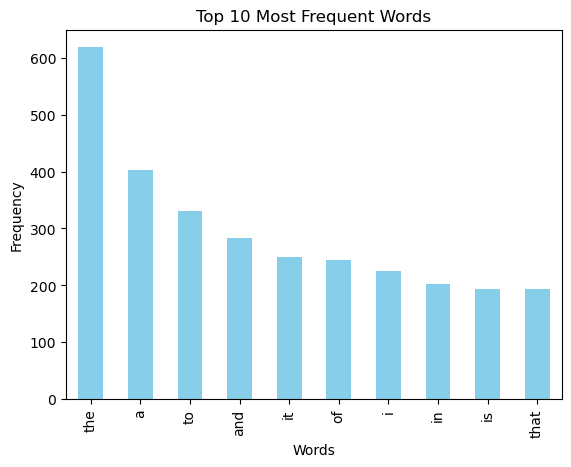

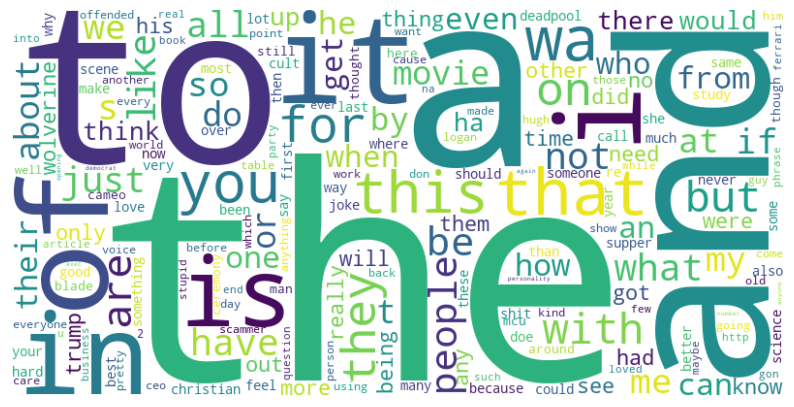

In [38]:
"""Investigative Analysis: Conduct an additional analysis of your choice on the collected data. 
This could be an exploration of word trends, a comparison of topic prevalence over time, 
or any other creative angle that provides additional insights into your corpus."""
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud



posts_df['Preprocessed'] = preprocessed_document
# Tokenize the preprocessed text
all_words = ' '.join(posts_df['Preprocessed']).split()
word_freq = Counter(all_words)

# Convert to DataFrame for easier manipulation
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

print(word_freq_df.head())

plt.figure(figsize=(10, 6))
word_freq_df.head(10).plot(kind='bar', x='Word', y='Frequency', legend=False, color='skyblue')
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()